In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point
from pyproj import Proj, Transformer

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam

## Generate subway networks

In [4]:
sub_stations, edges, nodes, sub_routes, check_name = prepare_metro(osm_path)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 9818.69it/s]


In [5]:
sub_stations

osm_id public_transport railway  tram subway highway   bus  \
129    240489038    stop_position    stop  None    yes    None  None   
134    250222259    stop_position    stop  None    yes    None  None   
136    250222332    stop_position    stop  None    yes    None  None   
137    250222348    stop_position    stop  None    yes    None  None   
138    250224115    stop_position    stop  None    yes    None  None   
...          ...              ...     ...   ...    ...     ...   ...   
3469  7106870068    stop_position    stop  None    yes    None  None   
3470  7106870071    stop_position    stop  None    yes    None  None   
3471  7106870124    stop_position    stop  None    yes    None  None   
3472  7106910981    stop_position    stop  None    yes    None  None   
3473  7106911022    stop_position    stop  None    yes    None  None   

                    name                  geometry     geo_x      geo_y  
129         Wibautstraat  POINT (4.91205 52.35459)  4.912049  52.354595  
134                 Zuid  POINT (4.87398 52.33904)  4.873978  52.339035  
136   Station Sloterdijk  POINT (4.83898 52.38904)  4.838979  52.389038  
137          Isolatorweg  POINT (4.85060 52.39510)  4.850596  52.395103  
138         De Vlugtlaan  POINT (4.83806 52.37946)  4.838056  52.379461  
...                  ...                       ...       ...        ...  
3469       Waterlooplein  POINT (4.90361 52.36664)  4.903606  52.366636  
3470       Waterlooplein  POINT (4.90375 52.36669)  4.903753  52.366690  
3471          Nieuwmarkt  POINT (4.90094 52.37142)  4.900938  52.371424  
3472        Weesperplein  POINT (4.90792 52.36133)  4.907918  52.361326  
3473        Weesperplein  POINT (4.90785 52.36131)  4.907847  52.361309  

[87 rows x 11 columns]

In [6]:
sub_stations.to_excel('.\sub_stations.xlsx',header = True,index = False)

In [7]:
edges

osm_id                                           geometry railway  \
0      23157994  LINESTRING (4.9236699 52.3361909, 4.9236979 52...  subway   
1      23158053  LINESTRING (4.9642294 52.2945339, 4.9644259 52...  subway   
2      23158054  LINESTRING (4.9622901 52.2955678, 4.9624673 52...  subway   
3      23189033  LINESTRING (4.8467318 52.3952137, 4.8471439 52...  subway   
4      23189039  LINESTRING (4.8409161 52.3937679, 4.8416087 52...  subway   
..          ...                                                ...     ...   
957  1131538381  LINESTRING (4.9200955 52.3417374, 4.9200444 52...  subway   
958  1131538382  LINESTRING (4.9201445 52.3416568, 4.9200955 52...  subway   
959  1131538383  LINESTRING (4.9200365 52.3417239, 4.9200773 52...  subway   
960  1131538384  LINESTRING (4.9197172 52.3423576, 4.9197589 52...  subway   
961  1131538385  LINESTRING (4.9194179 52.3424458, 4.919254 52....  subway   

    service   id  from_id  to_id    distance      time  weights     to_from  \
0      None    0        0      1  258.660599  0.010346      258      (0, 1)   
1      None    1        2      3  215.433271  0.008617      215      (2, 3)   
2      None    2        4      5  121.794737  0.004872      121      (4, 5)   
3      None    3        6      7   28.046592  0.001122       28      (6, 7)   
4      None    4        8    492  382.935219  0.015317      382    (8, 492)   
..      ...  ...      ...    ...         ...       ...      ...         ...   
957    None  957      803    463   73.656989  0.002946       73  (803, 463)   
958    None  958      462    803    9.568427  0.000383        9  (462, 803)   
959    None  959      804    246    9.568874  0.000383        9  (804, 246)   
960    None  960      463    804   73.789113  0.002952       73  (463, 804)   
961    None  961      249    256   40.444210  0.001618       40  (249, 256)   

        from_to  
0        (1, 0)  
1        (3, 2)  
2        (5, 4)  
3        (7, 6)  
4      (492, 8)  
..          ...  
957  (463, 803)  
958  (803, 462)  
959  (246, 804)  
960  (804, 463)  
961  (256, 249)  

[962 rows x 12 columns]

In [8]:
nodes

geometry  degree   id
0    POINT (4.9236699 52.3361909)       2    0
1    POINT (4.9232197 52.3339159)       2    1
2    POINT (4.9642294 52.2945339)       2    2
3    POINT (4.9673168 52.2943931)       2    3
4    POINT (4.9622901 52.2955678)       2    4
..                            ...     ...  ...
863  POINT (4.8906476 52.3539585)       2  863
864  POINT (4.8906487 52.3539577)       2  864
865  POINT (4.8927726 52.3704434)       2  865
866   POINT (4.9010846 52.371353)       2  866
867  POINT (4.9009379 52.3714238)       2  867

[868 rows x 3 columns]

In [9]:
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}


sub_routes, check_name = recheck_metro_routes(replacement_dict, sub_stations, sub_routes)

In [10]:
sub_routes

osm_id   route                to  \
0    18683  subway       Isolatorweg   
1  4515354  subway              Gein   
2    31249  subway       Isolatorweg   
3  4515355  subway  Centraal Station   
4  8466667  subway              Zuid   
5  8466671  subway             Noord   
6    18532  subway       Gaasperplas   
7  4515356  subway  Centraal Station   
8    18423  subway              Gein   
9  4515357  subway  Centraal Station   

                                        name ref                 network  \
0              Metro 50: Gein => Isolatorweg  50  Stadsvervoer Amsterdam   
1              Metro 50: Isolatorweg => Gein  50  Stadsvervoer Amsterdam   
2  Metro 51: Centraal Station => Isolatorweg  51  Stadsvervoer Amsterdam   
3  Metro 51: Isolatorweg => Centraal Station  51  Stadsvervoer Amsterdam   
4                    Metro 52: Noord => Zuid  52  Stadsvervoer Amsterdam   
5                    Metro 52: Zuid => Noord  52  Stadsvervoer Amsterdam   
6  Metro 53: Centraal Station => Gaasperplas  53  Stadsvervoer Amsterdam   
7  Metro 53: Gaasperplas => Centraal Station  53  Stadsvervoer Amsterdam   
8         Metro 54: Centraal Station => Gein  54  Stadsvervoer Amsterdam   
9         Metro 54: Gein => Centraal Station  54  Stadsvervoer Amsterdam   

  service                                           geometry  
0    None  MULTILINESTRING ((4.98996 52.29640, 4.98959 52...  
1    None  MULTILINESTRING ((4.83880 52.38842, 4.83897 52...  
2    None  MULTILINESTRING ((4.90193 52.37689, 4.90202 52...  
3    None  MULTILINESTRING ((4.83880 52.38842, 4.83897 52...  
4    None  MULTILINESTRING ((4.93265 52.40228, 4.93269 52...  
5    None  MULTILINESTRING ((4.87423 52.33922, 4.87552 52...  
6    None  MULTILINESTRING ((4.90193 52.37689, 4.90202 52...  
7    None  MULTILINESTRING ((4.98373 52.31201, 4.98364 52...  
8    None  MULTILINESTRING ((4.90193 52.37689, 4.90202 52...  
9    None  MULTILINESTRING ((4.98996 52.29640, 4.98959 52...

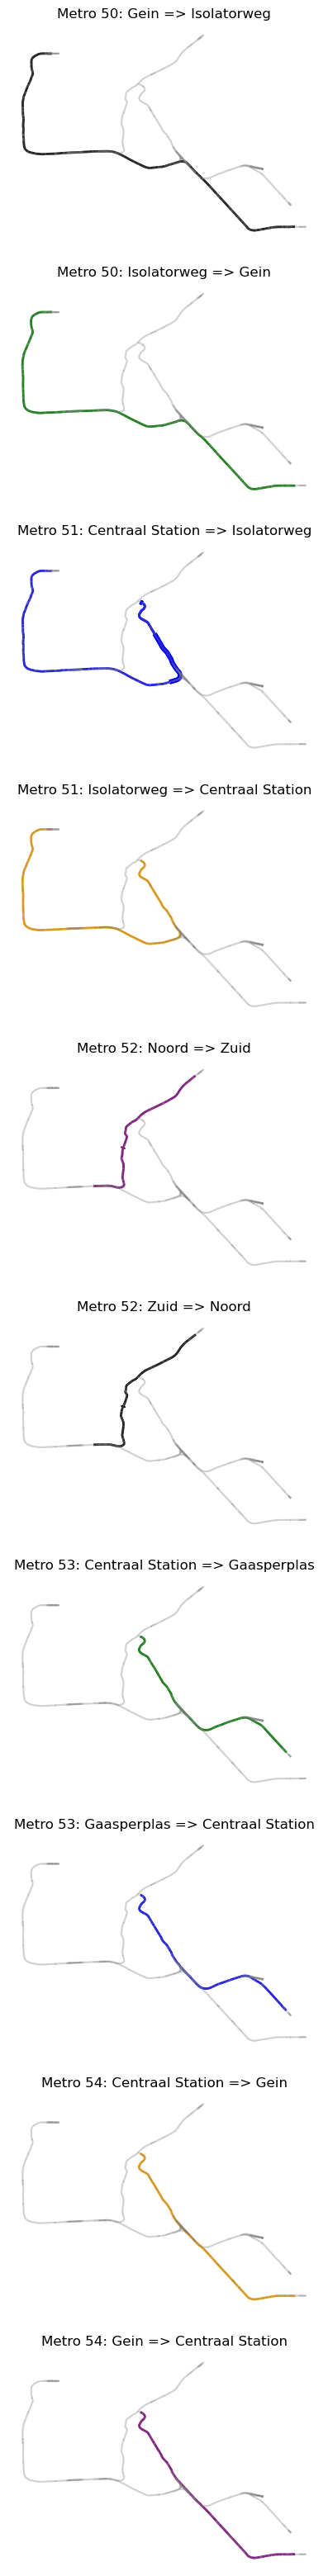

In [11]:
sub_order_route_dict, sub_shortest_path_pairs, sub_shortest_path_edges, sub_edges = metro(sub_stations, edges, nodes, sub_routes, city='Amsterdam')

In [12]:
sub_edges

osm_id                                           geometry railway  \
0      23157994  LINESTRING (4.9236699 52.3361909, 4.9236979 52...  subway   
1      23158053  LINESTRING (4.9642294 52.2945339, 4.9644259 52...  subway   
2      23158054  LINESTRING (4.9622901 52.2955678, 4.9624673 52...  subway   
3      23189033  LINESTRING (4.8467318 52.3952137, 4.8471439 52...  subway   
4      23189039  LINESTRING (4.8409161 52.3937679, 4.8416087 52...  subway   
..          ...                                                ...     ...   
957  1131538381  LINESTRING (4.9200955 52.3417374, 4.9200444 52...  subway   
958  1131538382  LINESTRING (4.9201445 52.3416568, 4.9200955 52...  subway   
959  1131538383  LINESTRING (4.9200365 52.3417239, 4.9200773 52...  subway   
960  1131538384  LINESTRING (4.9197172 52.3423576, 4.9197589 52...  subway   
961  1131538385  LINESTRING (4.9194179 52.3424458, 4.919254 52....  subway   

    service   id  from_id  to_id    distance      time  weights     to_from  \
0      None    0        0      1  258.660599  0.010346      258      (0, 1)   
1      None    1        2      3  215.433271  0.008617      215      (2, 3)   
2      None    2        4      5  121.794737  0.004872      121      (4, 5)   
3      None    3        6      7   28.046592  0.001122       28      (6, 7)   
4      None    4        8    492  382.935219  0.015317      382    (8, 492)   
..      ...  ...      ...    ...         ...       ...      ...         ...   
957    None  957      803    463   73.656989  0.002946       73  (803, 463)   
958    None  958      462    803    9.568427  0.000383        9  (462, 803)   
959    None  959      804    246    9.568874  0.000383        9  (804, 246)   
960    None  960      463    804   73.789113  0.002952       73  (463, 804)   
961    None  961      249    256   40.444210  0.001618       40  (249, 256)   

        from_to  
0        (1, 0)  
1        (3, 2)  
2        (5, 4)  
3        (7, 6)  
4      (492, 8)  
..          ...  
957  (463, 803)  
958  (803, 462)  
959  (246, 804)  
960  (804, 463)  
961  (256, 249)  

[962 rows x 12 columns]

In [13]:
sub_shortest_path_edges

{'Metro 50: Gein => Isolatorweg':         osm_id                                           geometry railway  \
 0    166187911  LINESTRING (4.9823107 52.2963387, 4.9838859 52...  subway   
 1    166187914  LINESTRING (4.9850607 52.2963027, 4.9855227 52...  subway   
 2    166187917  LINESTRING (4.9871059 52.2963808, 4.9873266 52...  subway   
 3    166187918  LINESTRING (4.9776921 52.2962066, 4.9783293 52...  subway   
 4    166187922  LINESTRING (4.9847395 52.2963009, 4.9850607 52...  subway   
 ..         ...                                                ...     ...   
 165  166370272  LINESTRING (4.8465456 52.3951777, 4.8467329 52...  subway   
 166  166370274  LINESTRING (4.8471465 52.3951789, 4.8471814 52...  subway   
 167  166370274  LINESTRING (4.8471814 52.3951787, 4.8473044 52...  subway   
 168  166370275  LINESTRING (4.8467329 52.3951774, 4.8471465 52...  subway   
 169  166370277  LINESTRING (4.8389786 52.3890375, 4.8389667 52...  subway   
 
     service   id  from_id  t

## Add columns to nodes

In [14]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [15]:
sub_order_route_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                      geometry     geo_x  \
 0    5                 Gein  POINT (4.9891612 52.2964067)  4.989161   
 1   18           Reigersbos  POINT (4.9740002 52.2956365)     4.974   
 2   17          Holendrecht  POINT (4.9601264 52.2981319)  4.960126   
 3    6            Bullewijk   POINT (4.9521292 52.306869)  4.952129   
 4    4        Bijlmer ArenA   POINT (4.9476178 52.311806)  4.947618   
 5    3          Strandvliet  POINT (4.9413977 52.3186119)  4.941398   
 6   16         Duivendrecht  POINT (4.9365601 52.3236024)   4.93656   
 7    7      Van der Madeweg  POINT (4.9304544 52.3297847)  4.930454   
 8    9           Overamstel  POINT (4.9176063 52.3317688)  4.917606   
 9   19          Station RAI    POINT (4.889539 52.337689)  4.889539   
 10  10                 Zuid  POINT (4.8739633 52.3393223)  4.873963   
 11   8      Amstelveenseweg  POINT (4.8575709 52.3384751)  4.857571   
 12  11    Henk Sneevlietweg  P

In [16]:
sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, nodes)

In [17]:
sub_new_nodes

geometry  degree   id                 name     geo_x  \
0   POINT (4.98916 52.29641)       2  328                 Gein  4.989161   
1   POINT (4.97400 52.29564)       2  855           Reigersbos  4.974000   
2   POINT (4.96013 52.29813)       2  854          Holendrecht  4.960126   
3   POINT (4.95213 52.30687)       2  810            Bullewijk  4.952129   
4   POINT (4.94762 52.31181)       2  809        Bijlmer ArenA  4.947618   
..                       ...     ...  ...                  ...       ...   
81  POINT (4.96734 52.32837)       2  824    Verrijn Stuartweg  4.967335   
82  POINT (4.95669 52.33041)       2  823  Station Diemen Zuid  4.956688   
83  POINT (4.94628 52.32683)       2  829         Venserpolder  4.946277   
84  POINT (4.93028 52.32974)       2  827      Van der Madeweg  4.930285   
85  POINT (4.92105 52.34029)       2  833           Spaklerweg  4.921045   

        geo_y         coordinate_value  \
0   52.296407  (4.9891612, 52.2964067)   
1   52.295637  (4.9740002, 52.2956365)   
2   52.298132  (4.9601264, 52.2981319)   
3   52.306869   (4.9521292, 52.306869)   
4   52.311806   (4.9476178, 52.311806)   
..        ...                      ...   
81  52.328367  (4.9673352, 52.3283668)   
82  52.330406  (4.9566878, 52.3304057)   
83  52.326833  (4.9462773, 52.3268326)   
84  52.329735  (4.9302846, 52.3297352)   
85  52.340287  (4.9210454, 52.3402871)   

                              route_name_list   route         ref    transfer  
0               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
1               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
2               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
3               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
4               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
..                                        ...     ...         ...         ...  
81  Metro 53: Gaasperplas => Centraal Station  subway          53        None  
82  Metro 53: Gaasperplas => Centraal Station  subway          53        None  
83  Metro 53: Gaasperplas => Centraal Station  subway          53        None  
84  Metro 53: Gaasperplas => Centraal Station  subway  50, 53, 54  50, 53, 54  
85  Metro 53: Gaasperplas => Centraal Station  subway  51, 53, 54  51, 53, 54  

[86 rows x 11 columns]

In [18]:
# sub_new_nodes.to_excel('.\city_sub_new_nodes11.xlsx',header = True, index = False)

### retrive all transfer stations on each route

In [19]:
sub_transfer_stations_df = all_transfer_stations_df(sub_new_nodes)

In [20]:
sub_transfer_stations_df

geometry  degree   id              name     geo_x  \
0   POINT (4.98916 52.29641)       2  328              Gein  4.989161   
1   POINT (4.97400 52.29564)       2  855        Reigersbos  4.974000   
2   POINT (4.96013 52.29813)       2  854       Holendrecht  4.960126   
3   POINT (4.95213 52.30687)       2  810         Bullewijk  4.952129   
4   POINT (4.94762 52.31181)       2  809     Bijlmer ArenA  4.947618   
..                       ...     ...  ...               ...       ...   
67  POINT (4.90094 52.37919)       2  815  Centraal Station  4.900937   
70  POINT (4.92061 52.34019)       2  830        Spaklerweg  4.920614   
71  POINT (4.93024 52.32972)       2  826   Van der Madeweg  4.930239   
84  POINT (4.93028 52.32974)       2  827   Van der Madeweg  4.930285   
85  POINT (4.92105 52.34029)       2  833        Spaklerweg  4.921045   

        geo_y         coordinate_value  \
0   52.296407  (4.9891612, 52.2964067)   
1   52.295637  (4.9740002, 52.2956365)   
2   52.298132  (4.9601264, 52.2981319)   
3   52.306869   (4.9521292, 52.306869)   
4   52.311806   (4.9476178, 52.311806)   
..        ...                      ...   
67  52.379188  (4.9009371, 52.3791884)   
70  52.340191  (4.9206141, 52.3401909)   
71  52.329717  (4.9302391, 52.3297174)   
84  52.329735  (4.9302846, 52.3297352)   
85  52.340287  (4.9210454, 52.3402871)   

                              route_name_list   route             ref  \
0               Metro 50: Gein => Isolatorweg  subway          50, 54   
1               Metro 50: Gein => Isolatorweg  subway          50, 54   
2               Metro 50: Gein => Isolatorweg  subway          50, 54   
3               Metro 50: Gein => Isolatorweg  subway          50, 54   
4               Metro 50: Gein => Isolatorweg  subway          50, 54   
..                                        ...     ...             ...   
67                    Metro 52: Zuid => Noord  subway  51, 52, 53, 54   
70  Metro 53: Centraal Station => Gaasperplas  subway      51, 53, 54   
71  Metro 53: Centraal Station => Gaasperplas  subway      50, 53, 54   
84  Metro 53: Gaasperplas => Centraal Station  subway      50, 53, 54   
85  Metro 53: Gaasperplas => Centraal Station  subway      51, 53, 54   

          transfer  
0           50, 54  
1           50, 54  
2           50, 54  
3           50, 54  
4           50, 54  
..             ...  
67  51, 52, 53, 54  
70      51, 53, 54  
71      50, 53, 54  
84      50, 53, 54  
85      51, 53, 54  

[62 rows x 11 columns]

In [21]:
len(sub_transfer_stations_df)

62

## Add columns to edges

In [22]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [23]:
sub_shortest_path_edges

{'Metro 50: Gein => Isolatorweg':         osm_id                                           geometry railway  \
 0    166187911  LINESTRING (4.9823107 52.2963387, 4.9838859 52...  subway   
 1    166187914  LINESTRING (4.9850607 52.2963027, 4.9855227 52...  subway   
 2    166187917  LINESTRING (4.9871059 52.2963808, 4.9873266 52...  subway   
 3    166187918  LINESTRING (4.9776921 52.2962066, 4.9783293 52...  subway   
 4    166187922  LINESTRING (4.9847395 52.2963009, 4.9850607 52...  subway   
 ..         ...                                                ...     ...   
 165  166370272  LINESTRING (4.8465456 52.3951777, 4.8467329 52...  subway   
 166  166370274  LINESTRING (4.8471465 52.3951789, 4.8471814 52...  subway   
 167  166370274  LINESTRING (4.8471814 52.3951787, 4.8473044 52...  subway   
 168  166370275  LINESTRING (4.8467329 52.3951774, 4.8471465 52...  subway   
 169  166370277  LINESTRING (4.8389786 52.3890375, 4.8389667 52...  subway   
 
     service   id  from_id  t

In [24]:
sub_new_edges = add_columns_to_edges(sub_shortest_path_edges,edges)

In [25]:
sub_new_edges

osm_id                                           geometry railway  \
0      23157994  LINESTRING (4.9236699 52.3361909, 4.9236979 52...  subway   
1      23158053  LINESTRING (4.9642294 52.2945339, 4.9644259 52...  subway   
2      23158054  LINESTRING (4.9622901 52.2955678, 4.9624673 52...  subway   
3      23189033  LINESTRING (4.8467318 52.3952137, 4.8471439 52...  subway   
4      23189039  LINESTRING (4.8409161 52.3937679, 4.8416087 52...  subway   
..          ...                                                ...     ...   
957  1131538381  LINESTRING (4.9200955 52.3417374, 4.9200444 52...  subway   
958  1131538382  LINESTRING (4.9201445 52.3416568, 4.9200955 52...  subway   
959  1131538383  LINESTRING (4.9200365 52.3417239, 4.9200773 52...  subway   
960  1131538384  LINESTRING (4.9197172 52.3423576, 4.9197589 52...  subway   
961  1131538385  LINESTRING (4.9194179 52.3424458, 4.919254 52....  subway   

    service   id  from_id  to_id    distance      time  weights     to_from  \
0      None    0        0      1  258.660599  0.010346      258      (0, 1)   
1      None    1        2      3  215.433271  0.008617      215      (2, 3)   
2      None    2        4      5  121.794737  0.004872      121      (4, 5)   
3      None    3        6      7   28.046592  0.001122       28      (6, 7)   
4      None    4        8    492  382.935219  0.015317      382    (8, 492)   
..      ...  ...      ...    ...         ...       ...      ...         ...   
957    None  957      803    463   73.656989  0.002946       73  (803, 463)   
958    None  958      462    803    9.568427  0.000383        9  (462, 803)   
959    None  959      804    246    9.568874  0.000383        9  (804, 246)   
960    None  960      463    804   73.789113  0.002952       73  (463, 804)   
961    None  961      249    256   40.444210  0.001618       40  (249, 256)   

        from_to  count_weight                            route_name_list  \
0        (1, 0)           1.0  Metro 51: Isolatorweg => Centraal Station   
1        (3, 2)           1.0              Metro 50: Isolatorweg => Gein   
2        (5, 4)           1.0              Metro 50: Isolatorweg => Gein   
3        (7, 6)           NaN                                        NaN   
4      (492, 8)           1.0              Metro 50: Isolatorweg => Gein   
..          ...           ...                                        ...   
957  (463, 803)           1.0  Metro 53: Gaasperplas => Centraal Station   
958  (803, 462)           1.0  Metro 53: Gaasperplas => Centraal Station   
959  (246, 804)           1.0  Metro 51: Isolatorweg => Centraal Station   
960  (804, 463)           1.0  Metro 51: Isolatorweg => Centraal Station   
961  (256, 249)           2.0  Metro 51: Centraal Station => Isolatorweg   

      route         ref  
0    subway          51  
1    subway      50, 54  
2    subway      50, 54  
3       NaN         NaN  
4    subway      50, 51  
..      ...         ...  
957  subway      53, 54  
958  subway      53, 54  
959  subway          51  
960  subway          51  
961  subway  51, 53, 54  

[962 rows x 16 columns]

# Tram-Amsterdam

## Generate tram networks

In [26]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 7838.90it/s]


Calculate_degree possibly unhappy


In [27]:
city_tram_stations

osm_id public_transport    railway tram subway   highway   bus  \
59       46326414    stop_position  tram_stop  yes   None      None  None   
62       46350382    stop_position  tram_stop  yes   None      None  None   
69       46369643    stop_position  tram_stop  yes   None      None  None   
79       46432024    stop_position  tram_stop  yes   None      None  None   
86       46462976    stop_position  tram_stop  yes   None      None  None   
...           ...              ...        ...  ...    ...       ...   ...   
3799   9982135046    stop_position  tram_stop  yes   None      None  None   
3815  10273052985    stop_position  tram_stop  yes   None      None  None   
3827  10607209062    stop_position  tram_stop  yes   None      None  None   
2152   4621136127         platform  tram_stop  yes   None  bus_stop   yes   
2240   4621705536         platform  tram_stop  yes   None  bus_stop   yes   

                     name                  geometry     geo_x      geo_y  
59          Surinameplein  POINT (4.85218 52.35805)  4.852183  52.358048  
62         Alexanderplein  POINT (4.91936 52.36350)  4.919363  52.363504  
69    Meester Visserplein  POINT (4.90536 52.36796)  4.905360  52.367961  
79             Nassaukade  POINT (4.87920 52.38131)  4.879205  52.381312  
86        Zoutkeetsgracht  POINT (4.88514 52.38808)  4.885142  52.388084  
...                   ...                       ...       ...        ...  
3799     Centraal Station  POINT (4.90098 52.37770)  4.900983  52.377705  
3815         Paleisstraat  POINT (4.89064 52.37190)  4.890644  52.371901  
3827     Vennepluimstraat  POINT (4.98995 52.35806)  4.989950  52.358058  
2152            Oostpoort  POINT (4.92725 52.35701)  4.927255  52.357015  
2240            Oostpoort  POINT (4.92688 52.35743)  4.926876  52.357430  

[473 rows x 11 columns]

In [28]:
city_tram_stations.to_excel('.\city_tram_stations.xlsx',header = True,index = False)

In [29]:
edges

osm_id                                           geometry railway  \
0        7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
1        7045616  LINESTRING (4.934085 52.3609657, 4.9340765 52....    tram   
2        7045675  LINESTRING (4.9337809 52.3611734, 4.9339017 52...    tram   
3        7045689  LINESTRING (4.9394 52.361617, 4.9385742 52.361...    tram   
4        7045994  LINESTRING (4.9157261 52.365067, 4.9157046 52....    tram   
...          ...                                                ...     ...   
2199  1185084715  LINESTRING (4.8520736 52.3479443, 4.8521852 52...    tram   
2200  1185084716  LINESTRING (4.852325 52.3480075, 4.852489 52.3...    tram   
2201  1185084717  LINESTRING (4.8516012 52.3470208, 4.8519064 52...    tram   
2202  1185084718  LINESTRING (4.8522982 52.348033, 4.8524709 52....    tram   
2203  1185084719  LINESTRING (4.851576 52.3470746, 4.8518677 52....    tram   

     service    id  from_id  to_id    distance      time  weights  \
0       None     0        0      1   28.561299  0.002040       28   
1       None     1        2      3  146.082551  0.010434      146   
2       None     2        4      5  390.987463  0.027928      390   
3       None     3        6      7  345.247175  0.024661      345   
4       None     4        8   1730   35.152166  0.002511       35   
...      ...   ...      ...    ...         ...       ...      ...   
2199    None  2199     1496    594   11.280287  0.000806       11   
2200    None  2200      562   1072   12.010525  0.000858       12   
2201    None  2201     1497    561   81.765515  0.005840       81   
2202    None  2202      566   1079   12.587379  0.000899       12   
2203    None  2203      552    565   78.206965  0.005586       78   

          to_from      from_to  
0          (0, 1)       (1, 0)  
1          (2, 3)       (3, 2)  
2          (4, 5)       (5, 4)  
3          (6, 7)       (7, 6)  
4       (8, 1730)    (1730, 8)  
...           ...          ...  
2199  (1496, 594)  (594, 1496)  
2200  (562, 1072)  (1072, 562)  
2201  (1497, 561)  (561, 1497)  
2202  (566, 1079)  (1079, 566)  
2203   (552, 565)   (565, 552)  

[2204 rows x 12 columns]

In [30]:
nodes

geometry  degree    id
0     POINT (4.9324018 52.3610615)       3     0
1      POINT (4.9321097 52.361227)       3     1
2      POINT (4.934085 52.3609657)       3     2
3      POINT (4.933017 52.3603624)       3     3
4     POINT (4.9337809 52.3611734)       3     4
...                            ...     ...   ...
1915  POINT (4.9009826 52.3777045)       0  1915
1916   POINT (4.890644 52.3719008)       2  1916
1917  POINT (4.9899502 52.3580579)       2  1917
1918   POINT (4.9272548 52.357015)       0  1918
1919  POINT (4.9268761 52.3574304)       0  1919

[1920 rows x 3 columns]

In [31]:
city_tram_routes

osm_id route                                   to  \
17       31398  tram           Amsterdam, De Boelelaan/VU   
18       31530  tram       Amsterdam, Oudenaardeplantsoen   
19       31794  tram                Amsterdam, Drentepark   
22       32579  tram    Amsterdam, Osdorp Dijkgraafsplein   
23       32615  tram                    Amsterdam, IJburg   
24       32867  tram       Amsterdam, Lambertus Zijlplein   
390    4494870  tram          Amsterdam, Centraal Station   
391    4497721  tram          Amsterdam, Centraal Station   
392    4512710  tram           Amsterdam Centraal Station   
393    4513899  tram          Amsterdam, Centraal Station   
394    4514441  tram          Amsterdam, Centraal Station   
395    4514562  tram          Amsterdam, Centraal Station   
495    6323706  tram                            Bovenkerk   
496    6323707  tram                Haarlemmermeerstation   
662    8487480  tram                Amsterdam, Sloterpark   
663    8493152  tram                Amsterdam, Azartplein   
664    8493327  tram                 Amsterdam, Flevopark   
665    8494828  tram            Amsterdam, Van Hallstraat   
666    8495110  tram                Amsterdam, Sloterdijk   
667    8495459  tram                        Diemen, Sniep   
668    8500223  tram  Amsterdam, Eerste Marnixdwarsstraat   
669    8500345  tram                Amstelveen, Stadshart   
670    8500553  tram        Amsterdam, Muiderpoortstation   
676    8507592  tram            Amsterdam, Osdorp De Aker   
677    8507736  tram          Amsterdam, Centraal Station   
678    8507786  tram                 Amsterdam, Flevopark   
679    8507941  tram          Amsterdam, Centraal Station   
680    8510079  tram             Amsterdam, Amstelstation   
1057  12010105  tram                 Amstelveen, Westwijk   
1058  12010106  tram              Amsterdam, Station Zuid   

                                                   name  ref  \
17    Tram 24: Amsterdam Centraal Station => Amsterd...   24   
18    Tram 2: Amsterdam Centraal Station => Amsterda...    2   
19    Tram 4: Amsterdam Centraal Station => Amsterda...    4   
22    Tram 17: Amsterdam Centraal Station => Amsterd...   17   
23    Tram 26: Amsterdam Centraal Station => Amsterd...   26   
24    Tram 13: Amsterdam Centraal Station => Amsterd...   13   
390   Tram 4: Amsterdam Station RAI => Amsterdam Cen...    4   
391   Tram 2: Amsterdam Nieuw Sloten => Amsterdam Ce...    2   
392   Tram 13: Amsterdam Geuzenveld => Amsterdam Cen...   13   
393   Tram 24: Amsterdam VUmc => Amsterdam Centraal ...   24   
394   Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...   17   
395   Tram 26: Amsterdam IJburg => Amsterdam Centraa...   26   
495                Electrische Museumtramlijn Amsterdam  EMA   
496                Electrische Museumtramlijn Amsterdam  EMA   
662   Tram 7: Amsterdam Azartplein => Amsterdam Slot...    7   
663   Tram 7: Amsterdam Slotermeer => Amsterdam Azar...    7   
664   Tram 3: Amsterdam Westergasfabriek => Amsterda...    3   
665   Tram 3: Amsterdam Flevopark => Amsterdam Weste...    3   
666       Tram 19: Diemen Sniep => Amsterdam Sloterdijk   19   
667       Tram 19: Amsterdam Sloterdijk => Diemen Sniep   19   
668   Tram 5: Amstelveen Stadshart => Amsterdam Eers...    5   
669   Tram 5: Amsterdam Eerste Marnixdwarsstraat => ...    5   
670   Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...    1   
676   Tram 1: Amsterdam Muiderpoortstation =>Amsterd...    1   
677   Tram 14: Amsterdam Flevopark => Amsterdam Cent...   14   
678   Tram 14: Amsterdam Centraal Station => Amsterd...   14   
679   Tram 12: Amsterdam Amstelstation => Amsterdam ...   12   
680   Tram 12: Amsterdam Centraal Station => Amsterd...   12   
1057  Tram 25: Amsterdam Station Zuid => Amstelveen ...   25   
1058  Tram 25: Amstelveen Westwijk => Amsterdam Stat...   25   

                     network service  \
17    Stadsvervoer Amsterdam    None   
18    Stadsvervoer Amsterdam    None   
19    Stads

In [32]:
len(city_tram_routes)

30

In [33]:
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

In [34]:
city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

In [35]:
replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [36]:
replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

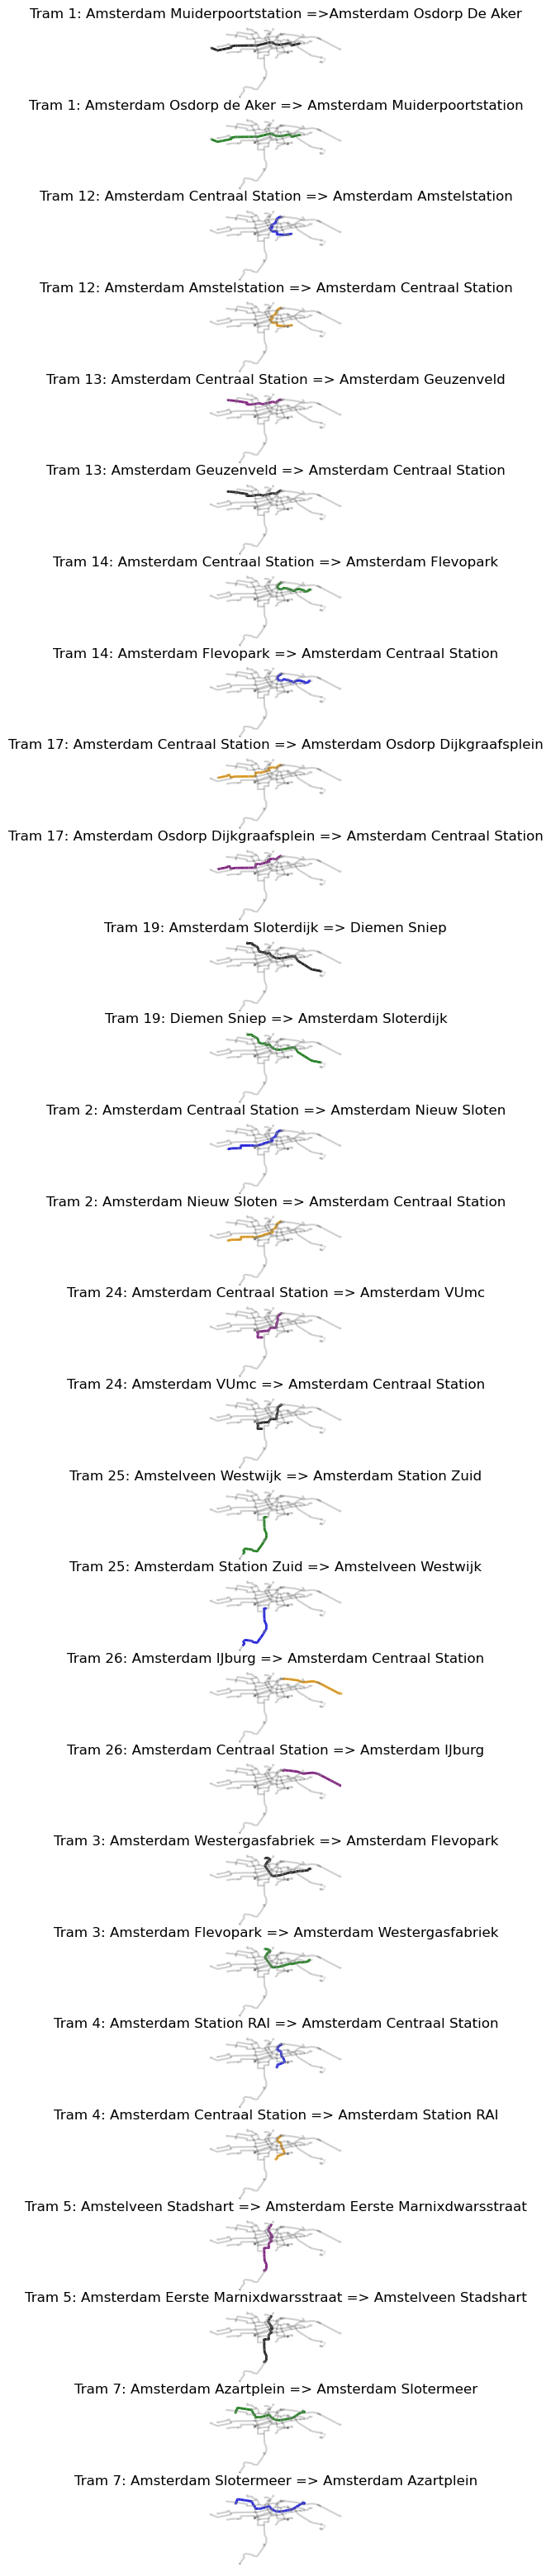

In [37]:
city_tram_order_route_dict, city_tram_shortest_path_pairs, city_tram_shortest_path_edges, tram_edges = tram(city_tram_stations, edges, nodes, city_tram_routes, city='Amsterdam')

In [38]:
tram_edges

osm_id                                           geometry railway  \
0        7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
1        7045616  LINESTRING (4.934085 52.3609657, 4.9340765 52....    tram   
2        7045675  LINESTRING (4.9337809 52.3611734, 4.9339017 52...    tram   
3        7045689  LINESTRING (4.9394 52.361617, 4.9385742 52.361...    tram   
4        7045994  LINESTRING (4.9157261 52.365067, 4.9157046 52....    tram   
...          ...                                                ...     ...   
2199  1185084715  LINESTRING (4.8520736 52.3479443, 4.8521852 52...    tram   
2200  1185084716  LINESTRING (4.852325 52.3480075, 4.852489 52.3...    tram   
2201  1185084717  LINESTRING (4.8516012 52.3470208, 4.8519064 52...    tram   
2202  1185084718  LINESTRING (4.8522982 52.348033, 4.8524709 52....    tram   
2203  1185084719  LINESTRING (4.851576 52.3470746, 4.8518677 52....    tram   

     service    id  from_id  to_id    distance      time  weights  \
0       None     0        0      1   28.561299  0.002040       28   
1       None     1        2      3  146.082551  0.010434      146   
2       None     2        4      5  390.987463  0.027928      390   
3       None     3        6      7  345.247175  0.024661      345   
4       None     4        8   1730   35.152166  0.002511       35   
...      ...   ...      ...    ...         ...       ...      ...   
2199    None  2199     1496    594   11.280287  0.000806       11   
2200    None  2200      562   1072   12.010525  0.000858       12   
2201    None  2201     1497    561   81.765515  0.005840       81   
2202    None  2202      566   1079   12.587379  0.000899       12   
2203    None  2203      552    565   78.206965  0.005586       78   

          to_from      from_to  
0          (0, 1)       (1, 0)  
1          (2, 3)       (3, 2)  
2          (4, 5)       (5, 4)  
3          (6, 7)       (7, 6)  
4       (8, 1730)    (1730, 8)  
...           ...          ...  
2199  (1496, 594)  (594, 1496)  
2200  (562, 1072)  (1072, 562)  
2201  (1497, 561)  (561, 1497)  
2202  (566, 1079)  (1079, 566)  
2203   (552, 565)   (565, 552)  

[2204 rows x 12 columns]

## Add columns to nodes

In [39]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [40]:
city_tram_order_route_dict

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':     id                              name                      geometry  \
 0   21                Muiderpoortstation  POINT (4.9326128 52.3607965)   
 1    0                      Dapperstraat  POINT (4.9289422 52.3609314)   
 2    6                    Linnaeusstraat  POINT (4.9257029 52.3601162)   
 3    7                         Beukenweg  POINT (4.9167422 52.3590732)   
 4    4         Korte 's-Gravesandestraat  POINT (4.9135923 52.3623479)   
 5    3                      Weesperplein  POINT (4.9071213 52.3610021)   
 6   22                    Frederiksplein  POINT (4.8978483 52.3594109)   
 7    5                      Vijzelgracht  POINT (4.8921024 52.3595051)   
 8    1                       Rijksmuseum   POINT (4.887104 52.3609734)   
 9   23                       Leidseplein  POINT (4.8810698 52.3632085)   
 10  13  Eerste Constantijn Huygensstraat  POINT (4.8747145 52.3626163)   
 11  24            Jan Pieter Hei

In [41]:
city_tram_new_nodes = add_columns_to_nodes(city_tram_order_route_dict, nodes)

In [42]:
city_tram_new_nodes

geometry  degree    id                       name  \
0    POINT (4.93261 52.36080)       2  1341         Muiderpoortstation   
1    POINT (4.92894 52.36093)       2  1503               Dapperstraat   
2    POINT (4.92570 52.36012)       2  1606             Linnaeusstraat   
3    POINT (4.91674 52.35907)       2  1612                  Beukenweg   
4    POINT (4.91359 52.36235)       2  1598  Korte 's-Gravesandestraat   
..                        ...     ...   ...                        ...   
413  POINT (4.92630 52.36814)       2  1559      Eerste Coehoornstraat   
414  POINT (4.92960 52.37020)       2  1808    Eerste Leeghwaterstraat   
415  POINT (4.93483 52.37301)       2  1515               Rietlandpark   
416  POINT (4.93817 52.37346)       2  1751        C. van Eesterenlaan   
417  POINT (4.93735 52.37682)       2   414                 Azartplein   

        geo_x      geo_y         coordinate_value  \
0    4.932613  52.360796  (4.9326128, 52.3607965)   
1    4.928942  52.360931  (4.9289422, 52.3609314)   
2    4.925703  52.360116  (4.9257029, 52.3601162)   
3    4.916742  52.359073  (4.9167422, 52.3590732)   
4    4.913592  52.362348  (4.9135923, 52.3623479)   
..        ...        ...                      ...   
413  4.926300  52.368143  (4.9263002, 52.3681426)   
414  4.929600  52.370198  (4.9295997, 52.3701978)   
415  4.934833  52.373011  (4.9348327, 52.3730107)   
416  4.938170  52.373460  (4.9381702, 52.3734596)   
417  4.937347  52.376818  (4.9373469, 52.3768181)   

                                       route_name_list route       ref  \
0    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
1    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
2    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
3    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
4    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram  1, 19, 7   
..                                                 ...   ...       ...   
413  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
414  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
415  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram     26, 7   
416  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
417  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   

     transfer  
0        1, 3  
1        1, 3  
2        1, 3  
3        1, 3  
4    1, 19, 7  
..        ...  
413      None  
414      None  
415     26, 7  
416      None  
417      None  

[418 rows x 11 columns]

In [43]:
# city_tram_new_nodes.to_excel('./city_tram_new_nodes11.xlsx',header = True, index = False)

### retrive all transfer stations on each route

In [44]:
city_tram_transfer_stations_df = all_transfer_stations_df(city_tram_new_nodes)

In [45]:
city_tram_transfer_stations_df

geometry  degree    id                       name  \
0    POINT (4.93261 52.36080)       2  1341         Muiderpoortstation   
1    POINT (4.92894 52.36093)       2  1503               Dapperstraat   
2    POINT (4.92570 52.36012)       2  1606             Linnaeusstraat   
3    POINT (4.91674 52.35907)       2  1612                  Beukenweg   
4    POINT (4.91359 52.36235)       2  1598  Korte 's-Gravesandestraat   
..                        ...     ...   ...                        ...   
393  POINT (4.84859 52.37333)       2  1642        Jan van Galenstraat   
408  POINT (4.84872 52.37298)       2  1802        Jan van Galenstraat   
409  POINT (4.85007 52.37041)       2  1888              Mercatorplein   
411  POINT (4.91857 52.36337)       2  1803             Alexanderplein   
415  POINT (4.93483 52.37301)       2  1515               Rietlandpark   

        geo_x      geo_y         coordinate_value  \
0    4.932613  52.360796  (4.9326128, 52.3607965)   
1    4.928942  52.360931  (4.9289422, 52.3609314)   
2    4.925703  52.360116  (4.9257029, 52.3601162)   
3    4.916742  52.359073  (4.9167422, 52.3590732)   
4    4.913592  52.362348  (4.9135923, 52.3623479)   
..        ...        ...                      ...   
393  4.848589  52.373332  (4.8485891, 52.3733319)   
408  4.848724  52.372983  (4.8487242, 52.3729826)   
409  4.850068  52.370406  (4.8500681, 52.3704058)   
411  4.918568  52.363371  (4.9185684, 52.3633708)   
415  4.934833  52.373011  (4.9348327, 52.3730107)   

                                       route_name_list route        ref  \
0    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram       1, 3   
1    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram       1, 3   
2    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram       1, 3   
3    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram       1, 3   
4    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram   1, 19, 7   
..                                                 ...   ...        ...   
393  Tram 7: Amsterdam Azartplein => Amsterdam Slot...  tram  13, 19, 7   
408  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram  13, 19, 7   
409  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram      13, 7   
411  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram  14, 19, 7   
415  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram      26, 7   

      transfer  
0         1, 3  
1         1, 3  
2         1, 3  
3         1, 3  
4     1, 19, 7  
..         ...  
393  13, 19, 7  
408  13, 19, 7  
409      13, 7  
411  14, 19, 7  
415      26, 7  

[183 rows x 11 columns]

In [46]:
len(city_tram_transfer_stations_df)

183

## Add columns to edges

In [47]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges, city_tram_routes)

In [48]:
city_tram_shortest_path_edges

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':        osm_id                                           geometry railway  \
 0     7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
 1   770429442  LINESTRING (4.9326128 52.3607965, 4.9325204 52...    tram   
 2   770429442  LINESTRING (4.9325122 52.3609243, 4.9324018 52...    tram   
 3   770438581  LINESTRING (4.9321097 52.361227, 4.9305569 52....    tram   
 4   770438581  LINESTRING (4.9289422 52.3609314, 4.9288413 52...    tram   
 ..        ...                                                ...     ...   
 91   26594761  LINESTRING (4.785218 52.3495798, 4.7849725 52....    tram   
 92  322841907  LINESTRING (4.7881565 52.3496994, 4.7880725 52...    tram   
 93  322841927  LINESTRING (4.7849725 52.3496771, 4.7836582 52...    tram   
 94  322841927  LINESTRING (4.7836582 52.3501979, 4.7833776 52...    tram   
 95  322841927  LINESTRING (4.7770976 52.352828, 4.7768625 52....    tram   
 
    ser

In [49]:
city_tram_new_edges = add_columns_to_edges(city_tram_shortest_path_edges,edges)

In [50]:
city_tram_new_edges

osm_id                                           geometry railway  \
0        7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
1        7045616  LINESTRING (4.934085 52.3609657, 4.9340765 52....    tram   
2        7045675  LINESTRING (4.9337809 52.3611734, 4.9339017 52...    tram   
3        7045689  LINESTRING (4.9394 52.361617, 4.9385742 52.361...    tram   
4        7045994  LINESTRING (4.9157261 52.365067, 4.9157046 52....    tram   
...          ...                                                ...     ...   
2199  1185084715  LINESTRING (4.8520736 52.3479443, 4.8521852 52...    tram   
2200  1185084716  LINESTRING (4.852325 52.3480075, 4.852489 52.3...    tram   
2201  1185084717  LINESTRING (4.8516012 52.3470208, 4.8519064 52...    tram   
2202  1185084718  LINESTRING (4.8522982 52.348033, 4.8524709 52....    tram   
2203  1185084719  LINESTRING (4.851576 52.3470746, 4.8518677 52....    tram   

     service    id  from_id  to_id    distance      time  weights  \
0       None     0        0      1   28.561299  0.002040       28   
1       None     1        2      3  146.082551  0.010434      146   
2       None     2        4      5  390.987463  0.027928      390   
3       None     3        6      7  345.247175  0.024661      345   
4       None     4        8   1730   35.152166  0.002511       35   
...      ...   ...      ...    ...         ...       ...      ...   
2199    None  2199     1496    594   11.280287  0.000806       11   
2200    None  2200      562   1072   12.010525  0.000858       12   
2201    None  2201     1497    561   81.765515  0.005840       81   
2202    None  2202      566   1079   12.587379  0.000899       12   
2203    None  2203      552    565   78.206965  0.005586       78   

          to_from      from_to  count_weight  \
0          (0, 1)       (1, 0)           1.0   
1          (2, 3)       (3, 2)           NaN   
2          (4, 5)       (5, 4)           1.0   
3          (6, 7)       (7, 6)           1.0   
4       (8, 1730)    (1730, 8)           1.0   
...           ...          ...           ...   
2199  (1496, 594)  (594, 1496)           NaN   
2200  (562, 1072)  (1072, 562)           NaN   
2201  (1497, 561)  (561, 1497)           NaN   
2202  (566, 1079)  (1079, 566)           NaN   
2203   (552, 565)   (565, 552)           NaN   

                                        route_name_list route  ref  
0     Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram    1  
1                                                   NaN   NaN  NaN  
2     Tram 3: Amsterdam Westergasfabriek => Amsterda...  tram    3  
3     Tram 3: Amsterdam Flevopark => Amsterdam Weste...  tram    3  
4     Tram 14: Amsterdam Flevopark => Amsterdam Cent...  tram   14  
...                                                 ...   ...  ...  
2199                                                NaN   NaN  NaN  
2200                                                NaN   NaN  NaN  
2201                                                NaN   NaN  NaN  
2202                                                NaN   NaN  NaN  
2203                                                NaN   NaN  NaN  

[2204 rows x 16 columns]

# Bus-Amsterdam

## Generate bus networks

In [51]:
city_bus_stations, edges, nodes, city_bus_routes = prepare_bus(osm_path)

topology: 100%|████████████████████████████████████████████████████████████████| 71634/71634 [00:14<00:00, 4929.71it/s]


In [52]:
city_bus_stations

osm_id public_transport railway  tram subway   highway  bus  \
9        45989456         platform    None  None   None  bus_stop  yes   
186     290955154         platform    None  None   None  bus_stop  yes   
238     311831619         platform    None  None   None  bus_stop  yes   
239     311831882         platform    None  None   None  bus_stop  yes   
243     318147070         platform    None  None   None  bus_stop  yes   
...           ...              ...     ...   ...    ...       ...  ...   
3846  10951641134    stop_position    None  None   None      None  yes   
3847  10951641135    stop_position    None  None   None      None  yes   
3850  10951641138    stop_position    None  None   None      None  yes   
3851  10951641142    stop_position    None  None   None      None  yes   
3853  10951641144    stop_position    None  None   None      None  yes   

                            name                  geometry     geo_x  \
9                     Nesserlaan  POINT (4.83890 52.27701)  4.838900   
186                 Badhoevelaan  POINT (4.79002 52.34049)  4.790015   
238                Oostzanerdijk  POINT (4.88103 52.42043)  4.881026   
239                Oostzanerdijk  POINT (4.88145 52.42022)  4.881446   
243                Kometensingel  POINT (4.88289 52.41662)  4.882885   
...                          ...                       ...       ...   
3846              Amsterdam, Dam  POINT (4.89149 52.37455)  4.891493   
3847      Amsterdam, Museumplein  POINT (4.88082 52.35868)  4.880820   
3850     Amsterdam, Parnassusweg  POINT (4.86883 52.33925)  4.868826   
3851  Arent Janszoon Ernststraat  POINT (4.86903 52.33164)  4.869026   
3853                  Kronenburg  POINT (4.87053 52.31653)  4.870530   

          geo_y  
9     52.277010  
186   52.340489  
238   52.420431  
239   52.420219  
243   52.416617  
...         ...  
3846  52.374554  
3847  52.358677  
3850  52.339245  
3851  52.331642  
3853  52.316525  

[3088 rows x 11 columns]

In [53]:
city_bus_stations.to_excel('.\city_bus_stations.xlsx',header = True, index = False)

In [54]:
edges

osm_id                                           geometry  service  \
0         4436684  LINESTRING (4.9683596 52.3558775, 4.9683345 52...    steps   
1         4495957  LINESTRING (4.8601784 52.357593, 4.8601399 52....    steps   
2         4496429  LINESTRING (4.8743983 52.358788, 4.8744747 52....  service   
3         4727308  LINESTRING (4.9563878 52.377293, 4.9564629 52....     path   
4         4727308  LINESTRING (4.9564856 52.376881, 4.9564944 52....     path   
...           ...                                                ...      ...   
71623  1185077512  LINESTRING (4.795149 52.3318873, 4.7953163 52....  service   
71624  1185077519  LINESTRING (4.7974835 52.3325307, 4.7972201 52...  service   
71625  1185077520  LINESTRING (4.7967795 52.3323057, 4.7972519 52...  service   
71626  1185077524  LINESTRING (4.7997017 52.3324389, 4.7997688 52...     path   
71627  1185077528  LINESTRING (4.7988313 52.3335157, 4.7987286 52...  service   

          id  from_id  to_id   distance      time  weights         to_from  \
0          0        0      1   4.049164  0.000324        4          (0, 1)   
1          1        2      3   7.754968  0.000620        7          (2, 3)   
2          2        4      5  68.807947  0.005505       68          (4, 5)   
3          3        6  65237  46.383298  0.003711       46      (6, 65237)   
4          4    65237      7   2.090290  0.000167        2      (65237, 7)   
...      ...      ...    ...        ...       ...      ...             ...   
71623  71623    65586  65587  29.884042  0.002391       29  (65586, 65587)   
71624  71624    65588  65589  19.267219  0.001541       19  (65588, 65589)   
71625  71625    65590  65591  34.723141  0.002778       34  (65590, 65591)   
71626  71626    65592  65593  65.462451  0.005237       65  (65592, 65593)   
71627  71627    65594  65595  41.888083  0.003351       41  (65594, 65595)   

              from_to railway  
0              (1, 0)     bus  
1              (3, 2)     bus  
2              (5, 4)     bus  
3          (65237, 6)     bus  
4          (7, 65237)     bus  
...               ...     ...  
71623  (65587, 65586)     bus  
71624  (65589, 65588)     bus  
71625  (65591, 65590)     bus  
71626  (65593, 65592)     bus  
71627  (65595, 65594)     bus  

[71628 rows x 12 columns]

In [55]:
nodes

geometry  degree     id
0      POINT (4.9683596 52.3558775)       1      0
1      POINT (4.9683118 52.3558559)       1      1
2       POINT (4.8601784 52.357593)       1      2
3      POINT (4.8601399 52.3576586)       1      3
4       POINT (4.8743983 52.358788)       1      4
...                             ...     ...    ...
68437  POINT (4.8808204 52.3586774)       0  68437
68438  POINT (4.8688259 52.3392455)       2  68438
68439  POINT (4.8690257 52.3316423)       2  68439
68440  POINT (4.8705297 52.3165252)       2  68440
68441  POINT (4.8909317 52.4173556)       2  68441

[68442 rows x 3 columns]

In [56]:
city_bus_routes

osm_id route                                to  \
31       73789   bus      Amsterdam Muiderpoortstation   
37      146350   bus           Schiphol, Airport/Plaza   
44      156123   bus                   Marken Minneweg   
52      161790   bus  Nieuw Vennep, P+R Getsewoud Zuid   
91      169215   bus                  Haarlem, Station   
...        ...   ...                               ...   
1446  13630218   bus          Amsterdam, Station Noord   
1447  13631642   bus         Assendelft, Festina Lente   
1448  13633193   bus                  Zaandam, Station   
1470  14979096   bus  Amsterdam, Station Bijlmer ArenA   
1471  14979097   bus      Almere Haven, Station Buiten   

                                                   name  ref  \
31    Bus 40: Amsterdam Amstelstation => Amsterdam M...   40   
37    Bus 365: Leiden Centraal Station => Schiphol A...  365   
44    Bus 315: Amsterdam Station Noord => Marken Min...  315   
52    Bus 397: Amsterdam Busstation Elandsgracht → N...  397   
91    Bus 300: Amsterdam Bijlmer ArenA → Haarlem Sta...  300   
...                                                 ...  ...   
1446  Bus 292: Zaandam De Vlinder => Amsterdam Stati...  292   
1447  Bus 63: Zaandam Station => Assendelft Festina ...   63   
1448  Bus 63: Assendelft Festina Lente => Zaandam St...   63   
1470  Bus 330: Almere Station Buiten => Amsterdam St...  330   
1471  Bus 330: Amsterdam Station Bijlmer ArenA => Al...  330   

                     network service  \
31    Stadsvervoer Amsterdam    None   
37        Zuid-Holland Noord    None   
44                 Waterland    None   
52     Amstelland-Meerlanden    None   
91     Amstelland-Meerlanden    None   
...                      ...     ...   
1446              Zaanstreek    None   
1447              Zaanstreek    None   
1448              Zaanstreek    None   
1470       Busvervoer Almere    None   
1471       Busvervoer Almere    None   

                                               geometry  
31    MULTILINESTRING ((4.91869 52.34617, 4.91868 52...  
37    MULTILINESTRING ((4.76218 52.30830, 4.76200 52...  
44    MULTILINESTRING ((4.93321 52.40187, 4.93311 52...  
52    MULTILINESTRING ((4.87678 52.36968, 4.87687 52...  
91    MULTILINESTRING ((4.94705 52.31143, 4.94711 52...  
...                                                 ...  
1446  MULTILINESTRING ((4.85659 52.42963, 4.85664 52...  
1447  MULTILINESTRING ((4.81643 52.43588, 4.81651 52...  
1448  MULTILINESTRING ((4.81436 52.43590, 4.81452 52...  
1470  MULTILINESTRING ((5.05775 52.32570, 5.05723 52...  
1471  MULTILINESTRING ((4.94759 52.31119, 4.94762 52...  

[319 rows x 8 columns]

In [57]:
len(city_bus_routes)

319

In [58]:
city_bus_routes = city_bus_routes.loc[city_bus_routes.network == 'Stadsvervoer Amsterdam']
city_bus_routes = city_bus_routes.loc[city_bus_routes.service != 'night']

In [59]:
city_bus_routes, check_name = check_bus_routes(city_bus_stations, city_bus_routes)

In [60]:
replacement_dict = {
    'Amsterdam, ': '',
    'Amsterdam': '',
    'Weesp Station': 'Station',
    'Osdorp De Aker': 'Matterhorn',
    'Schiphol, Airport/Plaza': 'Schiphol, Airport',
    'De Boelelaan': 'De Boelelaan/De Klencke'
}
replacement_dict1 = {
    'Amsterdam, ': '',
    'Amsterdam': '',
}

city_bus_stations['name'] = city_bus_stations['name'].replace(replacement_dict1, regex=True).str.strip()

city_bus_stations, city_bus_routes, check_name = recheck_bus_routes(replacement_dict, city_bus_stations, city_bus_routes)

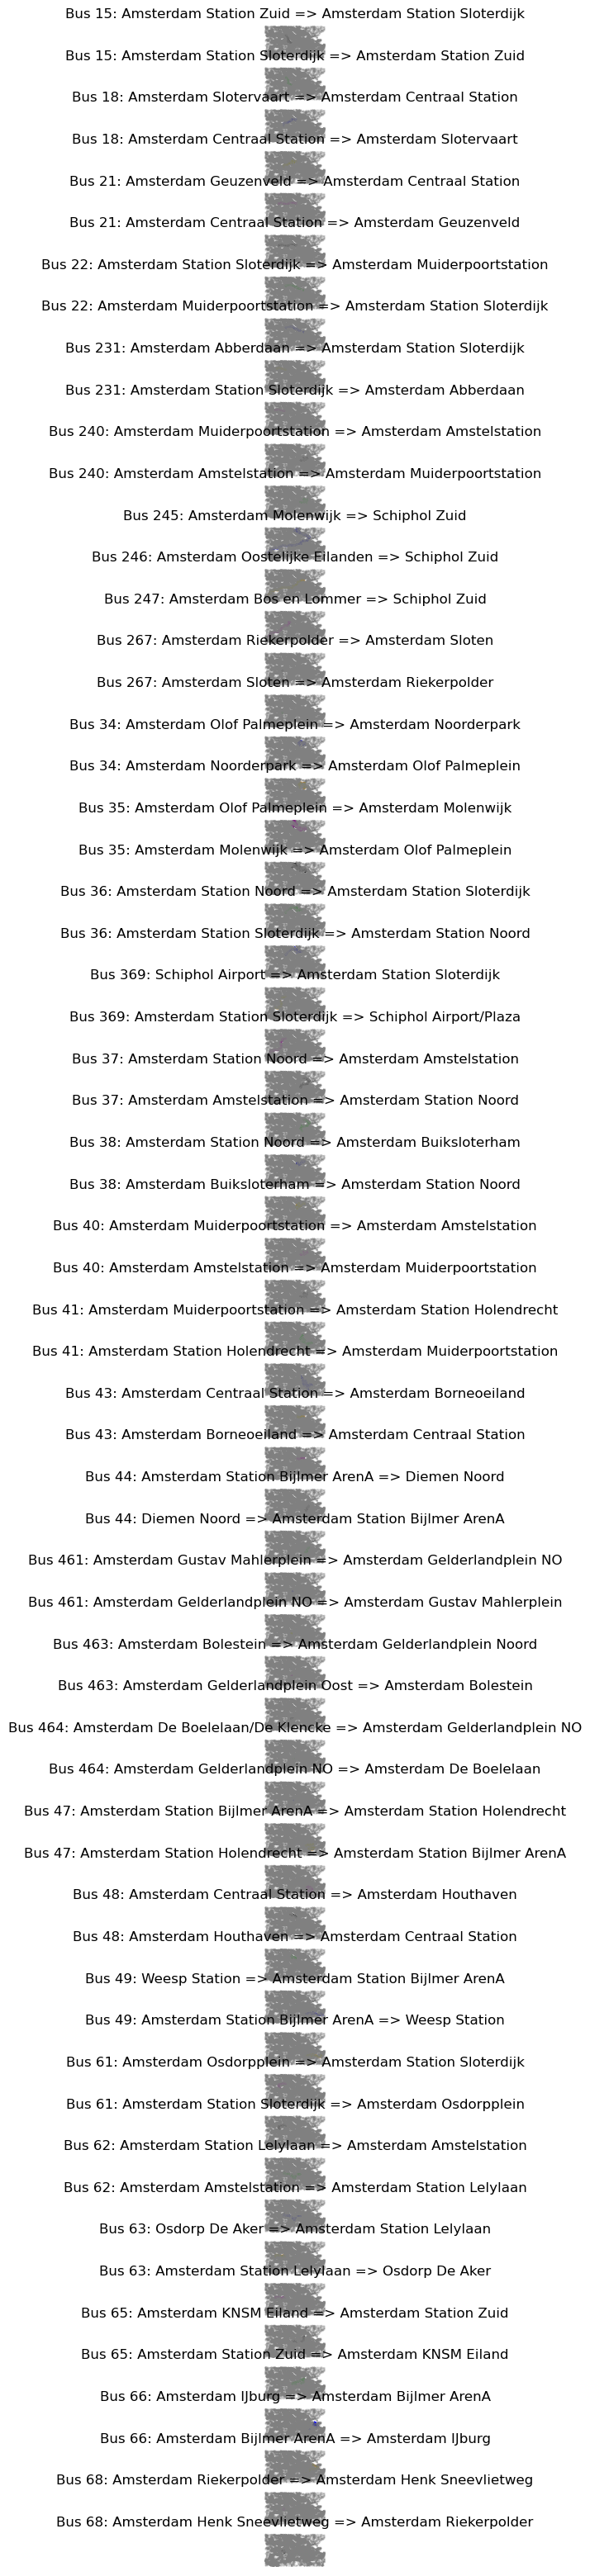

In [61]:
city_bus_order_route_dict, city_bus_shortest_path_pairs, city_bus_shortest_path_edges, bus_edges = bus(city_bus_stations, edges, nodes, city_bus_routes, city='Amsterdam')

In [62]:
city_bus_order_route_dict

{'Bus 15: Amsterdam Station Zuid => Amsterdam Station Sloterdijk':     id                   name                      geometry     geo_x  \
 0    6           Station Zuid  POINT (4.8720355 52.3408188)  4.872035   
 1    3    Prinses Irenestraat  POINT (4.8682898 52.3428941)   4.86829   
 2   10           Olympiaplein   POINT (4.865862 52.3462864)  4.865862   
 3    8             Olympiaweg  POINT (4.8583469 52.3452468)  4.858347   
 4   28  Haarlemmermeerstation  POINT (4.8576315 52.3492179)  4.857632   
 5   22             Zeilstraat  POINT (4.8566667 52.3512098)  4.856667   
 6   21        Amstelveenseweg  POINT (4.8560722 52.3513667)  4.856072   
 7    1         Hoofddorpplein  POINT (4.8503895 52.3520264)   4.85039   
 8   20   Haarlemmermeerstraat  POINT (4.8503138 52.3554125)  4.850314   
 9   23          Surinameplein  POINT (4.8521842 52.3580689)  4.852184   
 10  26        Corantijnstraat  POINT (4.8532685 52.3617315)  4.853269   
 11  24             Postjesweg    POINT (4.853

<Axes: >

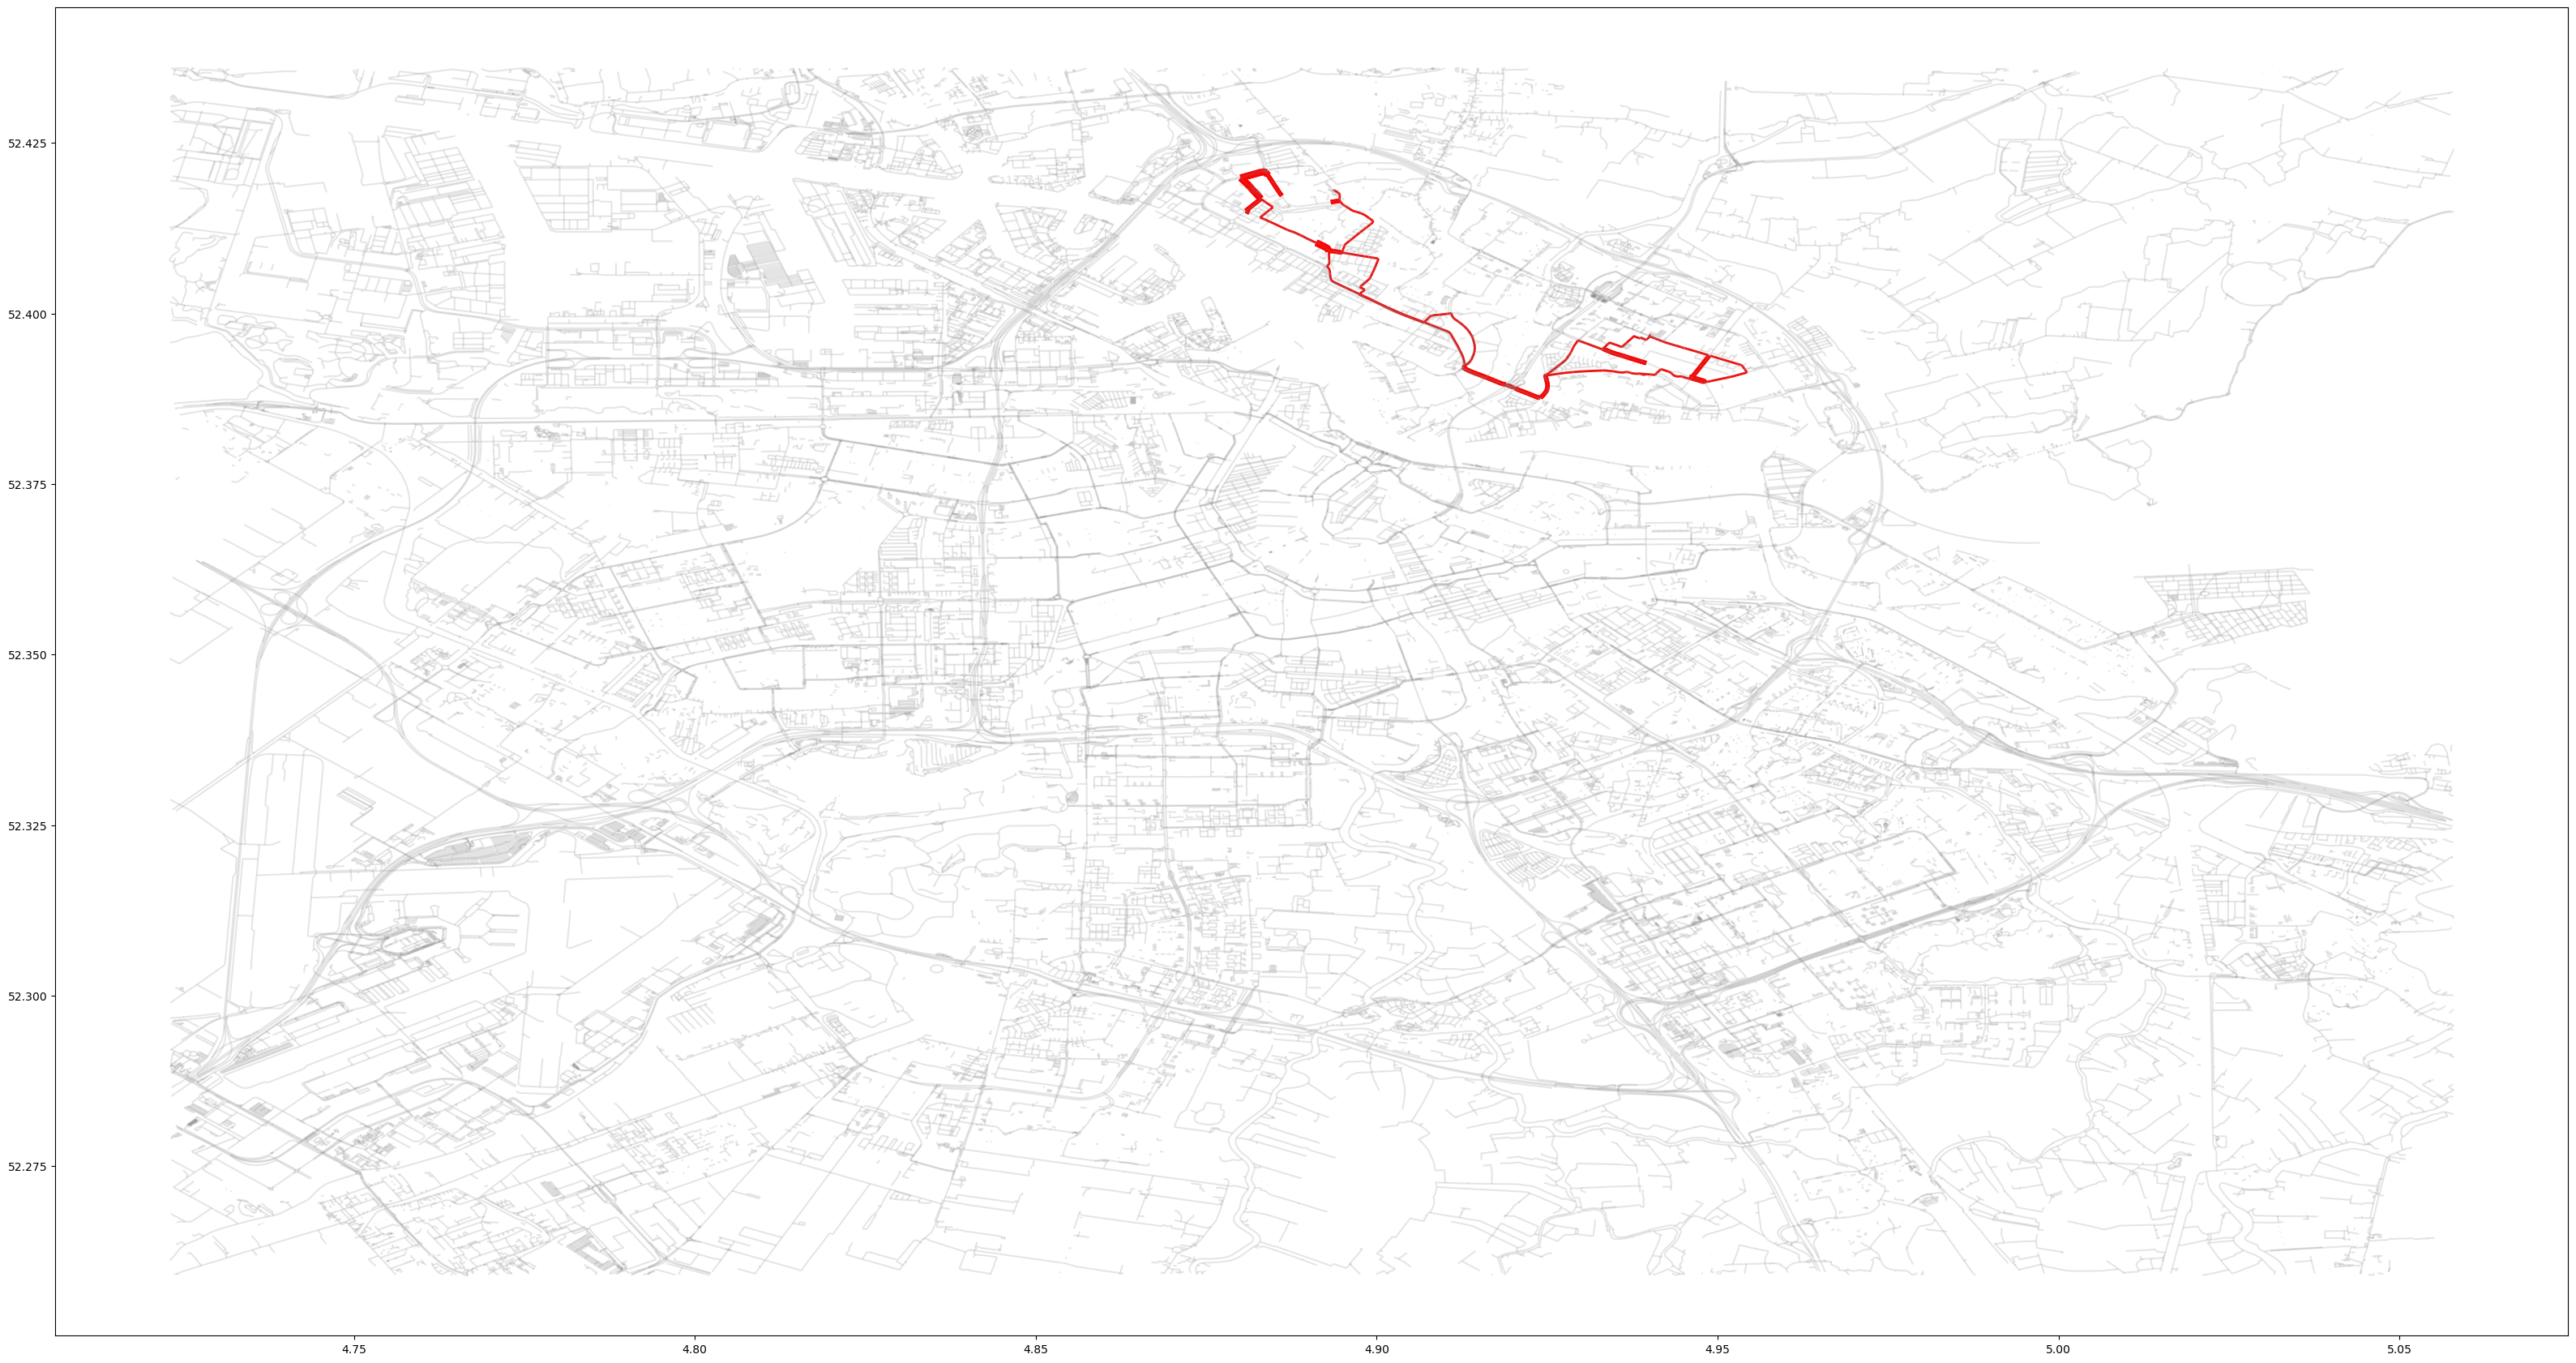

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(40, 40))
gpd.GeoDataFrame(bus_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)
gpd.GeoDataFrame(city_bus_shortest_path_edges['Bus 35: Amsterdam Olof Palmeplein => Amsterdam Molenwijk'].copy()).plot(ax=ax, zorder=1,
                                                                     linewidth=(city_bus_shortest_path_edges['Bus 35: Amsterdam Olof Palmeplein => Amsterdam Molenwijk'].count_weight) * 2,
                                                                     color='red')

<Axes: >

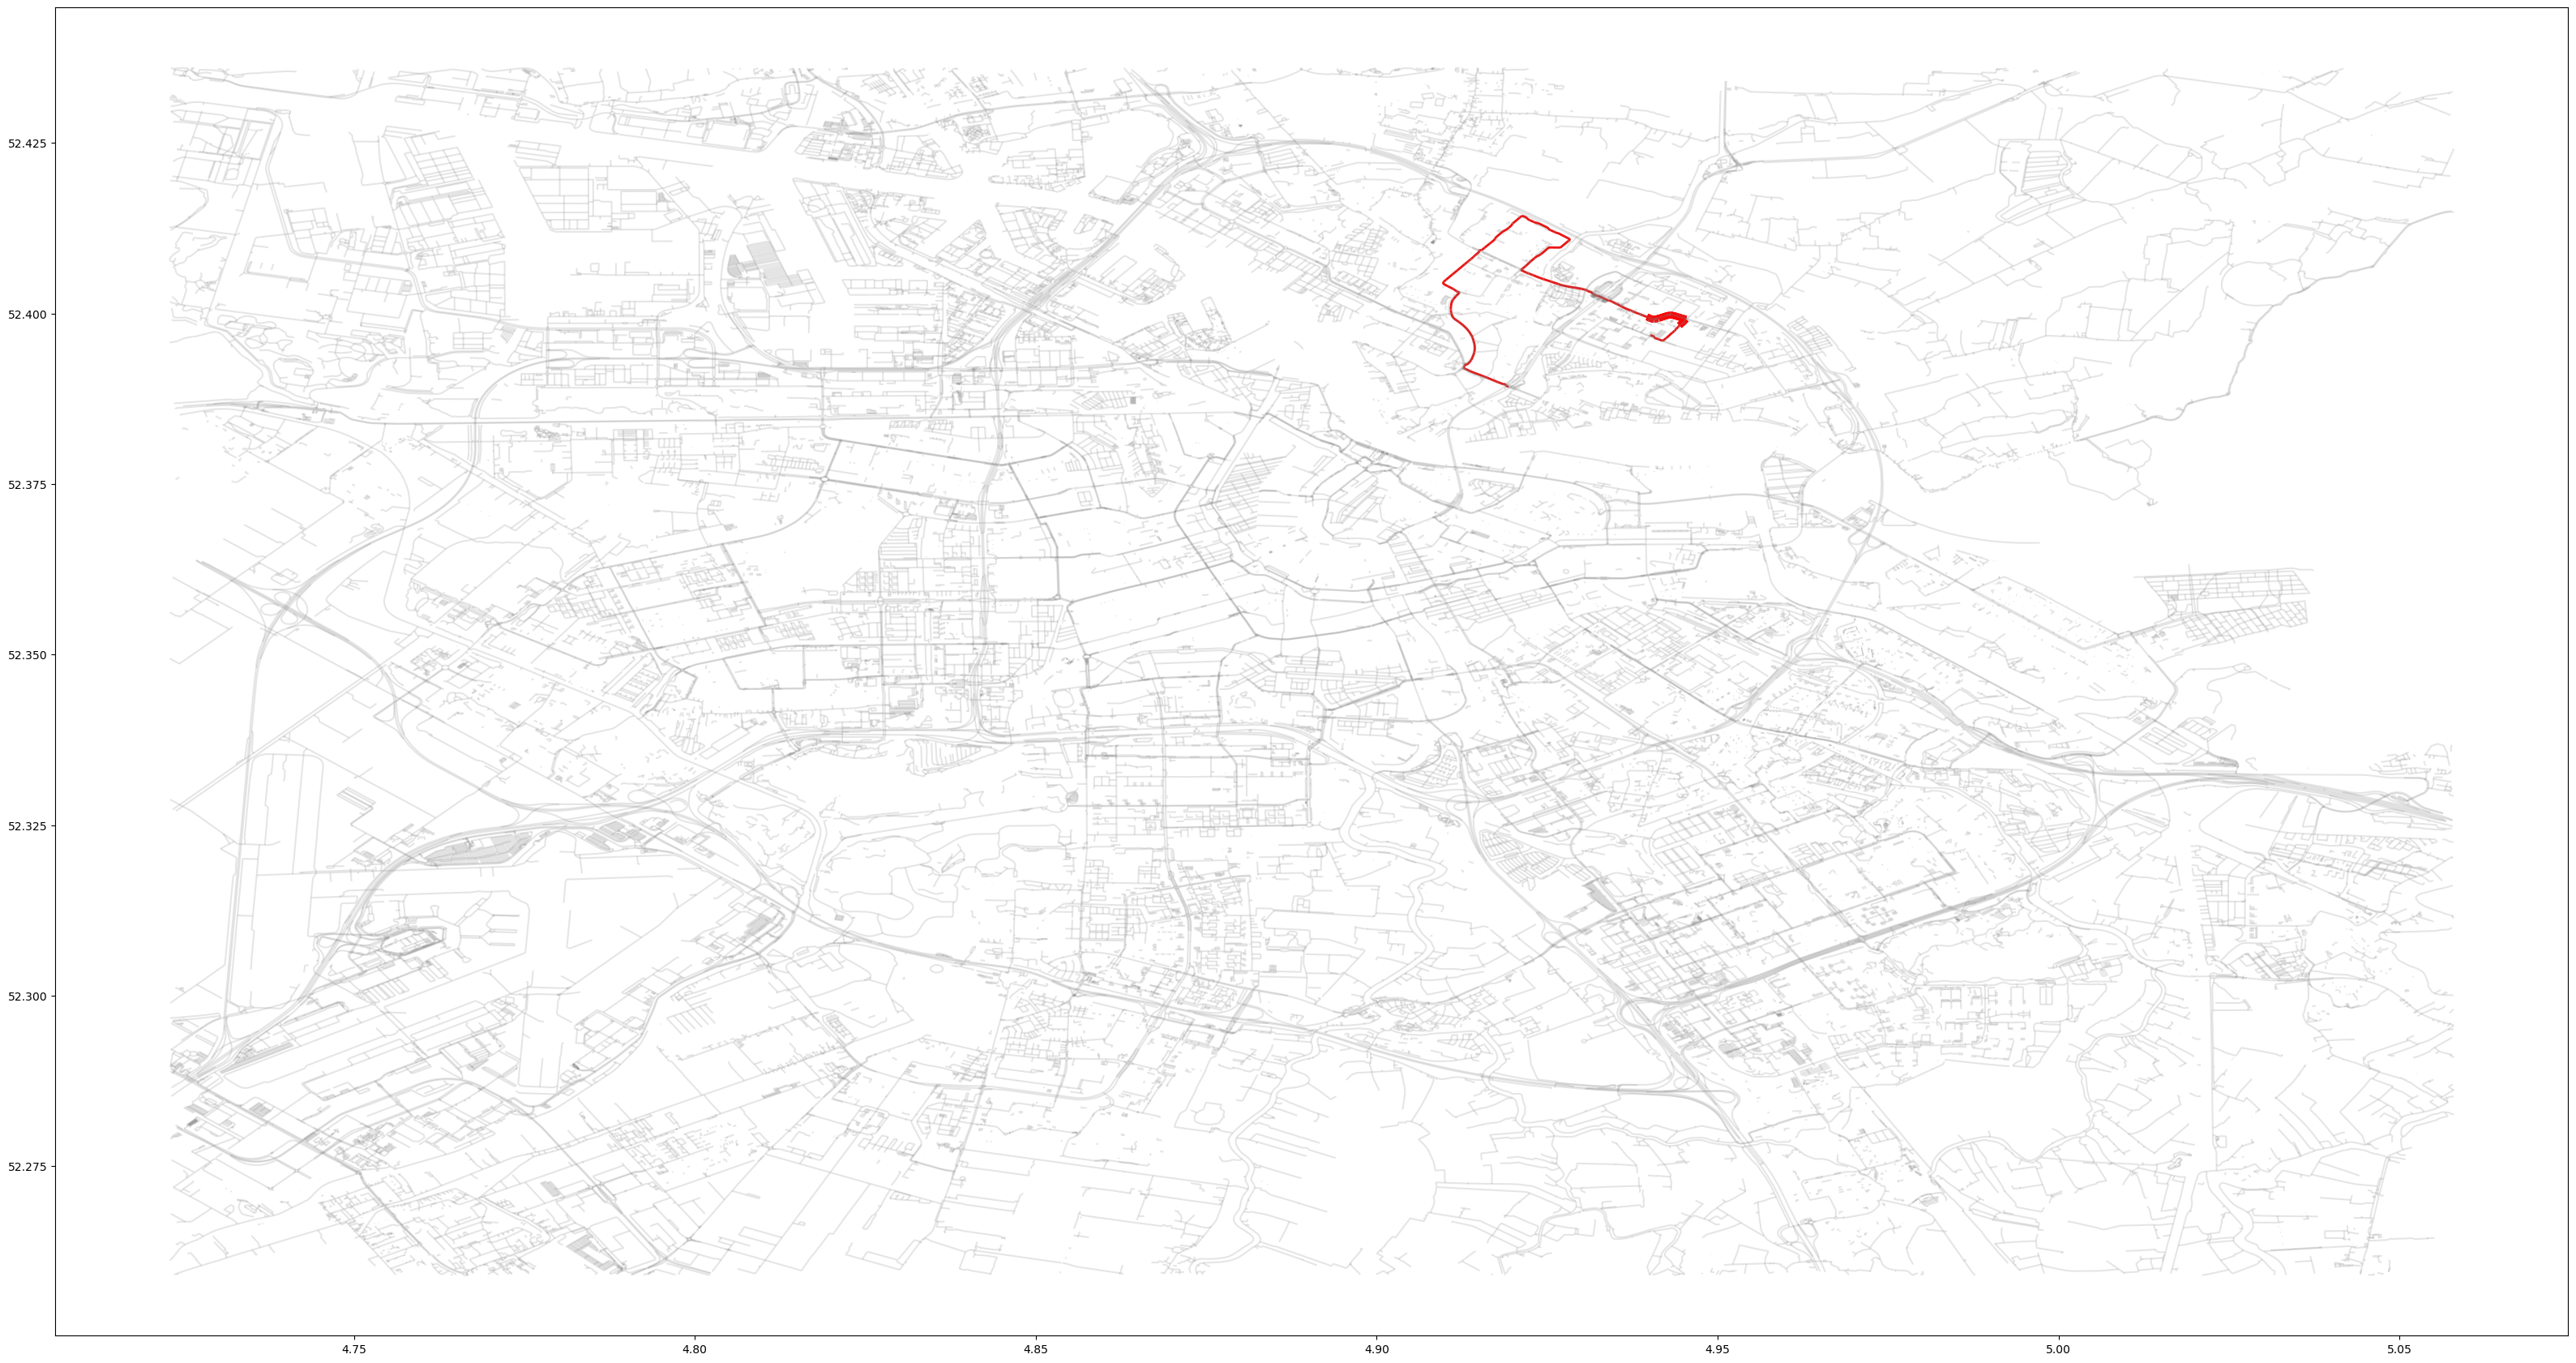

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(40, 40))
gpd.GeoDataFrame(bus_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)
gpd.GeoDataFrame(city_bus_shortest_path_edges['Bus 34: Amsterdam Noorderpark => Amsterdam Olof Palmeplein'].copy()).plot(ax=ax, zorder=1,
                                                                     linewidth=(city_bus_shortest_path_edges['Bus 34: Amsterdam Noorderpark => Amsterdam Olof Palmeplein'].count_weight) * 2,
                                                                     color='red')

In [65]:
len(city_bus_order_route_dict)

61

In [66]:
bus_edges

osm_id                                           geometry  service  \
0         4436684  LINESTRING (4.9683596 52.3558775, 4.9683345 52...    steps   
1         4495957  LINESTRING (4.8601784 52.357593, 4.8601399 52....    steps   
2         4496429  LINESTRING (4.8743983 52.358788, 4.8744747 52....  service   
3         4727308  LINESTRING (4.9563878 52.377293, 4.9564629 52....     path   
4         4727308  LINESTRING (4.9564856 52.376881, 4.9564944 52....     path   
...           ...                                                ...      ...   
71623  1185077512  LINESTRING (4.795149 52.3318873, 4.7953163 52....  service   
71624  1185077519  LINESTRING (4.7974835 52.3325307, 4.7972201 52...  service   
71625  1185077520  LINESTRING (4.7967795 52.3323057, 4.7972519 52...  service   
71626  1185077524  LINESTRING (4.7997017 52.3324389, 4.7997688 52...     path   
71627  1185077528  LINESTRING (4.7988313 52.3335157, 4.7987286 52...  service   

          id  from_id  to_id   distance      time  weights         to_from  \
0          0        0      1   4.049164  0.000324        4          (0, 1)   
1          1        2      3   7.754968  0.000620        7          (2, 3)   
2          2        4      5  68.807947  0.005505       68          (4, 5)   
3          3        6  65237  46.383298  0.003711       46      (6, 65237)   
4          4    65237      7   2.090290  0.000167        2      (65237, 7)   
...      ...      ...    ...        ...       ...      ...             ...   
71623  71623    65586  65587  29.884042  0.002391       29  (65586, 65587)   
71624  71624    65588  65589  19.267219  0.001541       19  (65588, 65589)   
71625  71625    65590  65591  34.723141  0.002778       34  (65590, 65591)   
71626  71626    65592  65593  65.462451  0.005237       65  (65592, 65593)   
71627  71627    65594  65595  41.888083  0.003351       41  (65594, 65595)   

              from_to railway  
0              (1, 0)     bus  
1              (3, 2)     bus  
2              (5, 4)     bus  
3          (65237, 6)     bus  
4          (7, 65237)     bus  
...               ...     ...  
71623  (65587, 65586)     bus  
71624  (65589, 65588)     bus  
71625  (65591, 65590)     bus  
71626  (65593, 65592)     bus  
71627  (65595, 65594)     bus  

[71628 rows x 12 columns]

## Add columns to nodes

In [67]:
city_bus_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_bus_order_route_dict, city_bus_routes)

In [68]:
city_bus_order_route_dict

{'Bus 15: Amsterdam Station Zuid => Amsterdam Station Sloterdijk':     id                   name                      geometry     geo_x  \
 0    6           Station Zuid  POINT (4.8720355 52.3408188)  4.872035   
 1    3    Prinses Irenestraat  POINT (4.8682898 52.3428941)   4.86829   
 2   10           Olympiaplein   POINT (4.865862 52.3462864)  4.865862   
 3    8             Olympiaweg  POINT (4.8583469 52.3452468)  4.858347   
 4   28  Haarlemmermeerstation  POINT (4.8576315 52.3492179)  4.857632   
 5   22             Zeilstraat  POINT (4.8566667 52.3512098)  4.856667   
 6   21        Amstelveenseweg  POINT (4.8560722 52.3513667)  4.856072   
 7    1         Hoofddorpplein  POINT (4.8503895 52.3520264)   4.85039   
 8   20   Haarlemmermeerstraat  POINT (4.8503138 52.3554125)  4.850314   
 9   23          Surinameplein  POINT (4.8521842 52.3580689)  4.852184   
 10  26        Corantijnstraat  POINT (4.8532685 52.3617315)  4.853269   
 11  24             Postjesweg    POINT (4.853

In [69]:
city_bus_new_nodes = add_columns_to_nodes(city_bus_order_route_dict, nodes)

In [70]:
city_bus_new_nodes

geometry  degree     id                   name     geo_x  \
0    POINT (4.87204 52.34082)       2  14779           Station Zuid  4.872035   
1    POINT (4.86829 52.34289)       2  67476    Prinses Irenestraat  4.868290   
2    POINT (4.86586 52.34629)       2  68204           Olympiaplein  4.865862   
3    POINT (4.85835 52.34525)       2  68196             Olympiaweg  4.858347   
4    POINT (4.85763 52.34922)       2  68341  Haarlemmermeerstation  4.857632   
..                        ...     ...    ...                    ...       ...   
752  POINT (4.99474 52.35561)       2  67471         Diemerparklaan  4.994741   
753  POINT (4.82444 52.34041)       3  15699    John M. Keynesplein  4.824444   
754  POINT (4.82789 52.34108)       2  11244                    IBM  4.827888   
755  POINT (4.82867 52.34260)       3  26843             Parkeerdek  4.828668   
756  POINT (4.83306 52.34574)       2  31909      Henk Sneevlietweg  4.833059   

         geo_y         coordinate_value  \
0    52.340819  (4.8720355, 52.3408188)   
1    52.342894  (4.8682898, 52.3428941)   
2    52.346286   (4.865862, 52.3462864)   
3    52.345247  (4.8583469, 52.3452468)   
4    52.349218  (4.8576315, 52.3492179)   
..         ...                      ...   
752  52.355608   (4.9947414, 52.355608)   
753  52.340413    (4.824444, 52.340413)   
754  52.341080   (4.827888, 52.3410803)   
755  52.342595  (4.8286682, 52.3425954)   
756  52.345742  (4.8330587, 52.3457424)   

                                       route_name_list route          ref  \
0    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus   15, 62, 65   
1    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus  15, 246, 65   
2    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus           15   
3    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus           15   
4    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus       15, 62   
..                                                 ...   ...          ...   
752  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...   bus           66   
753  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   
754  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   
755  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus           68   
756  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus           68   

        transfer  
0     15, 62, 65  
1    15, 246, 65  
2           None  
3           None  
4         15, 62  
..           ...  
752         None  
753      267, 68  
754      267, 68  
755         None  
756         None  

[757 rows x 11 columns]

### retrive all transfer stations on each route

In [71]:
city_bus_transfer_stations_df = all_transfer_stations_df(city_bus_new_nodes)

In [72]:
city_bus_transfer_stations_df

geometry  degree     id                   name     geo_x  \
0    POINT (4.87204 52.34082)       2  14779           Station Zuid  4.872035   
1    POINT (4.86829 52.34289)       2  67476    Prinses Irenestraat  4.868290   
4    POINT (4.85763 52.34922)       2  68341  Haarlemmermeerstation  4.857632   
5    POINT (4.85667 52.35121)       2  68268             Zeilstraat  4.856667   
6    POINT (4.85607 52.35137)       2  68266        Amstelveenseweg  4.856072   
..                        ...     ...    ...                    ...       ...   
740  POINT (4.96581 52.31983)       0  66747             Tulastraat  4.965810   
741  POINT (4.97152 52.32169)       0  67123      Annie Romeinplein  4.971517   
742  POINT (4.97323 52.32306)       2  67461     Station Ganzenhoef  4.973228   
753  POINT (4.82444 52.34041)       3  15699    John M. Keynesplein  4.824444   
754  POINT (4.82789 52.34108)       2  11244                    IBM  4.827888   

         geo_y         coordinate_value  \
0    52.340819  (4.8720355, 52.3408188)   
1    52.342894  (4.8682898, 52.3428941)   
4    52.349218  (4.8576315, 52.3492179)   
5    52.351210  (4.8566667, 52.3512098)   
6    52.351367  (4.8560722, 52.3513667)   
..         ...                      ...   
740  52.319830    (4.96581, 52.3198302)   
741  52.321685  (4.9715166, 52.3216851)   
742  52.323056   (4.9732278, 52.323056)   
753  52.340413    (4.824444, 52.340413)   
754  52.341080   (4.827888, 52.3410803)   

                                       route_name_list route          ref  \
0    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus   15, 62, 65   
1    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus  15, 246, 65   
4    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus       15, 62   
5    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus       15, 62   
6    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus  15, 246, 62   
..                                                 ...   ...          ...   
740  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...   bus   41, 47, 66   
741  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...   bus       41, 66   
742  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...   bus       41, 66   
753  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   
754  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   

        transfer  
0     15, 62, 65  
1    15, 246, 65  
4         15, 62  
5         15, 62  
6    15, 246, 62  
..           ...  
740   41, 47, 66  
741       41, 66  
742       41, 66  
753      267, 68  
754      267, 68  

[351 rows x 11 columns]

In [73]:
len(city_bus_transfer_stations_df)

351

## Add columns to edges

In [74]:
city_bus_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_bus_shortest_path_edges, city_bus_routes)

In [75]:
city_bus_shortest_path_edges

{'Bus 15: Amsterdam Station Zuid => Amsterdam Station Sloterdijk':          osm_id                                           geometry  \
 0      26956728  LINESTRING (4.8720355 52.3408188, 4.8717707 52...   
 1      26956728  LINESTRING (4.8717707 52.3408097, 4.8716246 52...   
 2      26956728  LINESTRING (4.8705601 52.3407731, 4.8702988 52...   
 3      26956728  LINESTRING (4.8702988 52.3407626, 4.868856 52....   
 4      26982261  LINESTRING (4.8685173 52.3409372, 4.8684681 52...   
 ..          ...                                                ...   
 123   935010194  LINESTRING (4.8435054 52.3848361, 4.8436903 52...   
 124  1020818639  LINESTRING (4.8438138 52.3847277, 4.8438383 52...   
 125  1020818640  LINESTRING (4.8428612 52.3848254, 4.8435054 52...   
 126  1020818641  LINESTRING (4.8438898 52.3843611, 4.8439048 52...   
 127  1147115688  LINESTRING (4.8438493 52.3844829, 4.8438898 52...   
 
            service     id  from_id  to_id    distance      time  weights  \
 0 

In [76]:
city_bus_new_edges = add_columns_to_edges(city_bus_shortest_path_edges,edges)

In [77]:
city_bus_new_edges

osm_id                                           geometry railway  \
0         4436684  LINESTRING (4.9683596 52.3558775, 4.9683345 52...     bus   
1         4495957  LINESTRING (4.8601784 52.357593, 4.8601399 52....     bus   
2         4496429  LINESTRING (4.8743983 52.358788, 4.8744747 52....     bus   
3         4727308  LINESTRING (4.9563878 52.377293, 4.9564629 52....     bus   
4         4727308  LINESTRING (4.9564856 52.376881, 4.9564944 52....     bus   
...           ...                                                ...     ...   
71623  1185077512  LINESTRING (4.795149 52.3318873, 4.7953163 52....     bus   
71624  1185077519  LINESTRING (4.7974835 52.3325307, 4.7972201 52...     bus   
71625  1185077520  LINESTRING (4.7967795 52.3323057, 4.7972519 52...     bus   
71626  1185077524  LINESTRING (4.7997017 52.3324389, 4.7997688 52...     bus   
71627  1185077528  LINESTRING (4.7988313 52.3335157, 4.7987286 52...     bus   

       service     id  from_id  to_id   distance      time  weights  \
0        steps      0        0      1   4.049164  0.000324        4   
1        steps      1        2      3   7.754968  0.000620        7   
2      service      2        4      5  68.807947  0.005505       68   
3         path      3        6  65237  46.383298  0.003711       46   
4         path      4    65237      7   2.090290  0.000167        2   
...        ...    ...      ...    ...        ...       ...      ...   
71623  service  71623    65586  65587  29.884042  0.002391       29   
71624  service  71624    65588  65589  19.267219  0.001541       19   
71625  service  71625    65590  65591  34.723141  0.002778       34   
71626     path  71626    65592  65593  65.462451  0.005237       65   
71627  service  71627    65594  65595  41.888083  0.003351       41   

              to_from         from_to  count_weight route_name_list route  ref  
0              (0, 1)          (1, 0)           NaN             NaN   NaN  NaN  
1              (2, 3)          (3, 2)           NaN             NaN   NaN  NaN  
2              (4, 5)          (5, 4)           NaN             NaN   NaN  NaN  
3          (6, 65237)      (65237, 6)           NaN             NaN   NaN  NaN  
4          (65237, 7)      (7, 65237)           NaN             NaN   NaN  NaN  
...               ...             ...           ...             ...   ...  ...  
71623  (65586, 65587)  (65587, 65586)           NaN             NaN   NaN  NaN  
71624  (65588, 65589)  (65589, 65588)           NaN             NaN   NaN  NaN  
71625  (65590, 65591)  (65591, 65590)           NaN             NaN   NaN  NaN  
71626  (65592, 65593)  (65593, 65592)           NaN             NaN   NaN  NaN  
71627  (65594, 65595)  (65595, 65594)           NaN             NaN   NaN  NaN  

[71628 rows x 16 columns]

# Multi networks

### Merge three networks

In [78]:
three_networks_edges = pd.concat([sub_new_edges,city_tram_new_edges,city_bus_new_edges])
three_networks_nodes = pd.concat([sub_new_nodes,city_tram_new_nodes,city_bus_new_nodes]) 
three_networks_routes = pd.concat([sub_routes,city_tram_routes,city_bus_routes])

In [79]:
three_networks_edges

osm_id                                           geometry railway  \
0        23157994  LINESTRING (4.9236699 52.3361909, 4.9236979 52...  subway   
1        23158053  LINESTRING (4.9642294 52.2945339, 4.9644259 52...  subway   
2        23158054  LINESTRING (4.9622901 52.2955678, 4.9624673 52...  subway   
3        23189033  LINESTRING (4.8467318 52.3952137, 4.8471439 52...  subway   
4        23189039  LINESTRING (4.8409161 52.3937679, 4.8416087 52...  subway   
...           ...                                                ...     ...   
71623  1185077512  LINESTRING (4.795149 52.3318873, 4.7953163 52....     bus   
71624  1185077519  LINESTRING (4.7974835 52.3325307, 4.7972201 52...     bus   
71625  1185077520  LINESTRING (4.7967795 52.3323057, 4.7972519 52...     bus   
71626  1185077524  LINESTRING (4.7997017 52.3324389, 4.7997688 52...     bus   
71627  1185077528  LINESTRING (4.7988313 52.3335157, 4.7987286 52...     bus   

       service     id  from_id  to_id    distance      time  weights  \
0         None      0        0      1  258.660599  0.010346      258   
1         None      1        2      3  215.433271  0.008617      215   
2         None      2        4      5  121.794737  0.004872      121   
3         None      3        6      7   28.046592  0.001122       28   
4         None      4        8    492  382.935219  0.015317      382   
...        ...    ...      ...    ...         ...       ...      ...   
71623  service  71623    65586  65587   29.884042  0.002391       29   
71624  service  71624    65588  65589   19.267219  0.001541       19   
71625  service  71625    65590  65591   34.723141  0.002778       34   
71626     path  71626    65592  65593   65.462451  0.005237       65   
71627  service  71627    65594  65595   41.888083  0.003351       41   

              to_from         from_to  count_weight  \
0              (0, 1)          (1, 0)           1.0   
1              (2, 3)          (3, 2)           1.0   
2              (4, 5)          (5, 4)           1.0   
3              (6, 7)          (7, 6)           NaN   
4            (8, 492)        (492, 8)           1.0   
...               ...             ...           ...   
71623  (65586, 65587)  (65587, 65586)           NaN   
71624  (65588, 65589)  (65589, 65588)           NaN   
71625  (65590, 65591)  (65591, 65590)           NaN   
71626  (65592, 65593)  (65593, 65592)           NaN   
71627  (65594, 65595)  (65595, 65594)           NaN   

                                 route_name_list   route     ref  
0      Metro 51: Isolatorweg => Centraal Station  subway      51  
1                  Metro 50: Isolatorweg => Gein  subway  50, 54  
2                  Metro 50: Isolatorweg => Gein  subway  50, 54  
3                                            NaN     NaN     NaN  
4                  Metro 50: Isolatorweg => Gein  subway  50, 51  
...                                          ...     ...     ...  
71623                                        NaN     NaN     NaN  
71624                                        NaN     NaN     NaN  
71625                                        NaN     NaN     NaN  
71626                                        NaN     NaN     NaN  
71627                                        NaN     NaN     NaN  

[74794 rows x 16 columns]

In [80]:
three_networks_nodes

geometry  degree     id                 name     geo_x  \
0    POINT (4.98916 52.29641)       2    328                 Gein  4.989161   
1    POINT (4.97400 52.29564)       2    855           Reigersbos  4.974000   
2    POINT (4.96013 52.29813)       2    854          Holendrecht  4.960126   
3    POINT (4.95213 52.30687)       2    810            Bullewijk  4.952129   
4    POINT (4.94762 52.31181)       2    809        Bijlmer ArenA  4.947618   
..                        ...     ...    ...                  ...       ...   
752  POINT (4.99474 52.35561)       2  67471       Diemerparklaan  4.994741   
753  POINT (4.82444 52.34041)       3  15699  John M. Keynesplein  4.824444   
754  POINT (4.82789 52.34108)       2  11244                  IBM  4.827888   
755  POINT (4.82867 52.34260)       3  26843           Parkeerdek  4.828668   
756  POINT (4.83306 52.34574)       2  31909    Henk Sneevlietweg  4.833059   

         geo_y         coordinate_value  \
0    52.296407  (4.9891612, 52.2964067)   
1    52.295637  (4.9740002, 52.2956365)   
2    52.298132  (4.9601264, 52.2981319)   
3    52.306869   (4.9521292, 52.306869)   
4    52.311806   (4.9476178, 52.311806)   
..         ...                      ...   
752  52.355608   (4.9947414, 52.355608)   
753  52.340413    (4.824444, 52.340413)   
754  52.341080   (4.827888, 52.3410803)   
755  52.342595  (4.8286682, 52.3425954)   
756  52.345742  (4.8330587, 52.3457424)   

                                       route_name_list   route      ref  \
0                        Metro 50: Gein => Isolatorweg  subway   50, 54   
1                        Metro 50: Gein => Isolatorweg  subway   50, 54   
2                        Metro 50: Gein => Isolatorweg  subway   50, 54   
3                        Metro 50: Gein => Isolatorweg  subway   50, 54   
4                        Metro 50: Gein => Isolatorweg  subway   50, 54   
..                                                 ...     ...      ...   
752  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...     bus       66   
753  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus  267, 68   
754  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus  267, 68   
755  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus       68   
756  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus       68   

    transfer  
0     50, 54  
1     50, 54  
2     50, 54  
3     50, 54  
4     50, 54  
..       ...  
752     None  
753  267, 68  
754  267, 68  
755     None  
756     None  

[1261 rows x 11 columns]

In [81]:
three_networks_routes

osm_id   route                   to  \
0      18683  subway          Isolatorweg   
1    4515354  subway                 Gein   
2      31249  subway          Isolatorweg   
3    4515355  subway     Centraal Station   
4    8466667  subway                 Zuid   
..       ...     ...                  ...   
58    365791     bus     Vennepluimstraat   
59  11720818     bus    Henk Sneevlietweg   
60  11720819     bus  John M. Keynesplein   
61   6096663     bus    Henk Sneevlietweg   
62   5860193     bus  John M. Keynesplein   

                                                 name ref  \
0                       Metro 50: Gein => Isolatorweg  50   
1                       Metro 50: Isolatorweg => Gein  50   
2           Metro 51: Centraal Station => Isolatorweg  51   
3           Metro 51: Isolatorweg => Centraal Station  51   
4                             Metro 52: Noord => Zuid  52   
..                                                ...  ..   
58  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...  66   
59  Bus 68: Amsterdam Riekerpolder => Amsterdam He...  68   
60  Bus 68: Amsterdam Henk Sneevlietweg => Amsterd...  68   
61  Bus 68: Amsterdam Riekerpolder => Amsterdam He...  68   
62  Bus 68: Amsterdam Henk Sneevlietweg => Amsterd...  68   

                   network service  \
0   Stadsvervoer Amsterdam    None   
1   Stadsvervoer Amsterdam    None   
2   Stadsvervoer Amsterdam    None   
3   Stadsvervoer Amsterdam    None   
4   Stadsvervoer Amsterdam    None   
..                     ...     ...   
58  Stadsvervoer Amsterdam    None   
59  Stadsvervoer Amsterdam    None   
60  Stadsvervoer Amsterdam    None   
61  Stadsvervoer Amsterdam    None   
62  Stadsvervoer Amsterdam    None   

                                             geometry  
0   MULTILINESTRING ((4.98996 52.29640, 4.98959 52...  
1   MULTILINESTRING ((4.83880 52.38842, 4.83897 52...  
2   MULTILINESTRING ((4.90193 52.37689, 4.90202 52...  
3   MULTILINESTRING ((4.83880 52.38842, 4.83897 52...  
4   MULTILINESTRING ((4.93265 52.40228, 4.93269 52...  
..                                                ...  
58  MULTILINESTRING ((4.94749 52.31135, 4.94747 52...  
59  MULTILINESTRING ((4.82522 52.34015, 4.82543 52...  
60  MULTILINESTRING ((4.83306 52.34574, 4.83285 52...  
61  MULTILINESTRING ((4.82444 52.34041, 4.82445 52...  
62  MULTILINESTRING ((4.83306 52.34574, 4.83285 52...  

[101 rows x 8 columns]

In [82]:
merged_order_route_dict = {key: value for d in [sub_order_route_dict, city_tram_order_route_dict, city_bus_order_route_dict] for key, value in d.items()}

In [83]:
merged_order_route_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                      geometry     geo_x  \
 0    5                 Gein  POINT (4.9891612 52.2964067)  4.989161   
 1   18           Reigersbos  POINT (4.9740002 52.2956365)     4.974   
 2   17          Holendrecht  POINT (4.9601264 52.2981319)  4.960126   
 3    6            Bullewijk   POINT (4.9521292 52.306869)  4.952129   
 4    4        Bijlmer ArenA   POINT (4.9476178 52.311806)  4.947618   
 5    3          Strandvliet  POINT (4.9413977 52.3186119)  4.941398   
 6   16         Duivendrecht  POINT (4.9365601 52.3236024)   4.93656   
 7    7      Van der Madeweg  POINT (4.9304544 52.3297847)  4.930454   
 8    9           Overamstel  POINT (4.9176063 52.3317688)  4.917606   
 9   19          Station RAI    POINT (4.889539 52.337689)  4.889539   
 10  10                 Zuid  POINT (4.8739633 52.3393223)  4.873963   
 11   8      Amstelveenseweg  POINT (4.8575709 52.3384751)  4.857571   
 12  11    Henk Sneevlietweg  P

# Transfer stations adding transfer_all column and new judgement of transformation

In [84]:
# convert coordinates in station_df from degree to meter
def convert_deg_to_meter(new_nodes_df):
    # Convert the 'geometry' column to a Point object
    new_nodes_df['geometry'] = new_nodes_df.apply(lambda row: Point(row['geo_x'], row['geo_y']), axis=1)
    
    # Define the coordinate reference systems (CRS)
    crs_deg = 'EPSG:4326'  # WGS 84, the standard coordinate system for GPS
    crs_meter = 'EPSG:3857'  # World Mercator, commonly used for distance calculations

    # Create a transformer to convert from degrees to meters
    transformer = Transformer.from_crs(crs_deg, crs_meter, always_xy=True)

    # Apply the transformer to each Point in the 'geometry' column
    new_nodes_df['geometry'] = new_nodes_df['geometry'].apply(lambda point: Point(transformer.transform(point.x, point.y)))
    
    return new_nodes_df

In [85]:
def new_nodes_buffer(new_nodes_df,buffer_radius):
    new_nodes_df = convert_deg_to_meter(new_nodes_df)
    node_buffers = []

    for index, row in new_nodes_df.iterrows():
        point = row['geometry']
        buffer = point.buffer(buffer_radius)
        node_buffers.append(buffer)

    buffered_gdf = gpd.GeoDataFrame(geometry=node_buffers)
    buffered_df = pd.DataFrame(buffered_gdf).rename(columns={'geometry': 'buffer_geometry'})
    new_nodes_buffer_geometry = pd.concat([new_nodes_df,buffered_df],axis=1)
    return new_nodes_buffer_geometry

In [86]:
def add_footnote_to_new_nodes(new_nodes_df):
    new_nodes_df = convert_deg_to_meter(new_nodes_df)
    # create a exactly same dataframe with new_nodes_df but name columns by different transportation routes
    rename_cols = {
    "geometry": "geometry"+"_"+new_nodes_df.loc[0,'route'],
    "degree": "degree"+"_"+new_nodes_df.loc[0,'route'],
    "id": "id"+"_"+new_nodes_df.loc[0,'route'],
    "name": "name"+"_"+new_nodes_df.loc[0,'route'],
    "geo_x": "geo_x"+"_"+new_nodes_df.loc[0,'route'],
    "geo_y": "geo_y"+"_"+new_nodes_df.loc[0,'route'],
    "coordinate_value": "coordinate_value"+"_"+new_nodes_df.loc[0,'route'],
    "route_name_list": "route_name_list"+"_"+new_nodes_df.loc[0,'route'],
    "route": "route"+"_"+new_nodes_df.loc[0,'route'],
    "ref": "ref"+"_"+new_nodes_df.loc[0,'route'],
    "transfer": "transfer"+"_"+new_nodes_df.loc[0,'route']
    }
    new_nodes_ftn = new_nodes_df.rename(columns=rename_cols)
    return new_nodes_ftn

In [87]:
def transfer_A_to_B(A_new_nodes_buffer_geometry,B_new_nodes_ftn):
    transfer_stations_A_to_B = pd.DataFrame()
    
    for index, row in A_new_nodes_buffer_geometry.iterrows():
        each_transfer_stations_df = B_new_nodes_ftn[row['buffer_geometry'].intersects(B_new_nodes_ftn.iloc[:, 0])]
        
        if not each_transfer_stations_df.empty:
            replicated_row = pd.concat([row] * len(each_transfer_stations_df), axis=1).transpose()
            replicated_row.reset_index(drop=True, inplace=True)  # Reset the index
            each_transfer_stations_df.reset_index(drop=True, inplace=True)  # Reset the index
            co_df = pd.concat([replicated_row,each_transfer_stations_df], axis=1)
            transfer_stations_A_to_B = pd.concat([transfer_stations_A_to_B,co_df])
            
       

    return transfer_stations_A_to_B

In [88]:
def process_ref_transfer_all(cell_value):
    if pd.notna(cell_value):  # 检查是否是 NaN 值
        return set(filter(lambda x: x != 'nan', map(str.strip, cell_value.split(','))))
    else:
        return set()

In [89]:
def add_ref_transfer_all_to_new_nodes(transfer_stations_A_to_B, transfer_stations_A_to_C, A_new_nodes):

    selected_columns_to_B = transfer_stations_A_to_B.iloc[:, [0, 3, 9,21]]

    unique_rows_to_B = selected_columns_to_B.drop_duplicates(subset='geometry')

    unique_rows_to_B['ref_1'] = unique_rows_to_B.apply(lambda row: f"{row.iloc[2]}, {row.iloc[3]}", axis=1)


    transfer_ref_to_B = unique_rows_to_B[['name', 'ref_1']].drop_duplicates(subset='name')

    A_new_nodes_to_B = pd.merge(A_new_nodes,transfer_ref_to_B,on = 'name', how = 'left')

    
    selected_columns_to_C = transfer_stations_A_to_C.iloc[:, [0, 3, 9,21]]

    unique_rows_to_C = selected_columns_to_C.drop_duplicates(subset='geometry')

    unique_rows_to_C['ref_2'] = unique_rows_to_C.apply(lambda row: f"{row.iloc[2]}, {row.iloc[3]}", axis=1)


    transfer_ref_to_C = unique_rows_to_C[['name', 'ref_2']].drop_duplicates(subset='name')

    A_new_nodes_to_B_C = pd.merge(A_new_nodes_to_B,transfer_ref_to_C,on = 'name', how = 'left')
    

    A_new_nodes_to_B_C['ref_transfer_all'] = A_new_nodes_to_B_C.apply(lambda row: f"{row['ref']}, {row['ref_1']}, {row['ref_2']}", axis=1)
    
    A_new_nodes_to_B_C['ref_transfer_all'] = A_new_nodes_to_B_C['ref_transfer_all'].apply(process_ref_transfer_all)

    A_new_nodes_transfer_all = A_new_nodes_to_B_C
    

    return A_new_nodes_transfer_all

In [90]:
buffer_radius = 200

In [91]:
sub_new_nodes_buffer_geometry = new_nodes_buffer(sub_new_nodes,buffer_radius)
sub_new_nodes_buffer_geometry

geometry  degree   id                 name  \
0   POINT (555390.884 6853898.052)       2  328                 Gein   
1   POINT (553703.169 6853757.861)       2  855           Reigersbos   
2   POINT (552158.745 6854212.080)       2  854          Holendrecht   
3   POINT (551268.501 6855802.630)       2  810            Bullewijk   
4   POINT (550766.294 6856701.528)       2  809        Bijlmer ArenA   
..                             ...     ...  ...                  ...   
81  POINT (552961.225 6859717.546)       2  824    Verrijn Stuartweg   
82  POINT (551775.962 6860088.944)       2  823  Station Diemen Zuid   
83  POINT (550617.070 6859438.093)       2  829         Venserpolder   
84  POINT (548836.771 6859966.806)       2  827      Van der Madeweg   
85  POINT (547808.268 6861889.144)       2  833           Spaklerweg   

       geo_x      geo_y         coordinate_value  \
0   4.989161  52.296407  (4.9891612, 52.2964067)   
1   4.974000  52.295637  (4.9740002, 52.2956365)   
2   4.960126  52.298132  (4.9601264, 52.2981319)   
3   4.952129  52.306869   (4.9521292, 52.306869)   
4   4.947618  52.311806   (4.9476178, 52.311806)   
..       ...        ...                      ...   
81  4.967335  52.328367  (4.9673352, 52.3283668)   
82  4.956688  52.330406  (4.9566878, 52.3304057)   
83  4.946277  52.326833  (4.9462773, 52.3268326)   
84  4.930285  52.329735  (4.9302846, 52.3297352)   
85  4.921045  52.340287  (4.9210454, 52.3402871)   

                              route_name_list   route         ref    transfer  \
0               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
1               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
2               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
3               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
4               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
..                                        ...     ...         ...         ...   
81  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
82  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
83  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
84  Metro 53: Gaasperplas => Centraal Station  subway  50, 53, 54  50, 53, 54   
85  Metro 53: Gaasperplas => Centraal Station  subway  51, 53, 54  51, 53, 54   

                                      buffer_geometry  
0   POLYGON ((555590.884 6853898.052, 555589.921 6...  
1   POLYGON ((553903.169 6853757.861, 553902.206 6...  
2   POLYGON ((552358.745 6854212.080, 552357.782 6...  
3   POLYGON ((551468.501 6855802.630, 551467.538 6...  
4   POLYGON ((550966.294 6856701.528, 550965.331 6...  
..                                                ...  
81  POLYGON ((553161.225 6859717.546, 553160.262 6...  
82  POLYGON ((551975.962 6860088.944, 551974.999 6...  
83  POLYGON ((550817.070 6859438.093, 550816.107 6...  
84  POLYGON ((549036.771 6859966.806, 549035.808 6...  
85  POLYGON ((548008.268 6861889.144, 548007.305 6...  

[86 rows x 12 columns]

In [92]:
city_tram_new_nodes_ftn = add_footnote_to_new_nodes(city_tram_new_nodes)

In [93]:
transfer_stations_sub_to_tram = transfer_A_to_B(sub_new_nodes_buffer_geometry,city_tram_new_nodes_ftn)
transfer_stations_sub_to_tram

geometry degree   id  \
0    POINT (544300.991693852 6861415.781777877)      2  857   
1    POINT (544300.991693852 6861415.781777877)      2  857   
0   POINT (540742.3190802236 6861559.002901717)      2  835   
1   POINT (540742.3190802236 6861559.002901717)      2  835   
0    POINT (538163.0576104926 6864083.50866388)      2   19   
1    POINT (538163.0576104926 6864083.50866388)      2   19   
0   POINT (538170.3713010377 6865128.310398296)      2  843   
1   POINT (538170.3713010377 6865128.310398296)      2  843   
0   POINT (538270.2471481774 6867775.387160625)      2  846   
1   POINT (538270.2471481774 6867775.387160625)      2  846   
0   POINT (538589.6338992123 6869027.537464746)      2  844   
1   POINT (538589.6338992123 6869027.537464746)      2  844   
0   POINT (538672.6337115478 6870776.420804021)      2  121   
0   POINT (538569.9748771383 6869029.816997857)      2  806   
1   POINT (538569.9748771383 6869029.816997857)      2  806   
0   POINT (538250.0871883947 6867775.842996311)      2  847   
1   POINT (538250.0871883947 6867775.842996311)      2  847   
0   POINT (538146.6379856005 6865128.073441641)      2  842   
1   POINT (538146.6379856005 6865128.073441641)      2  842   
0    POINT (538143.487644011 6864082.834336273)      2  106   
1    POINT (538143.487644011 6864082.834336273)      2  106   
0   POINT (540744.7124492757 6861534.261047471)      2  834   
1   POINT (540744.7124492757 6861534.261047471)      2  834   
0  POINT (544287.7780702949 6861400.6964292545)      2  858   
1  POINT (544287.7780702949 6861400.6964292545)      2  858   
0   POINT (547403.1208118391 6863046.022174509)      2  819   
0   POINT (545562.1969967436 6868645.715657004)      2  731   
1   POINT (545562.1969967436 6868645.715657004)      2  731   
2   POINT (545562.1969967436 6868645.715657004)      2  731   
3   POINT (545562.1969967436 6868645.715657004)      2  731   
4   POINT (545562.1969967436 6868645.715657004)      2  731   
5   POINT (545562.1969967436 6868645.715657004)      2  731   
6   POINT (545562.1969967436 6868645.715657004)      2  731   
0   POINT (545866.9341027902 6866691.428179977)      2  459   
1   POINT (545866.9341027902 6866691.428179977)      2  459   
0   POINT (546339.0511951934 6865720.341024122)      2  460   
1   POINT (546339.0511951934 6865720.341024122)      2  460   
0    POINT (547411.0022317873 6863048.24534716)      2  820   
0  POINT (546346.9548790398 6865723.4216876915)      2  138   
1  POINT (546346.9548790398 6865723.4216876915)      2  138   
0   POINT (545883.2535401405 6866701.309373403)      2  137   
0   POINT (545582.0675258501 6868673.707041025)      2  728   
1   POINT (545582.0675258501 6868673.707041025)      2  728   
2   POINT (545582.0675258501 6868673.707041025)      2  728   
3   POINT (545582.0675258501 6868673.707041025)      2  728   
4   POINT (545582.0675258501 6868673.707041025)      2  728   
5   POINT (545582.0675258501 6868673.707041025)      2  728   
6   POINT (545582.0675258501 6868673.707041025)      2  728   
0   POINT (544637.7220215526 6867402.978026113)      2  813   
0   POINT (544468.8503540193 6865606.813013325)      2  861   
1   POINT (544468.8503540193 6865606.813013325)      2  861   
0   POINT (544526.0240444907 6862051.560162962)      2  860   
1   POINT (544526.0240444907 6862051.560162962)      2  860   
0   POINT (544511.4857189931 6862187.103415814)      2  859   
0   POINT (544488.1976815191 6865603.076167982)      2  862   
1   POINT (544488.1976815191 6865603.076167982)      2  862   
0   POINT (544660.9543992812 6867385.529462318)      2  865   
1   POINT (544660.9543992812 6867385.529462318)      2  865   

                  name     geo_x      geo_y         coordinate_value  \
0          Station RAI  4.889539  52.337689    (4.889539, 52.337689)   
1          Station RAI  4.889539  52.337689    (4.889539, 52.337689)   
0      Amstelveenseweg  4.857571  52.338475  (4.8575709, 52.3384751)   
1      Amstelveenseweg  4.857571 

In [94]:
# transfer_stations_sub_to_tram.to_excel('./transfer_stations_sub_to_tram.xlsx', header= True, index = False)

In [95]:
city_bus_new_nodes_ftn = add_footnote_to_new_nodes(city_bus_new_nodes)
transfer_stations_sub_to_bus = transfer_A_to_B(sub_new_nodes_buffer_geometry,city_bus_new_nodes_ftn)
transfer_stations_sub_to_bus

geometry degree   id  \
0   POINT (555390.8842695578 6853898.051924179)      2  328   
1   POINT (555390.8842695578 6853898.051924179)      2  328   
0    POINT (553703.1694696408 6853757.86095247)      2  855   
0   POINT (550766.2941357364 6856701.527688845)      2  809   
1   POINT (550766.2941357364 6856701.527688845)      2  809   
..                                          ...    ...  ...   
0    POINT (554842.658041299 6856646.265439138)      2  331   
0   POINT (554280.5168766911 6857654.337591772)      2  821   
0   POINT (553601.3900592086 6858871.840217633)      2  301   
0   POINT (551775.9619172314 6860088.943901429)      2  823   
1   POINT (551775.9619172314 6860088.943901429)      2  823   

                   name     geo_x      geo_y         coordinate_value  \
0                  Gein  4.989161  52.296407  (4.9891612, 52.2964067)   
1                  Gein  4.989161  52.296407  (4.9891612, 52.2964067)   
0            Reigersbos     4.974  52.295637  (4.9740002, 52.2956365)   
0         Bijlmer ArenA  4.947618  52.311806   (4.9476178, 52.311806)   
1         Bijlmer ArenA  4.947618  52.311806   (4.9476178, 52.311806)   
..                  ...       ...        ...                      ...   
0           Gaasperplas  4.984236  52.311503  (4.9842364, 52.3115025)   
0           Kraaiennest  4.979187  52.317039  (4.9791866, 52.3170385)   
0            Ganzenhoef  4.973086  52.323724  (4.9730859, 52.3237237)   
0   Station Diemen Zuid  4.956688  52.330406  (4.9566878, 52.3304057)   
1   Station Diemen Zuid  4.956688  52.330406  (4.9566878, 52.3304057)   

                              route_name_list   route     ref  ... degree_bus  \
0               Metro 50: Gein => Isolatorweg  subway  50, 54  ...          2   
1               Metro 50: Gein => Isolatorweg  subway  50, 54  ...          2   
0               Metro 50: Gein => Isolatorweg  subway  50, 54  ...          2   
0               Metro 50: Gein => Isolatorweg  subway  50, 54  ...          2   
1               Metro 50: Gein => Isolatorweg  subway  50, 54  ...          2   
..                                        ...     ...     ...  ...        ...   
0   Metro 53: Gaasperplas => Centraal Station  subway      53  ...          2   
0   Metro 53: Gaasperplas => Centraal Station  subway      53  ...          2   
0   Metro 53: Gaasperplas => Centraal Station  subway      53  ...          2   
0   Metro 53: Gaasperplas => Centraal Station  subway      53  ...          2   
1   Metro 53: Gaasperplas => Centraal Station  subway      53  ...          2   

   id_bus               name_bus  geo_x_bus  geo_y_bus  \
0   67245           Station Gein   4.989235  52.296216   
1   67536           Station Gein   4.989223  52.296498   
0   67537     Station Reigersbos   4.973842  52.296348   
0   67051  Station Bijlmer ArenA   4.947367  52.311433   
1   28716  Station Bijlmer ArenA   4.947343  52.311453   
..    ...                    ...        ...        ...   
0   28927     Gaasperplasstation   4.985183  52.311093   
0   67658     Kraaienneststation   4.978729  52.316002   
0   67461     Station Ganzenhoef   4.973228  52.323056   
0   68349    Station Diemen Zuid   4.956837  52.330865   
1   67260    Station Diemen Zuid   4.956723  52.330813   

       coordinate_value_bus  \
0   (4.9892351, 52.2962162)   
1   (4.9892225, 52.2964983)   
0   (4.9738416, 52.2963482)   
0   (4.9473672, 52.3114329)   
1   (4.9473434, 52.3114533)   
..                      ...   
0   (4.9851835, 52.3110934)   
0   (4.9787292, 52.3160019)   
0    (4.9732278, 52.323056)   
0   (4.9568374, 52.3308648)   
1    (4.9567227, 52.330813)   

                                  route_name_list_bus  route_bus  \
0   Bus 47: Amsterdam Station Bijlmer ArenA => Ams...        bus   
1   Bus 47: Amsterdam Station Holendrecht => Amste...        bus   
0   Bus 47: Amsterdam Station Holendrecht => Amste...        bus   
0   Bus 44: Amsterdam Station Bijlmer ArenA => Die...        bus   
1   Bus 44: Diemen Noo

In [96]:
sub_new_nodes_transfer_all = add_ref_transfer_all_to_new_nodes(transfer_stations_sub_to_tram, transfer_stations_sub_to_bus, sub_new_nodes)
sub_new_nodes_transfer_all

geometry  degree   id                 name  \
0   POINT (555390.884 6853898.052)       2  328                 Gein   
1   POINT (553703.169 6853757.861)       2  855           Reigersbos   
2   POINT (552158.745 6854212.080)       2  854          Holendrecht   
3   POINT (551268.501 6855802.630)       2  810            Bullewijk   
4   POINT (550766.294 6856701.528)       2  809        Bijlmer ArenA   
..                             ...     ...  ...                  ...   
81  POINT (552961.225 6859717.546)       2  824    Verrijn Stuartweg   
82  POINT (551775.962 6860088.944)       2  823  Station Diemen Zuid   
83  POINT (550617.070 6859438.093)       2  829         Venserpolder   
84  POINT (548836.771 6859966.806)       2  827      Van der Madeweg   
85  POINT (547808.268 6861889.144)       2  833           Spaklerweg   

       geo_x      geo_y         coordinate_value  \
0   4.989161  52.296407  (4.9891612, 52.2964067)   
1   4.974000  52.295637  (4.9740002, 52.2956365)   
2   4.960126  52.298132  (4.9601264, 52.2981319)   
3   4.952129  52.306869   (4.9521292, 52.306869)   
4   4.947618  52.311806   (4.9476178, 52.311806)   
..       ...        ...                      ...   
81  4.967335  52.328367  (4.9673352, 52.3283668)   
82  4.956688  52.330406  (4.9566878, 52.3304057)   
83  4.946277  52.326833  (4.9462773, 52.3268326)   
84  4.930285  52.329735  (4.9302846, 52.3297352)   
85  4.921045  52.340287  (4.9210454, 52.3402871)   

                              route_name_list   route         ref    transfer  \
0               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
1               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
2               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
3               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
4               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
..                                        ...     ...         ...         ...   
81  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
82  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
83  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
84  Metro 53: Gaasperplas => Centraal Station  subway  50, 53, 54  50, 53, 54   
85  Metro 53: Gaasperplas => Centraal Station  subway  51, 53, 54  51, 53, 54   

   ref_1                   ref_2          ref_transfer_all  
0    NaN              50, 54, 47              {47, 50, 54}  
1    NaN              50, 54, 47              {47, 50, 54}  
2    NaN                     NaN                  {50, 54}  
3    NaN                     NaN                  {50, 54}  
4    NaN  50, 54, 44, 47, 49, 66  {50, 49, 47, 66, 54, 44}  
..   ...                     ...                       ...  
81   NaN                     NaN                      {53}  
82   NaN                  53, 44                  {53, 44}  
83   NaN                     NaN                      {53}  
84   NaN                     NaN              {53, 50, 54}  
85   NaN                     NaN              {53, 54, 51}  

[86 rows x 14 columns]

In [97]:
sub_new_nodes_buffer_geometry = new_nodes_buffer(sub_new_nodes,buffer_radius)

city_tram_new_nodes_ftn = add_footnote_to_new_nodes(city_tram_new_nodes)
transfer_stations_sub_to_tram = transfer_A_to_B(sub_new_nodes_buffer_geometry,city_tram_new_nodes_ftn)

city_bus_new_nodes_ftn = add_footnote_to_new_nodes(city_bus_new_nodes)
transfer_stations_sub_to_bus = transfer_A_to_B(sub_new_nodes_buffer_geometry,city_bus_new_nodes_ftn)

sub_new_nodes_transfer_all = add_ref_transfer_all_to_new_nodes(transfer_stations_sub_to_tram, transfer_stations_sub_to_bus, sub_new_nodes)
sub_new_nodes_transfer_all

geometry  degree   id                 name  \
0   POINT (555390.884 6853898.052)       2  328                 Gein   
1   POINT (553703.169 6853757.861)       2  855           Reigersbos   
2   POINT (552158.745 6854212.080)       2  854          Holendrecht   
3   POINT (551268.501 6855802.630)       2  810            Bullewijk   
4   POINT (550766.294 6856701.528)       2  809        Bijlmer ArenA   
..                             ...     ...  ...                  ...   
81  POINT (552961.225 6859717.546)       2  824    Verrijn Stuartweg   
82  POINT (551775.962 6860088.944)       2  823  Station Diemen Zuid   
83  POINT (550617.070 6859438.093)       2  829         Venserpolder   
84  POINT (548836.771 6859966.806)       2  827      Van der Madeweg   
85  POINT (547808.268 6861889.144)       2  833           Spaklerweg   

       geo_x      geo_y         coordinate_value  \
0   4.989161  52.296407  (4.9891612, 52.2964067)   
1   4.974000  52.295637  (4.9740002, 52.2956365)   
2   4.960126  52.298132  (4.9601264, 52.2981319)   
3   4.952129  52.306869   (4.9521292, 52.306869)   
4   4.947618  52.311806   (4.9476178, 52.311806)   
..       ...        ...                      ...   
81  4.967335  52.328367  (4.9673352, 52.3283668)   
82  4.956688  52.330406  (4.9566878, 52.3304057)   
83  4.946277  52.326833  (4.9462773, 52.3268326)   
84  4.930285  52.329735  (4.9302846, 52.3297352)   
85  4.921045  52.340287  (4.9210454, 52.3402871)   

                              route_name_list   route         ref    transfer  \
0               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
1               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
2               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
3               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
4               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
..                                        ...     ...         ...         ...   
81  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
82  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
83  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
84  Metro 53: Gaasperplas => Centraal Station  subway  50, 53, 54  50, 53, 54   
85  Metro 53: Gaasperplas => Centraal Station  subway  51, 53, 54  51, 53, 54   

   ref_1                   ref_2          ref_transfer_all  
0    NaN              50, 54, 47              {47, 50, 54}  
1    NaN              50, 54, 47              {47, 50, 54}  
2    NaN                     NaN                  {50, 54}  
3    NaN                     NaN                  {50, 54}  
4    NaN  50, 54, 44, 47, 49, 66  {50, 49, 47, 66, 54, 44}  
..   ...                     ...                       ...  
81   NaN                     NaN                      {53}  
82   NaN                  53, 44                  {53, 44}  
83   NaN                     NaN                      {53}  
84   NaN                     NaN              {53, 50, 54}  
85   NaN                     NaN              {53, 54, 51}  

[86 rows x 14 columns]

In [98]:
city_tram_new_nodes_buffer_geometry = new_nodes_buffer(city_tram_new_nodes,buffer_radius)

sub_new_nodes_ftn = add_footnote_to_new_nodes(sub_new_nodes)
transfer_stations_tram_to_sub = transfer_A_to_B(city_tram_new_nodes_buffer_geometry,sub_new_nodes_ftn)

city_bus_new_nodes_ftn = add_footnote_to_new_nodes(city_bus_new_nodes)
transfer_stations_tram_to_bus = transfer_A_to_B(city_tram_new_nodes_buffer_geometry,city_bus_new_nodes_ftn)

city_tram_new_nodes_transfer_all = add_ref_transfer_all_to_new_nodes(transfer_stations_tram_to_sub, transfer_stations_tram_to_bus, city_tram_new_nodes)
city_tram_new_nodes_transfer_all

geometry  degree    id                       name  \
0    POINT (549095.945 6865626.846)       2  1341         Muiderpoortstation   
1    POINT (548687.336 6865651.437)       2  1503               Dapperstraat   
2    POINT (548326.739 6865502.838)       2  1606             Linnaeusstraat   
3    POINT (547329.238 6865312.719)       2  1612                  Beukenweg   
4    POINT (546978.593 6865909.649)       2  1598  Korte 's-Gravesandestraat   
..                              ...     ...   ...                        ...   
413  POINT (548393.230 6866966.046)       2  1559      Eerste Coehoornstraat   
414  POINT (548760.528 6867340.750)       2  1808    Eerste Leeghwaterstraat   
415  POINT (549343.063 6867853.627)       2  1515               Rietlandpark   
416  POINT (549714.592 6867935.478)       2  1751        C. van Eesterenlaan   
417  POINT (549622.943 6868547.883)       2   414                 Azartplein   

        geo_x      geo_y         coordinate_value  \
0    4.932613  52.360796  (4.9326128, 52.3607965)   
1    4.928942  52.360931  (4.9289422, 52.3609314)   
2    4.925703  52.360116  (4.9257029, 52.3601162)   
3    4.916742  52.359073  (4.9167422, 52.3590732)   
4    4.913592  52.362348  (4.9135923, 52.3623479)   
..        ...        ...                      ...   
413  4.926300  52.368143  (4.9263002, 52.3681426)   
414  4.929600  52.370198  (4.9295997, 52.3701978)   
415  4.934833  52.373011  (4.9348327, 52.3730107)   
416  4.938170  52.373460  (4.9381702, 52.3734596)   
417  4.937347  52.376818  (4.9373469, 52.3768181)   

                                       route_name_list route       ref  \
0    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
1    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
2    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
3    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
4    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram  1, 19, 7   
..                                                 ...   ...       ...   
413  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
414  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
415  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram     26, 7   
416  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
417  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   

     transfer ref_1                           ref_2  \
0        1, 3   NaN  1, 3, 22, 240, 245, 37, 40, 41   
1        1, 3   NaN               1, 3, 245, 37, 41   
2        1, 3   NaN               1, 3, 245, 37, 41   
3        1, 3   NaN                             NaN   
4    1, 19, 7   NaN                             NaN   
..        ...   ...                             ...   
413      None   NaN                           7, 22   
414      None   NaN                             NaN   
415     26, 7   NaN                             NaN   
416      None   NaN                  7, 246, 43, 65   
417      None   NaN                  7, 246, 43, 65   

                     ref_transfer_all  
0    {245, 240, 1, 40, 41, 37, 22, 3}  
1                 {245, 1, 41, 37, 3}  
2                 {245, 1, 41, 37, 3}  
3                              {1, 3}  
4                          {19, 1, 7}  
..                                ...  
413                           {22, 7}  
414                               {7}  
415                           {26, 7}  
416                  {43, 246, 65, 7}  
417                  {43, 246, 65, 7}  

[418 rows x 14 columns]

In [98]:
city_bus_new_nodes_buffer_geometry = new_nodes_buffer(city_bus_new_nodes,buffer_radius)

sub_new_nodes_ftn = add_footnote_to_new_nodes(sub_new_nodes)
transfer_stations_bus_to_sub = transfer_A_to_B(city_bus_new_nodes_buffer_geometry,sub_new_nodes_ftn)

city_tram_new_nodes_ftn = add_footnote_to_new_nodes(city_tram_new_nodes)
transfer_stations_bus_to_tram = transfer_A_to_B(city_bus_new_nodes_buffer_geometry,city_tram_new_nodes_ftn)

city_bus_new_nodes_transfer_all = add_ref_transfer_all_to_new_nodes(transfer_stations_bus_to_sub, transfer_stations_bus_to_tram, city_bus_new_nodes)
city_bus_new_nodes_transfer_all

geometry  degree     id                   name  \
0    POINT (542352.511 6861986.021)       2  14779           Station Zuid   
1    POINT (541935.542 6862364.157)       2  67476    Prinses Irenestraat   
2    POINT (541665.280 6862982.298)       2  68204           Olympiaplein   
3    POINT (540828.703 6862792.858)       2  68196             Olympiaweg   
4    POINT (540749.065 6863516.510)       2  68341  Haarlemmermeerstation   
..                              ...     ...    ...                    ...   
752  POINT (556012.069 6864681.113)       2  67471         Diemerparklaan   
753  POINT (537054.649 6861912.084)       3  15699    John M. Keynesplein   
754  POINT (537438.034 6862033.668)       2  11244                    IBM   
755  POINT (537524.885 6862309.730)       3  26843             Parkeerdek   
756  POINT (538013.633 6862883.167)       2  31909      Henk Sneevlietweg   

        geo_x      geo_y         coordinate_value  \
0    4.872035  52.340819  (4.8720355, 52.3408188)   
1    4.868290  52.342894  (4.8682898, 52.3428941)   
2    4.865862  52.346286   (4.865862, 52.3462864)   
3    4.858347  52.345247  (4.8583469, 52.3452468)   
4    4.857632  52.349218  (4.8576315, 52.3492179)   
..        ...        ...                      ...   
752  4.994741  52.355608   (4.9947414, 52.355608)   
753  4.824444  52.340413    (4.824444, 52.340413)   
754  4.827888  52.341080   (4.827888, 52.3410803)   
755  4.828668  52.342595  (4.8286682, 52.3425954)   
756  4.833059  52.345742  (4.8330587, 52.3457424)   

                                       route_name_list route          ref  \
0    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus   15, 62, 65   
1    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus  15, 246, 65   
2    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus           15   
3    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus           15   
4    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus       15, 62   
..                                                 ...   ...          ...   
752  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...   bus           66   
753  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   
754  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   
755  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus           68   
756  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus           68   

        transfer       ref_1              ref_2     ref_transfer_all  
0     15, 62, 65         NaN  15, 62, 65, 25, 5  {25, 15, 62, 5, 65}  
1    15, 246, 65         NaN     15, 246, 65, 5     {246, 15, 5, 65}  
2           None         NaN             15, 24             {15, 24}  
3           None         NaN             15, 24             {15, 24}  
4         15, 62         NaN                NaN             {15, 62}  
..           ...         ...                ...                  ...  
752         None         NaN             66, 26             {66, 26}  
753      267, 68         NaN                NaN            {267, 68}  
754      267, 68         NaN                NaN            {267, 68}  
755         None         NaN                NaN                 {68}  
756         None  68, 50, 51                NaN         {50, 51, 68}  

[757 rows x 14 columns]

In [99]:
sub_new_nodes_transfer_all.to_excel('./sub_new_nodes_transfer_all.xlsx', header= True, index = False)
city_tram_new_nodes_transfer_all.to_excel('./city_tram_new_nodes_transfer_all.xlsx', header= True, index = False)
city_bus_new_nodes_transfer_all.to_excel('./city_bus_new_nodes_transfer_all.xlsx', header= True, index = False)

In [89]:
sub_new_nodes_transfer_all.loc[0,'ref_transfer_all']

'50, 54, nan, 50, 54, 47'

In [91]:
set(sub_new_nodes_transfer_all.loc[0,'ref_transfer_all'])

{' ', ',', '0', '4', '5', '7', 'a', 'n'}

In [90]:
def convert_to_set(cell_value):
    if pd.notna(cell_value):  # 检查是否是 NaN 值
        return set(cell_value.split(','))  # 根据实际分隔符进行拆分
    else:
        return set()
convert_to_set(sub_new_nodes_transfer_all.loc[0,'ref_transfer_all'])

{' 47', ' 50', ' 54', ' nan', '50'}

In [92]:
# 定义一个函数，用于处理字符串并返回集合
def process_ref_transfer_all(cell_value):
    if pd.notna(cell_value):  # 检查是否是 NaN 值
        return set(filter(lambda x: x != 'nan', map(str.strip, cell_value.split(','))))
    else:
        return set()

# 应用函数到整个 ref_transfer_all 列
sub_new_nodes_transfer_all['ref_transfer_all'] = sub_new_nodes_transfer_all['ref_transfer_all'].apply(process_ref_transfer_all)
sub_new_nodes_transfer_all

geometry  degree   id                 name  \
0   POINT (555390.884 6853898.052)       2  328                 Gein   
1   POINT (553703.169 6853757.861)       2  855           Reigersbos   
2   POINT (552158.745 6854212.080)       2  854          Holendrecht   
3   POINT (551268.501 6855802.630)       2  810            Bullewijk   
4   POINT (550766.294 6856701.528)       2  809        Bijlmer ArenA   
..                             ...     ...  ...                  ...   
81  POINT (552961.225 6859717.546)       2  824    Verrijn Stuartweg   
82  POINT (551775.962 6860088.944)       2  823  Station Diemen Zuid   
83  POINT (550617.070 6859438.093)       2  829         Venserpolder   
84  POINT (548836.771 6859966.806)       2  827      Van der Madeweg   
85  POINT (547808.268 6861889.144)       2  833           Spaklerweg   

       geo_x      geo_y         coordinate_value  \
0   4.989161  52.296407  (4.9891612, 52.2964067)   
1   4.974000  52.295637  (4.9740002, 52.2956365)   
2   4.960126  52.298132  (4.9601264, 52.2981319)   
3   4.952129  52.306869   (4.9521292, 52.306869)   
4   4.947618  52.311806   (4.9476178, 52.311806)   
..       ...        ...                      ...   
81  4.967335  52.328367  (4.9673352, 52.3283668)   
82  4.956688  52.330406  (4.9566878, 52.3304057)   
83  4.946277  52.326833  (4.9462773, 52.3268326)   
84  4.930285  52.329735  (4.9302846, 52.3297352)   
85  4.921045  52.340287  (4.9210454, 52.3402871)   

                              route_name_list   route         ref    transfer  \
0               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
1               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
2               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
3               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
4               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
..                                        ...     ...         ...         ...   
81  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
82  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
83  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
84  Metro 53: Gaasperplas => Centraal Station  subway  50, 53, 54  50, 53, 54   
85  Metro 53: Gaasperplas => Centraal Station  subway  51, 53, 54  51, 53, 54   

   ref_1                   ref_2          ref_transfer_all  
0    NaN              50, 54, 47              {50, 47, 54}  
1    NaN              50, 54, 47              {50, 47, 54}  
2    NaN                     NaN                  {50, 54}  
3    NaN                     NaN                  {50, 54}  
4    NaN  50, 54, 44, 47, 49, 66  {54, 44, 49, 47, 50, 66}  
..   ...                     ...                       ...  
81   NaN                     NaN                      {53}  
82   NaN                  53, 44                  {44, 53}  
83   NaN                     NaN                      {53}  
84   NaN                     NaN              {54, 50, 53}  
85   NaN                     NaN              {54, 53, 51}  

[86 rows x 14 columns]

In [93]:
type(sub_new_nodes_transfer_all.loc[0,'ref_transfer_all'])

set

In [ ]:
def add_transfer_all_to_new_nodes(A_new_nodes_to_B_C, transfer_stations_A_to_C, A_new_nodes):

In [85]:
def add_transfer_ref_to_sub_new_nodes(transfer_stations_sub_to_tram, sub_new_nodes):

    column_names = ['geometry','name','ref','ref_tram']

    selected_columns = transfer_stations_sub_to_tram[column_names]

    unique_rows = selected_columns.drop_duplicates(subset='geometry')

    unique_rows['ref_sub_tram'] = unique_rows.apply(lambda row: f"{row['ref']}, {row['ref_tram']}", axis=1)


    transfer_ref_sub_to_tram = unique_rows[['name', 'ref_tram', 'ref_sub_tram']].drop_duplicates(subset='name')

    sub_new_nodes_ref_tram = pd.merge(sub_new_nodes,transfer_ref_sub_to_tram,on = 'name', how = 'left')

    return sub_new_nodes_ref_tram

In [86]:
sub_new_nodes_ref_tram = add_transfer_ref_to_sub_new_nodes(transfer_stations_sub_to_tram, sub_new_nodes)
sub_new_nodes_ref_tram

geometry  degree   id                 name  \
0   POINT (555390.884 6853898.052)       2  328                 Gein   
1   POINT (553703.169 6853757.861)       2  855           Reigersbos   
2   POINT (552158.745 6854212.080)       2  854          Holendrecht   
3   POINT (551268.501 6855802.630)       2  810            Bullewijk   
4   POINT (550766.294 6856701.528)       2  809        Bijlmer ArenA   
..                             ...     ...  ...                  ...   
81  POINT (552961.225 6859717.546)       2  824    Verrijn Stuartweg   
82  POINT (551775.962 6860088.944)       2  823  Station Diemen Zuid   
83  POINT (550617.070 6859438.093)       2  829         Venserpolder   
84  POINT (548836.771 6859966.806)       2  827      Van der Madeweg   
85  POINT (547808.268 6861889.144)       2  833           Spaklerweg   

       geo_x      geo_y         coordinate_value  \
0   4.989161  52.296407  (4.9891612, 52.2964067)   
1   4.974000  52.295637  (4.9740002, 52.2956365)   
2   4.960126  52.298132  (4.9601264, 52.2981319)   
3   4.952129  52.306869   (4.9521292, 52.306869)   
4   4.947618  52.311806   (4.9476178, 52.311806)   
..       ...        ...                      ...   
81  4.967335  52.328367  (4.9673352, 52.3283668)   
82  4.956688  52.330406  (4.9566878, 52.3304057)   
83  4.946277  52.326833  (4.9462773, 52.3268326)   
84  4.930285  52.329735  (4.9302846, 52.3297352)   
85  4.921045  52.340287  (4.9210454, 52.3402871)   

                              route_name_list   route         ref    transfer  \
0               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
1               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
2               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
3               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
4               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
..                                        ...     ...         ...         ...   
81  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
82  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
83  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
84  Metro 53: Gaasperplas => Centraal Station  subway  50, 53, 54  50, 53, 54   
85  Metro 53: Gaasperplas => Centraal Station  subway  51, 53, 54  51, 53, 54   

   ref_tram ref_sub_tram  
0       NaN          NaN  
1       NaN          NaN  
2       NaN          NaN  
3       NaN          NaN  
4       NaN          NaN  
..      ...          ...  
81      NaN          NaN  
82      NaN          NaN  
83      NaN          NaN  
84      NaN          NaN  
85      NaN          NaN  

[86 rows x 13 columns]

In [87]:
sub_new_nodes_ref_tram.to_excel('.\sub_new_nodes_ref_tram.xlsx',header = True, index = False)

In [89]:
# Specify the names of the columns you want to retrieve
column_names = ['geometry','name','ref','name_tram','ref_tram']

# Use square bracket notation to select columns by name
selected_columns = transfer_stations_sub_to_tram[column_names]

# Display the result
selected_columns

geometry                 name  \
0    POINT (544300.991693852 6861415.781777877)          Station RAI   
1    POINT (544300.991693852 6861415.781777877)          Station RAI   
0   POINT (540742.3190802236 6861559.002901717)      Amstelveenseweg   
1   POINT (540742.3190802236 6861559.002901717)      Amstelveenseweg   
0    POINT (538163.0576104926 6864083.50866388)      Heemstedestraat   
1    POINT (538163.0576104926 6864083.50866388)      Heemstedestraat   
0   POINT (538170.3713010377 6865128.310398296)             Lelylaan   
1   POINT (538170.3713010377 6865128.310398296)             Lelylaan   
0   POINT (538270.2471481774 6867775.387160625)  Jan van Galenstraat   
1   POINT (538270.2471481774 6867775.387160625)  Jan van Galenstraat   
0   POINT (538589.6338992123 6869027.537464746)         De Vlugtlaan   
1   POINT (538589.6338992123 6869027.537464746)         De Vlugtlaan   
0   POINT (538672.6337115478 6870776.420804021)   Station Sloterdijk   
0   POINT (538569.9748771383 6869029.816997857)         De Vlugtlaan   
1   POINT (538569.9748771383 6869029.816997857)         De Vlugtlaan   
0   POINT (538250.0871883947 6867775.842996311)  Jan van Galenstraat   
1   POINT (538250.0871883947 6867775.842996311)  Jan van Galenstraat   
0   POINT (538146.6379856005 6865128.073441641)             Lelylaan   
1   POINT (538146.6379856005 6865128.073441641)             Lelylaan   
0    POINT (538143.487644011 6864082.834336273)      Heemstedestraat   
1    POINT (538143.487644011 6864082.834336273)      Heemstedestraat   
0   POINT (540744.7124492757 6861534.261047471)      Amstelveenseweg   
1   POINT (540744.7124492757 6861534.261047471)      Amstelveenseweg   
0  POINT (544287.7780702949 6861400.6964292545)          Station RAI   
1  POINT (544287.7780702949 6861400.6964292545)          Station RAI   
0   POINT (547403.1208118391 6863046.022174509)        Amstelstation   
0   POINT (545562.1969967436 6868645.715657004)     Centraal Station   
1   POINT (545562.1969967436 6868645.715657004)     Centraal Station   
2   POINT (545562.1969967436 6868645.715657004)     Centraal Station   
3   POINT (545562.1969967436 6868645.715657004)     Centraal Station   
4   POINT (545562.1969967436 6868645.715657004)     Centraal Station   
5   POINT (545562.1969967436 6868645.715657004)     Centraal Station   
6   POINT (545562.1969967436 6868645.715657004)     Centraal Station   
0   POINT (545866.9341027902 6866691.428179977)        Waterlooplein   
1   POINT (545866.9341027902 6866691.428179977)        Waterlooplein   
0   POINT (546339.0511951934 6865720.341024122)         Weesperplein   
1   POINT (546339.0511951934 6865720.341024122)         Weesperplein   
0    POINT (547411.0022317873 6863048.24534716)        Amstelstation   
0  POINT (546346.9548790398 6865723.4216876915)         Weesperplein   
1  POINT (546346.9548790398 6865723.4216876915)         Weesperplein   
0   POINT (545883.2535401405 6866701.309373403)        Waterlooplein   
0   POINT (545582.0675258501 6868673.707041025)     Centraal Station   
1   POINT (545582.0675258501 6868673.707041025)     Centraal Station   
2   POINT (545582.0675258501 6868673.707041025)     Centraal Station   
3   POINT (545582.0675258501 6868673.707041025)     Centraal Station   
4   POINT (545582.0675258501 6868673.707041025)     Centraal Station   
5   POINT (545582.0675258501 6868673.707041025)     Centraal Station   
6   POINT (545582.0675258501 6868673.707041025)     Centraal Station   
0   POINT (544637.7220215526 6867402.978026113)                Rokin   
0   POINT (544468.8503540193 6865606.813013325)         Vijzelgracht   
1   POINT (544468.8503540193 6865606.813013325)         Vijzelgracht   
0   POINT (544526.0240444907 6862051.560162962)          Europaplein   
1   POINT (544526.0240444907 6862051.560162962)          Europaplein   
0   POINT (544511.4857189931 6862187.103415814)          Europaplein   
0   POINT (544488.1976815191 6865603.076167982)         Vijzelgracht   
1   POI

In [90]:
unique_rows = selected_columns.drop_duplicates(subset='geometry')

# 合并 "ref" 和 "ref_tram" 列内容，放入新列 "ref_sub_tram"
unique_rows['ref_sub_tram'] = unique_rows.apply(lambda row: f"{row['ref']}, {row['ref_tram']}", axis=1)


# transfer_ref_sub_tram = unique_rows[['geometry', 'name', 'ref', 'ref_tram', 'ref_sub_tram']]
# transfer_ref_sub_tram = unique_rows[['name', 'ref_tram', 'ref_sub_tram']].drop_duplicates(subset='name')
transfer_ref_sub_tram = unique_rows.drop_duplicates(subset='name')

transfer_ref_sub_tram

geometry                 name  \
0   POINT (544300.991693852 6861415.781777877)          Station RAI   
0  POINT (540742.3190802236 6861559.002901717)      Amstelveenseweg   
0   POINT (538163.0576104926 6864083.50866388)      Heemstedestraat   
0  POINT (538170.3713010377 6865128.310398296)             Lelylaan   
0  POINT (538270.2471481774 6867775.387160625)  Jan van Galenstraat   
0  POINT (538589.6338992123 6869027.537464746)         De Vlugtlaan   
0  POINT (538672.6337115478 6870776.420804021)   Station Sloterdijk   
0  POINT (547403.1208118391 6863046.022174509)        Amstelstation   
0  POINT (545562.1969967436 6868645.715657004)     Centraal Station   
0  POINT (545866.9341027902 6866691.428179977)        Waterlooplein   
0  POINT (546339.0511951934 6865720.341024122)         Weesperplein   
0  POINT (544637.7220215526 6867402.978026113)                Rokin   
0  POINT (544468.8503540193 6865606.813013325)         Vijzelgracht   
0  POINT (544526.0240444907 6862051.560162962)          Europaplein   

              ref                  name_tram                      ref_tram  \
0          50, 51                Station RAI                             4   
0          50, 51            Amstelveenseweg                         2, 24   
0          50, 51            Heemstedestraat                             2   
0          50, 51           Station Lelylaan                         1, 17   
0          50, 51        Jan van Galenstraat                     13, 19, 7   
0          50, 51  Burgemeester de Vlugtlaan                             7   
0          50, 51         Station Sloterdijk                            19   
0      51, 53, 54              Amstelstation                            12   
0  51, 52, 53, 54           Centraal Station  12, 13, 14, 17, 2, 24, 26, 4   
0      51, 53, 54              Waterlooplein                            14   
0      51, 53, 54               Weesperplein                      1, 19, 7   
0              52                      Rokin                     14, 24, 4   
0              52               Vijzelgracht                  1, 19, 24, 7   
0              52                Europaplein                             4   

                                   ref_sub_tram  
0                                     50, 51, 4  
0                                 50, 51, 2, 24  
0                                     50, 51, 2  
0                                 50, 51, 1, 17  
0                             50, 51, 13, 19, 7  
0                                     50, 51, 7  
0                                    50, 51, 19  
0                                51, 53, 54, 12  
0  51, 52, 53, 54, 12, 13, 14, 17, 2, 24, 26, 4  
0                                51, 53, 54, 14  
0                          51, 53, 54, 1, 19, 7  
0                                 52, 14, 24, 4  
0                              52, 1, 19, 24, 7  
0                                         52, 4

In [93]:
unique_rows

geometry                 name  \
0    POINT (544300.991693852 6861415.781777877)          Station RAI   
0   POINT (540742.3190802236 6861559.002901717)      Amstelveenseweg   
0    POINT (538163.0576104926 6864083.50866388)      Heemstedestraat   
0   POINT (538170.3713010377 6865128.310398296)             Lelylaan   
0   POINT (538270.2471481774 6867775.387160625)  Jan van Galenstraat   
0   POINT (538589.6338992123 6869027.537464746)         De Vlugtlaan   
0   POINT (538672.6337115478 6870776.420804021)   Station Sloterdijk   
0   POINT (538569.9748771383 6869029.816997857)         De Vlugtlaan   
0   POINT (538250.0871883947 6867775.842996311)  Jan van Galenstraat   
0   POINT (538146.6379856005 6865128.073441641)             Lelylaan   
0    POINT (538143.487644011 6864082.834336273)      Heemstedestraat   
0   POINT (540744.7124492757 6861534.261047471)      Amstelveenseweg   
0  POINT (544287.7780702949 6861400.6964292545)          Station RAI   
0   POINT (547403.1208118391 6863046.022174509)        Amstelstation   
0   POINT (545562.1969967436 6868645.715657004)     Centraal Station   
0   POINT (545866.9341027902 6866691.428179977)        Waterlooplein   
0   POINT (546339.0511951934 6865720.341024122)         Weesperplein   
0    POINT (547411.0022317873 6863048.24534716)        Amstelstation   
0  POINT (546346.9548790398 6865723.4216876915)         Weesperplein   
0   POINT (545883.2535401405 6866701.309373403)        Waterlooplein   
0   POINT (545582.0675258501 6868673.707041025)     Centraal Station   
0   POINT (544637.7220215526 6867402.978026113)                Rokin   
0   POINT (544468.8503540193 6865606.813013325)         Vijzelgracht   
0   POINT (544526.0240444907 6862051.560162962)          Europaplein   
0   POINT (544511.4857189931 6862187.103415814)          Europaplein   
0   POINT (544488.1976815191 6865603.076167982)         Vijzelgracht   
0   POINT (544660.9543992812 6867385.529462318)                Rokin   

              ref                  name_tram                      ref_tram  \
0          50, 51                Station RAI                             4   
0          50, 51            Amstelveenseweg                         2, 24   
0          50, 51            Heemstedestraat                             2   
0          50, 51           Station Lelylaan                         1, 17   
0          50, 51        Jan van Galenstraat                     13, 19, 7   
0          50, 51  Burgemeester de Vlugtlaan                             7   
0          50, 51         Station Sloterdijk                            19   
0          50, 51  Burgemeester de Vlugtlaan                             7   
0          50, 51        Jan van Galenstraat                     13, 19, 7   
0          50, 51           Station Lelylaan                         1, 17   
0          50, 51            Heemstedestraat                             2   
0          50, 51            Amstelveenseweg                         2, 24   
0          50, 51                Station RAI                             4   
0      51, 53, 54              Amstelstation                            12   
0  51, 52, 53, 54           Centraal Station  12, 13, 14, 17, 2, 24, 26, 4   
0      51, 53, 54              Waterlooplein                            14   
0      51, 53, 54               Weesperplein                      1, 19, 7   
0      51, 53, 54              Amstelstation                            12   
0      51, 53, 54               Weesperplein                      1, 19, 7   
0      51, 53, 54              Waterlooplein                            14   
0  51, 52, 53, 54           Centraal Station  12, 13, 14, 17, 2, 24, 26, 4   
0              52                      Rokin                     14, 24, 4   
0              52               Vijzelgracht                  1, 19, 24, 7   
0              52                Europaplein                             4   
0              52               Dintelstraat                            

In [91]:
len(transfer_ref_sub_tram)

14

In [92]:
type(transfer_ref_sub_tram.iloc[0,2])

str

In [118]:
sub_new_nodes

geometry  degree   id                 name  \
0   POINT (555390.884 6853898.052)       2  328                 Gein   
1   POINT (553703.169 6853757.861)       2  855           Reigersbos   
2   POINT (552158.745 6854212.080)       2  854          Holendrecht   
3   POINT (551268.501 6855802.630)       2  810            Bullewijk   
4   POINT (550766.294 6856701.528)       2  809        Bijlmer ArenA   
..                             ...     ...  ...                  ...   
81  POINT (552961.225 6859717.546)       2  824    Verrijn Stuartweg   
82  POINT (551775.962 6860088.944)       2  823  Station Diemen Zuid   
83  POINT (550617.070 6859438.093)       2  829         Venserpolder   
84  POINT (548836.771 6859966.806)       2  827      Van der Madeweg   
85  POINT (547808.268 6861889.144)       2  833           Spaklerweg   

       geo_x      geo_y         coordinate_value  \
0   4.989161  52.296407  (4.9891612, 52.2964067)   
1   4.974000  52.295637  (4.9740002, 52.2956365)   
2   4.960126  52.298132  (4.9601264, 52.2981319)   
3   4.952129  52.306869   (4.9521292, 52.306869)   
4   4.947618  52.311806   (4.9476178, 52.311806)   
..       ...        ...                      ...   
81  4.967335  52.328367  (4.9673352, 52.3283668)   
82  4.956688  52.330406  (4.9566878, 52.3304057)   
83  4.946277  52.326833  (4.9462773, 52.3268326)   
84  4.930285  52.329735  (4.9302846, 52.3297352)   
85  4.921045  52.340287  (4.9210454, 52.3402871)   

                              route_name_list   route         ref    transfer  
0               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
1               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
2               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
3               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
4               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
..                                        ...     ...         ...         ...  
81  Metro 53: Gaasperplas => Centraal Station  subway          53        None  
82  Metro 53: Gaasperplas => Centraal Station  subway          53        None  
83  Metro 53: Gaasperplas => Centraal Station  subway          53        None  
84  Metro 53: Gaasperplas => Centraal Station  subway  50, 53, 54  50, 53, 54  
85  Metro 53: Gaasperplas => Centraal Station  subway  51, 53, 54  51, 53, 54  

[86 rows x 11 columns]

In [119]:
sub_new_nodes.to_excel('.\sub_new_nodes.xlsx',header = True, index = False)

In [120]:
sub_new_nodes_totram = pd.merge(sub_new_nodes,transfer_ref_sub_tram,on = 'name', how = 'left')
sub_new_nodes_totram

geometry  degree   id                 name  \
0   POINT (555390.884 6853898.052)       2  328                 Gein   
1   POINT (553703.169 6853757.861)       2  855           Reigersbos   
2   POINT (552158.745 6854212.080)       2  854          Holendrecht   
3   POINT (551268.501 6855802.630)       2  810            Bullewijk   
4   POINT (550766.294 6856701.528)       2  809        Bijlmer ArenA   
..                             ...     ...  ...                  ...   
81  POINT (552961.225 6859717.546)       2  824    Verrijn Stuartweg   
82  POINT (551775.962 6860088.944)       2  823  Station Diemen Zuid   
83  POINT (550617.070 6859438.093)       2  829         Venserpolder   
84  POINT (548836.771 6859966.806)       2  827      Van der Madeweg   
85  POINT (547808.268 6861889.144)       2  833           Spaklerweg   

       geo_x      geo_y         coordinate_value  \
0   4.989161  52.296407  (4.9891612, 52.2964067)   
1   4.974000  52.295637  (4.9740002, 52.2956365)   
2   4.960126  52.298132  (4.9601264, 52.2981319)   
3   4.952129  52.306869   (4.9521292, 52.306869)   
4   4.947618  52.311806   (4.9476178, 52.311806)   
..       ...        ...                      ...   
81  4.967335  52.328367  (4.9673352, 52.3283668)   
82  4.956688  52.330406  (4.9566878, 52.3304057)   
83  4.946277  52.326833  (4.9462773, 52.3268326)   
84  4.930285  52.329735  (4.9302846, 52.3297352)   
85  4.921045  52.340287  (4.9210454, 52.3402871)   

                              route_name_list   route         ref    transfer  \
0               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
1               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
2               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
3               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
4               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
..                                        ...     ...         ...         ...   
81  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
82  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
83  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
84  Metro 53: Gaasperplas => Centraal Station  subway  50, 53, 54  50, 53, 54   
85  Metro 53: Gaasperplas => Centraal Station  subway  51, 53, 54  51, 53, 54   

   ref_tram ref_sub_tram  
0       NaN          NaN  
1       NaN          NaN  
2       NaN          NaN  
3       NaN          NaN  
4       NaN          NaN  
..      ...          ...  
81      NaN          NaN  
82      NaN          NaN  
83      NaN          NaN  
84      NaN          NaN  
85      NaN          NaN  

[86 rows x 13 columns]

In [121]:
sub_new_nodes_totram.to_excel('.\sub_new_nodes_totram.xlsx',header = True, index = False)

In [94]:
city_tram_new_nodes_buffer_geometry = new_nodes_buffer(city_tram_new_nodes,buffer_radius)
sub_new_nodes_ftn = add_footnote_to_new_nodes(sub_new_nodes)
transfer_stations_tram_to_sub = transfer_A_to_B(city_tram_new_nodes_buffer_geometry,sub_new_nodes_ftn)
transfer_stations_tram_to_sub

geometry degree    id  \
0   POINT (546258.2443768267 6865664.324193246)      2  1580   
1   POINT (546258.2443768267 6865664.324193246)      2  1580   
0   POINT (538094.3178249277 6865098.946053668)      2  1786   
1   POINT (538094.3178249277 6865098.946053668)      2  1786   
0   POINT (538180.6460900379 6865095.191216573)      2  1533   
1   POINT (538180.6460900379 6865095.191216573)      2  1533   
0    POINT (546485.0133115216 6865737.62192139)      2  1581   
1    POINT (546485.0133115216 6865737.62192139)      2  1581   
0   POINT (547457.5115150408 6863193.427138583)      2  1233   
1   POINT (547457.5115150408 6863193.427138583)      2  1233   
0  POINT (538230.3057148807 6867894.2882154705)      2  1819   
1  POINT (538230.3057148807 6867894.2882154705)      2  1819   
0   POINT (538330.7826872708 6867857.091561224)      2  1636   
1   POINT (538330.7826872708 6867857.091561224)      2  1636   
0   POINT (545505.9027302495 6868736.145501631)      2   676   
1   POINT (545505.9027302495 6868736.145501631)      2   676   
0  POINT (544588.8861609417 6867205.7221177425)      2  1715   
0   POINT (545713.5692403242 6866789.000938517)      2  1718   
1   POINT (545713.5692403242 6866789.000938517)      2  1718   
0   POINT (545686.4295484688 6866756.531247687)      2  1513   
0   POINT (544605.4505011716 6867254.019194081)      2  1716   
1   POINT (544605.4505011716 6867254.019194081)      2  1716   
0   POINT (545574.6647797123 6868717.545208648)      2  1909   
1   POINT (545574.6647797123 6868717.545208648)      2  1909   
0   POINT (538699.1945420512 6870581.635811905)      2   634   
0   POINT (538090.6331497823 6863934.137365524)      2  1683   
1   POINT (538090.6331497823 6863934.137365524)      2  1683   
0   POINT (538150.3894524403 6863930.711116407)      2  1521   
1   POINT (538150.3894524403 6863930.711116407)      2  1521   
0    POINT (545508.0178005744 6868744.11446383)      2   491   
1    POINT (545508.0178005744 6868744.11446383)      2   491   
0   POINT (544459.4327250981 6865463.993840236)      2  1518   
1   POINT (544459.4327250981 6865463.993840236)      2  1518   
0    POINT (540706.440808341 6861549.328426836)      2  1647   
1    POINT (540706.440808341 6861549.328426836)      2  1647   
0   POINT (540712.2739496585 6861514.766414655)      2  1648   
1   POINT (540712.2739496585 6861514.766414655)      2  1648   
0    POINT (544467.002450472 6865484.063107804)      2  1719   
1    POINT (544467.002450472 6865484.063107804)      2  1719   
0   POINT (545573.7408279388 6868726.498873731)      2  1910   
1   POINT (545573.7408279388 6868726.498873731)      2  1910   
0   POINT (545574.2528975965 6868736.181972838)      2   790   
1   POINT (545574.2528975965 6868736.181972838)      2   790   
0   POINT (544423.4765295719 6861274.968070397)      2  1761   
1   POINT (544423.4765295719 6861274.968070397)      2  1761   
0   POINT (544606.2965293017 6861915.618346731)      2  1760   
0   POINT (545574.6759116615 6868708.737437843)      2  1908   
1   POINT (545574.6759116615 6868708.737437843)      2  1908   
0   POINT (545503.7320001789 6868727.994191476)      2   791   
1   POINT (545503.7320001789 6868727.994191476)      2   791   
0   POINT (544686.9252364832 6862187.577156146)      2  1570   
0    POINT (544596.9234281769 6861879.06877373)      2  1524   
0   POINT (544413.2351364188 6861272.927574158)      2  1571   
1   POINT (544413.2351364188 6861272.927574158)      2  1571   
0   POINT (538475.2419904732 6868939.019134042)      2  1661   
1   POINT (538475.2419904732 6868939.019134042)      2  1661   
0    POINT (538596.4021242525 6868901.65353002)      2  1659   
1    POINT (538596.4021242525 6868901.65353002)      2  1659   

                        name     geo_x      geo_y         coordinate_value  \
0               Weesperplein  4.907121  52.361002  (4.9071213, 52.3610021)   
1               Weesperplein  4.907121  52.361002  (4.9071213, 52.3610021)   
0           Station Lelylaan

# Transfer stations and connection edges_on route

In [77]:
# buffer around the nodes of the metro line (100-300m, but in degrees)


## shapely.intersects between metro line node and tram line 
# this returns the list of connecting tram lines per metro. e.g., "transfer_metro_tram" column [5,15,20]

# shapely.intersects between metro nodes and bus nodes
# this returns the list of connecting bus lines per metro. e.g., "transfer_metro_bus" column [5,15,20]

# shapely.intersects between tram nodes and bus nodes
# this returns the list of connecting bus lines per tram. e.g., "transfer_tram_bus" column [5,15,20]

In [78]:
### loop over metro nodes

## create buffer around metro station
## intersect metro station with all tram station
# find the exact tram nodes
# create edges between the metro station and the exact tram station (edges with just two coordinates)
# collect connecting edges in a new dataframe, with a column that indicates the connection metro and tram stations

### Get transfer stations on each line in sequence

##### From degree to meter, create buffer circle

In [79]:
#### convert coordinates in route_dict from degree to meter
def convert_deg_to_meter(station_df):
    # Convert the 'geometry' column to a Point object
    station_df['geometry'] = station_df.apply(lambda row: Point(row['geo_x'], row['geo_y']), axis=1)
    
    # Define the coordinate reference systems (CRS)
    crs_deg = 'EPSG:4326'  # WGS 84, the standard coordinate system for GPS
    crs_meter = 'EPSG:3857'  # World Mercator, commonly used for distance calculations

    # Create a transformer to convert from degrees to meters
    transformer = Transformer.from_crs(crs_deg, crs_meter, always_xy=True)

    # Apply the transformer to each Point in the 'geometry' column
    station_df['geometry'] = station_df['geometry'].apply(lambda point: Point(transformer.transform(point.x, point.y)))
    
    return station_df

In [80]:
def order_route_dict_with_buffer(order_route_dict,buffer_radius):
    # Create a new dictionary to store the DataFrames with buffered geometries
    order_route_dict_with_buffers = deepcopy(order_route_dict)

    for route_name, station_df in order_route_dict_with_buffers.items():
    
        # # Convert the 'geometry' column to a Point object
        # station_df['geometry'] = station_df.apply(lambda row: Point(row['geo_x'], row['geo_y']), axis=1)
        
        # # Define the coordinate reference systems (CRS)
        # crs_deg = 'EPSG:4326'  # WGS 84, the standard coordinate system for GPS
        # crs_meter = 'EPSG:3857'  # World Mercator, commonly used for distance calculations

        # # Create a transformer to convert from degrees to meters
        # transformer = Transformer.from_crs(crs_deg, crs_meter, always_xy=True)

        # # Apply the transformer to each Point in the 'geometry' column
        # station_df['geometry'] = station_df['geometry'].apply(lambda point: Point(transformer.transform(point.x, point.y)))
        station_df = convert_deg_to_meter(station_df)
    
        node_buffers = []
    
        for index, row in station_df.iterrows():
            point = row['geometry']
            buffer = point.buffer(buffer_radius)
            node_buffers.append(buffer)
    
        buffered_gdf = gpd.GeoDataFrame(geometry=node_buffers)
        buffered_df = pd.DataFrame(buffered_gdf).rename(columns={'geometry': 'buffer_geometry'})
        order_route_dict_with_buffers[route_name] = pd.concat([station_df,buffered_df],axis=1) 
    return order_route_dict_with_buffers

In [81]:
buffer_radius = 200
sub_order_route_dict_with_buffers = order_route_dict_with_buffer(sub_order_route_dict,buffer_radius)

In [82]:
sub_order_route_dict_with_buffers

{'Metro 50: Gein => Isolatorweg':     id                 name                                      geometry  \
 0    5                 Gein   POINT (555390.8842695578 6853898.051924179)   
 1   18           Reigersbos    POINT (553703.1694696408 6853757.86095247)   
 2   17          Holendrecht   POINT (552158.7451182732 6854212.079810633)   
 3    6            Bullewijk  POINT (551268.5008865013 6855802.6299998835)   
 4    4        Bijlmer ArenA   POINT (550766.2941357364 6856701.527688845)   
 5    3          Strandvliet   POINT (550073.8757710531 6857940.867237858)   
 6   16         Duivendrecht   POINT (549535.3566023917 6858849.747531932)   
 7    7      Van der Madeweg   POINT (548855.6731874552 6859975.823104483)   
 8    9           Overamstel   POINT (547425.4292377941 6860337.250530283)   
 9   19          Station RAI    POINT (544300.991693852 6861415.781777877)   
 10  10                 Zuid   POINT (542567.1127011032 6861713.358806675)   
 11   8      Amstelveenseweg   

##### Find tram stations nearby metro stations

In [83]:
city_tram_new_nodes = convert_deg_to_meter(city_tram_new_nodes)
city_tram_new_nodes

geometry  degree    id                       name  \
0    POINT (549095.945 6865626.846)       2  1341         Muiderpoortstation   
1    POINT (548687.336 6865651.437)       2  1503               Dapperstraat   
2    POINT (548326.739 6865502.838)       2  1606             Linnaeusstraat   
3    POINT (547329.238 6865312.719)       2  1612                  Beukenweg   
4    POINT (546978.593 6865909.649)       2  1598  Korte 's-Gravesandestraat   
..                              ...     ...   ...                        ...   
413  POINT (548393.230 6866966.046)       2  1559      Eerste Coehoornstraat   
414  POINT (548760.528 6867340.750)       2  1808    Eerste Leeghwaterstraat   
415  POINT (549343.063 6867853.627)       2  1515               Rietlandpark   
416  POINT (549714.592 6867935.478)       2  1751        C. van Eesterenlaan   
417  POINT (549622.943 6868547.883)       2   414                 Azartplein   

        geo_x      geo_y         coordinate_value  \
0    4.932613  52.360796  (4.9326128, 52.3607965)   
1    4.928942  52.360931  (4.9289422, 52.3609314)   
2    4.925703  52.360116  (4.9257029, 52.3601162)   
3    4.916742  52.359073  (4.9167422, 52.3590732)   
4    4.913592  52.362348  (4.9135923, 52.3623479)   
..        ...        ...                      ...   
413  4.926300  52.368143  (4.9263002, 52.3681426)   
414  4.929600  52.370198  (4.9295997, 52.3701978)   
415  4.934833  52.373011  (4.9348327, 52.3730107)   
416  4.938170  52.373460  (4.9381702, 52.3734596)   
417  4.937347  52.376818  (4.9373469, 52.3768181)   

                                       route_name_list route       ref  \
0    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
1    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
2    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
3    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
4    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram  1, 19, 7   
..                                                 ...   ...       ...   
413  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
414  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
415  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram     26, 7   
416  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
417  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   

     transfer  
0        1, 3  
1        1, 3  
2        1, 3  
3        1, 3  
4    1, 19, 7  
..        ...  
413      None  
414      None  
415     26, 7  
416      None  
417      None  

[418 rows x 11 columns]

In [84]:
def add_footnote_to_new_nodes(new_nodes):
    # create a exactly same dataframe with new_nodes but name columns by different transportation routes
    rename_cols = {
    "geometry": "geometry"+"_"+new_nodes.loc[0,'route'],
    "degree": "degree"+"_"+new_nodes.loc[0,'route'],
    "id": "id"+"_"+new_nodes.loc[0,'route'],
    "name": "name"+"_"+new_nodes.loc[0,'route'],
    "geo_x": "geo_x"+"_"+new_nodes.loc[0,'route'],
    "geo_y": "geo_y"+"_"+new_nodes.loc[0,'route'],
    "coordinate_value": "coordinate_value"+"_"+new_nodes.loc[0,'route'],
    "route_name_list": "route_name_list"+"_"+new_nodes.loc[0,'route'],
    "route": "route"+"_"+new_nodes.loc[0,'route'],
    "ref": "ref"+"_"+new_nodes.loc[0,'route'],
    "transfer": "transfer"+"_"+new_nodes.loc[0,'route']
    }
    new_nodes_ftn = new_nodes.rename(columns=rename_cols)
    return new_nodes_ftn

In [85]:
city_tram_new_nodes_ftn = add_footnote_to_new_nodes(city_tram_new_nodes)

In [86]:
route50 = sub_order_route_dict_with_buffers['Metro 50: Gein => Isolatorweg']
city_tram_new_nodes_ftn[route50.buffer_geometry[13].intersects(city_tram_new_nodes_ftn.iloc[:, 0])]

geometry_tram  degree_tram  id_tram        name_tram  \
217  POINT (538090.633 6863934.137)            2     1683  Heemstedestraat   
228  POINT (538150.389 6863930.711)            2     1521  Heemstedestraat   

     geo_x_tram  geo_y_tram    coordinate_value_tram  \
217    4.833750   52.351509  (4.8337504, 52.3515095)   
228    4.834287   52.351491  (4.8342872, 52.3514907)   

                                  route_name_list_tram route_tram ref_tram  \
217  Tram 2: Amsterdam Centraal Station => Amsterda...       tram        2   
228  Tram 2: Amsterdam Nieuw Sloten => Amsterdam Ce...       tram        2   

    transfer_tram  
217          None  
228          None

In [87]:
def transfer_subway_tram(order_route_dict_with_buffers,new_nodes_ftn):
    trans_stations_on_route_dfs = pd.DataFrame()
    sub_to_tram_station_dict = {}
    for route_name, station_df in order_route_dict_with_buffers.items():
        trans_stations_dfs = pd.DataFrame()
       
        for index, row in station_df.iterrows():
            # each_transfer_stations_df = new_nodes_modified[row['buffer_geometry'].intersects(new_nodes_modified.geometry_tram)]
            each_transfer_stations_df = new_nodes_ftn[row['buffer_geometry'].intersects(new_nodes_ftn.iloc[:, 0])]
            if not each_transfer_stations_df.empty:
                replicated_row = pd.concat([row] * len(each_transfer_stations_df), axis=1).transpose()
                replicated_row.reset_index(drop=True, inplace=True)  # Reset the index
                each_transfer_stations_df.reset_index(drop=True, inplace=True)  # Reset the index
                co_df = pd.concat([replicated_row,each_transfer_stations_df], axis=1)
                trans_stations_dfs = pd.concat([trans_stations_dfs,co_df])
            
        # trans_stations_on_route_dfs = pd.concat([trans_stations_on_route_dfs,trans_stations_dfs])
        sub_to_tram_station_dict[route_name] = trans_stations_dfs.reset_index(drop=True)

    return sub_to_tram_station_dict

In [88]:
sub_to_tram_station_dict = transfer_subway_tram(sub_order_route_dict_with_buffers,city_tram_new_nodes_ftn)

In [89]:
sub_to_tram_station_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                                     geometry  \
 0   19          Station RAI   POINT (544300.991693852 6861415.781777877)   
 1   19          Station RAI   POINT (544300.991693852 6861415.781777877)   
 2    8      Amstelveenseweg  POINT (540742.3190802236 6861559.002901717)   
 3    8      Amstelveenseweg  POINT (540742.3190802236 6861559.002901717)   
 4    2      Heemstedestraat   POINT (538163.0576104926 6864083.50866388)   
 5    2      Heemstedestraat   POINT (538163.0576104926 6864083.50866388)   
 6   12             Lelylaan  POINT (538170.3713010377 6865128.310398296)   
 7   12             Lelylaan  POINT (538170.3713010377 6865128.310398296)   
 8   14  Jan van Galenstraat  POINT (538270.2471481774 6867775.387160625)   
 9   14  Jan van Galenstraat  POINT (538270.2471481774 6867775.387160625)   
 10  13         De Vlugtlaan  POINT (538589.6338992123 6869027.537464746)   
 11  13         De Vlugtlaan  POINT (538589

In [90]:
sub_to_tram_df54 = sub_to_tram_station_dict['Metro 54: Centraal Station => Gein'].reset_index(drop=True)
sub_to_tram_df54

id              name                                     geometry  \
0    2  Centraal Station  POINT (545562.1969967436 6868645.715657004)   
1    2  Centraal Station  POINT (545562.1969967436 6868645.715657004)   
2    2  Centraal Station  POINT (545562.1969967436 6868645.715657004)   
3    2  Centraal Station  POINT (545562.1969967436 6868645.715657004)   
4    2  Centraal Station  POINT (545562.1969967436 6868645.715657004)   
5    2  Centraal Station  POINT (545562.1969967436 6868645.715657004)   
6    2  Centraal Station  POINT (545562.1969967436 6868645.715657004)   
7   12     Waterlooplein  POINT (545866.9341027902 6866691.428179977)   
8   12     Waterlooplein  POINT (545866.9341027902 6866691.428179977)   
9   14      Weesperplein  POINT (546339.0511951934 6865720.341024122)   
10  14      Weesperplein  POINT (546339.0511951934 6865720.341024122)   
11   4     Amstelstation  POINT (547403.1208118391 6863046.022174509)   

       geo_x      geo_y                     route_name_list ref   route  \
0   4.900869  52.377355  Metro 54: Centraal Station => Gein  54  subway   
1   4.900869  52.377355  Metro 54: Centraal Station => Gein  54  subway   
2   4.900869  52.377355  Metro 54: Centraal Station => Gein  54  subway   
3   4.900869  52.377355  Metro 54: Centraal Station => Gein  54  subway   
4   4.900869  52.377355  Metro 54: Centraal Station => Gein  54  subway   
5   4.900869  52.377355  Metro 54: Centraal Station => Gein  54  subway   
6   4.900869  52.377355  Metro 54: Centraal Station => Gein  54  subway   
7   4.903606  52.366636  Metro 54: Centraal Station => Gein  54  subway   
8   4.903606  52.366636  Metro 54: Centraal Station => Gein  54  subway   
9   4.907847  52.361309  Metro 54: Centraal Station => Gein  54  subway   
10  4.907847  52.361309  Metro 54: Centraal Station => Gein  54  subway   
11  4.917406  52.346636  Metro 54: Centraal Station => Gein  54  subway   

           coordinate_value  \
0   (4.9008686, 52.3773546)   
1   (4.9008686, 52.3773546)   
2   (4.9008686, 52.3773546)   
3   (4.9008686, 52.3773546)   
4   (4.9008686, 52.3773546)   
5   (4.9008686, 52.3773546)   
6   (4.9008686, 52.3773546)   
7   (4.9036061, 52.3666363)   
8   (4.9036061, 52.3666363)   
9   (4.9078472, 52.3613094)   
10  (4.9078472, 52.3613094)   
11  (4.9174059, 52.3466361)   

                                      buffer_geometry  ... degree_tram  \
0   POLYGON ((545762.1969967436 6868645.715657004,...  ...           2   
1   POLYGON ((545762.1969967436 6868645.715657004,...  ...           2   
2   POLYGON ((545762.1969967436 6868645.715657004,...  ...           2   
3   POLYGON ((545762.1969967436 6868645.715657004,...  ...           2   
4   POLYGON ((545762.1969967436 6868645.715657004,...  ...           2   
5   POLYGON ((545762.1969967436 6868645.715657004,...  ...           2   
6   POLYGON ((545762.1969967436 6868645.715657004,...  ...           2   
7   POLYGON ((546066.9341027902 6866691.428179977,...  ...           2   
8   POLYGON ((546066.9341027902 6866691.428179977,...  ...           2   
9   POLYGON ((546539.0511951934 6865720.341024122,...  ...           2   
10  POLYGON ((546539.0511951934 6865720.341024122,...  ...           2   
11  POLYGON ((547603.1208118391 6863046.022174509,...  ...           2   

    id_tram         name_tram geo_x_tram  geo_y_tram    coordinate_value_tram  \
0       676  Centraal Station   4.900363   52.377851  (4.9003629, 52.3778505)   
1      1909  Centraal Station   4.900981   52.377749  (4.9009806, 52.3777485)   
2       491  Centraal Station   4.900382   52.377894  (4.9003819, 52.3778942)   
3      1910  Centraal Station   4.900972   52.377798  (4.9009723, 52.3777976)   
4       790  Centraal Station   4.900977   52.377851  (4.9009769, 52.3778507)   
5      1908  Centraal Station   4.900981   52.377700  (4.9009807, 52.3777002)   
6       791  Centraal Station   4.900343   52.377806  (4.9003434, 52.3778058)   
7      1718     Waterlooplein   4.902228   52.367171  (4.902228

In [91]:
sub_to_tram_df54.to_excel('./sub_to_tram_df54.xlsx',header = True, index = False)

##### Create transfer edges between metro and tram

In [92]:
from shapely.geometry import Point, LineString

# 假设 df 是你的 DataFrame
# df = ...

# 将 'geometry' 和 'geometry_tram' 列中的坐标点转换为 Point 对象
sub_to_tram_df54['point_geometry'] = sub_to_tram_df54.apply(lambda row: Point(row['geo_x'], row['geo_y']), axis=1)
sub_to_tram_df54['point_geometry_tram'] = sub_to_tram_df54.apply(lambda row: Point(row['geo_x_tram'], row['geo_y_tram']), axis=1)

# 将 Point 对象转换为 LineString 对象
sub_to_tram_df54['line_geometry'] = sub_to_tram_df54.apply(lambda row: LineString([row['point_geometry'], row['point_geometry_tram']]), axis=1)

# 将 DataFrame 转换为 GeoDataFrame
gdf = gpd.GeoDataFrame(sub_to_tram_df54, geometry='line_geometry')

# 输出 GeoDataFrame
print(gdf)

    id              name                        geometry     geo_x      geo_y  \
0    2  Centraal Station  POINT (545562.197 6868645.716)  4.900869  52.377355   
1    2  Centraal Station  POINT (545562.197 6868645.716)  4.900869  52.377355   
2    2  Centraal Station  POINT (545562.197 6868645.716)  4.900869  52.377355   
3    2  Centraal Station  POINT (545562.197 6868645.716)  4.900869  52.377355   
4    2  Centraal Station  POINT (545562.197 6868645.716)  4.900869  52.377355   
5    2  Centraal Station  POINT (545562.197 6868645.716)  4.900869  52.377355   
6    2  Centraal Station  POINT (545562.197 6868645.716)  4.900869  52.377355   
7   12     Waterlooplein  POINT (545866.934 6866691.428)  4.903606  52.366636   
8   12     Waterlooplein  POINT (545866.934 6866691.428)  4.903606  52.366636   
9   14      Weesperplein  POINT (546339.051 6865720.341)  4.907847  52.361309   
10  14      Weesperplein  POINT (546339.051 6865720.341)  4.907847  52.361309   
11   4     Amstelstation  PO

##### Find bus stations nearby metro stations

In [93]:
city_bus_new_nodes = convert_deg_to_meter(city_bus_new_nodes)
city_bus_new_nodes

geometry  degree     id                   name  \
0    POINT (542352.511 6861986.021)       2  14779           Station Zuid   
1    POINT (541935.542 6862364.157)       2  67476    Prinses Irenestraat   
2    POINT (541665.280 6862982.298)       2  68204           Olympiaplein   
3    POINT (540828.703 6862792.858)       2  68196             Olympiaweg   
4    POINT (540749.065 6863516.510)       2  68341  Haarlemmermeerstation   
..                              ...     ...    ...                    ...   
752  POINT (556012.069 6864681.113)       2  67471         Diemerparklaan   
753  POINT (537054.649 6861912.084)       3  15699    John M. Keynesplein   
754  POINT (537438.034 6862033.668)       2  11244                    IBM   
755  POINT (537524.885 6862309.730)       3  26843             Parkeerdek   
756  POINT (538013.633 6862883.167)       2  31909      Henk Sneevlietweg   

        geo_x      geo_y         coordinate_value  \
0    4.872035  52.340819  (4.8720355, 52.3408188)   
1    4.868290  52.342894  (4.8682898, 52.3428941)   
2    4.865862  52.346286   (4.865862, 52.3462864)   
3    4.858347  52.345247  (4.8583469, 52.3452468)   
4    4.857632  52.349218  (4.8576315, 52.3492179)   
..        ...        ...                      ...   
752  4.994741  52.355608   (4.9947414, 52.355608)   
753  4.824444  52.340413    (4.824444, 52.340413)   
754  4.827888  52.341080   (4.827888, 52.3410803)   
755  4.828668  52.342595  (4.8286682, 52.3425954)   
756  4.833059  52.345742  (4.8330587, 52.3457424)   

                                       route_name_list route          ref  \
0    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus   15, 62, 65   
1    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus  15, 246, 65   
2    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus           15   
3    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus           15   
4    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus       15, 62   
..                                                 ...   ...          ...   
752  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...   bus           66   
753  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   
754  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   
755  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus           68   
756  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus           68   

        transfer  
0     15, 62, 65  
1    15, 246, 65  
2           None  
3           None  
4         15, 62  
..           ...  
752         None  
753      267, 68  
754      267, 68  
755         None  
756         None  

[757 rows x 11 columns]

In [94]:
city_bus_new_nodes_ftn = add_footnote_to_new_nodes(city_bus_new_nodes)

In [95]:
city_bus_new_nodes_ftn

geometry_bus  degree_bus  id_bus  \
0    POINT (542352.511 6861986.021)           2   14779   
1    POINT (541935.542 6862364.157)           2   67476   
2    POINT (541665.280 6862982.298)           2   68204   
3    POINT (540828.703 6862792.858)           2   68196   
4    POINT (540749.065 6863516.510)           2   68341   
..                              ...         ...     ...   
752  POINT (556012.069 6864681.113)           2   67471   
753  POINT (537054.649 6861912.084)           3   15699   
754  POINT (537438.034 6862033.668)           2   11244   
755  POINT (537524.885 6862309.730)           3   26843   
756  POINT (538013.633 6862883.167)           2   31909   

                  name_bus  geo_x_bus  geo_y_bus     coordinate_value_bus  \
0             Station Zuid   4.872035  52.340819  (4.8720355, 52.3408188)   
1      Prinses Irenestraat   4.868290  52.342894  (4.8682898, 52.3428941)   
2             Olympiaplein   4.865862  52.346286   (4.865862, 52.3462864)   
3               Olympiaweg   4.858347  52.345247  (4.8583469, 52.3452468)   
4    Haarlemmermeerstation   4.857632  52.349218  (4.8576315, 52.3492179)   
..                     ...        ...        ...                      ...   
752         Diemerparklaan   4.994741  52.355608   (4.9947414, 52.355608)   
753    John M. Keynesplein   4.824444  52.340413    (4.824444, 52.340413)   
754                    IBM   4.827888  52.341080   (4.827888, 52.3410803)   
755             Parkeerdek   4.828668  52.342595  (4.8286682, 52.3425954)   
756      Henk Sneevlietweg   4.833059  52.345742  (4.8330587, 52.3457424)   

                                   route_name_list_bus route_bus      ref_bus  \
0    Bus 15: Amsterdam Station Zuid => Amsterdam St...       bus   15, 62, 65   
1    Bus 15: Amsterdam Station Zuid => Amsterdam St...       bus  15, 246, 65   
2    Bus 15: Amsterdam Station Zuid => Amsterdam St...       bus           15   
3    Bus 15: Amsterdam Station Zuid => Amsterdam St...       bus           15   
4    Bus 15: Amsterdam Station Zuid => Amsterdam St...       bus       15, 62   
..                                                 ...       ...          ...   
752  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...       bus           66   
753  Bus 68: Amsterdam Riekerpolder => Amsterdam He...       bus      267, 68   
754  Bus 68: Amsterdam Riekerpolder => Amsterdam He...       bus      267, 68   
755  Bus 68: Amsterdam Riekerpolder => Amsterdam He...       bus           68   
756  Bus 68: Amsterdam Riekerpolder => Amsterdam He...       bus           68   

    transfer_bus  
0     15, 62, 65  
1    15, 246, 65  
2           None  
3           None  
4         15, 62  
..           ...  
752         None  
753      267, 68  
754      267, 68  
755         None  
756         None  

[757 rows x 11 columns]

In [96]:
sub_to_bus_station_dict = transfer_subway_tram(sub_order_route_dict_with_buffers,city_bus_new_nodes_ftn)

In [97]:
sub_to_bus_station_dict

{'Metro 50: Gein => Isolatorweg':     id                name                                     geometry  \
 0    5                Gein  POINT (555390.8842695578 6853898.051924179)   
 1    5                Gein  POINT (555390.8842695578 6853898.051924179)   
 2   18          Reigersbos   POINT (553703.1694696408 6853757.86095247)   
 3    4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 4    4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 5    4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 6    4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 7    4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 8    4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 9    4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 10   4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 11  16        Duivendrecht  POINT (549535.3566023917 6

In [98]:
sub_to_bus_df54 = sub_to_bus_station_dict['Metro 54: Gein => Centraal Station']
sub_to_bus_df54

id              name                                      geometry  \
0    4              Gein   POINT (555390.8842695578 6853898.051924179)   
1    4              Gein   POINT (555390.8842695578 6853898.051924179)   
2   11        Reigersbos    POINT (553703.1694696408 6853757.86095247)   
3    3     Bijlmer ArenA   POINT (550766.2941357364 6856701.527688845)   
4    3     Bijlmer ArenA   POINT (550766.2941357364 6856701.527688845)   
5    3     Bijlmer ArenA   POINT (550766.2941357364 6856701.527688845)   
6    3     Bijlmer ArenA   POINT (550766.2941357364 6856701.527688845)   
7    3     Bijlmer ArenA   POINT (550766.2941357364 6856701.527688845)   
8    3     Bijlmer ArenA   POINT (550766.2941357364 6856701.527688845)   
9    3     Bijlmer ArenA   POINT (550766.2941357364 6856701.527688845)   
10   3     Bijlmer ArenA   POINT (550766.2941357364 6856701.527688845)   
11   9      Duivendrecht   POINT (549535.3566023917 6858849.747531932)   
12   9      Duivendrecht   POINT (549535.3566023917 6858849.747531932)   
13   6     Amstelstation    POINT (547411.0022317873 6863048.24534716)   
14   6     Amstelstation    POINT (547411.0022317873 6863048.24534716)   
15   6     Amstelstation    POINT (547411.0022317873 6863048.24534716)   
16   6     Amstelstation    POINT (547411.0022317873 6863048.24534716)   
17  14      Weesperplein  POINT (546346.9548790398 6865723.4216876915)   
18  16  Centraal Station   POINT (545582.0675258501 6868673.707041025)   

       geo_x      geo_y                     route_name_list ref   route  \
0   4.989161  52.296407  Metro 54: Gein => Centraal Station  54  subway   
1   4.989161  52.296407  Metro 54: Gein => Centraal Station  54  subway   
2      4.974  52.295637  Metro 54: Gein => Centraal Station  54  subway   
3   4.947618  52.311806  Metro 54: Gein => Centraal Station  54  subway   
4   4.947618  52.311806  Metro 54: Gein => Centraal Station  54  subway   
5   4.947618  52.311806  Metro 54: Gein => Centraal Station  54  subway   
6   4.947618  52.311806  Metro 54: Gein => Centraal Station  54  subway   
7   4.947618  52.311806  Metro 54: Gein => Centraal Station  54  subway   
8   4.947618  52.311806  Metro 54: Gein => Centraal Station  54  subway   
9   4.947618  52.311806  Metro 54: Gein => Centraal Station  54  subway   
10  4.947618  52.311806  Metro 54: Gein => Centraal Station  54  subway   
11   4.93656  52.323602  Metro 54: Gein => Centraal Station  54  subway   
12   4.93656  52.323602  Metro 54: Gein => Centraal Station  54  subway   
13  4.917477  52.346648  Metro 54: Gein => Centraal Station  54  subway   
14  4.917477  52.346648  Metro 54: Gein => Centraal Station  54  subway   
15  4.917477  52.346648  Metro 54: Gein => Centraal Station  54  subway   
16  4.917477  52.346648  Metro 54: Gein => Centraal Station  54  subway   
17  4.907918  52.361326  Metro 54: Gein => Centraal Station  54  subway   
18  4.901047  52.377508  Metro 54: Gein => Centraal Station  54  subway   

           coordinate_value  \
0   (4.9891612, 52.2964067)   
1   (4.9891612, 52.2964067)   
2   (4.9740002, 52.2956365)   
3    (4.9476178, 52.311806)   
4    (4.9476178, 52.311806)   
5    (4.9476178, 52.311806)   
6    (4.9476178, 52.311806)   
7    (4.9476178, 52.311806)   
8    (4.9476178, 52.311806)   
9    (4.9476178, 52.311806)   
10   (4.9476178, 52.311806)   
11  (4.9365601, 52.3236024)   
12  (4.9365601, 52.3236024)   
13  (4.9174767, 52.3466483)   
14  (4.9174767, 52.3466483)   
15  (4.9174767, 52.3466483)   
16  (4.9174767, 52.3466483)   
17  (4.9079182, 52.3613263)   
18  (4.9010471, 52.3775081)   

                                      buffer_geometry  ... degree_bus  id_bus  \
0   POLYGON ((555590.8842695578 6853898.051924179,...  ...          2   67245   
1   POLYGON ((555590.8842695578 6853898.051924179,...  ...          2   67536   
2   POLYGON ((553903.1694696408 6853757.86095247, ...  ...          2   67537   
3   POLYGON ((550966.2941357364 6856701.527688845,...  ...          2   67051

In [99]:
sub_to_bus_df54.to_excel("./sub_to_bus_df54.xlsx",header = True, index = False)

##### Find bus stations nearby tram stations

In [100]:
city_tram_order_route_dict_with_buffers = order_route_dict_with_buffer(city_tram_order_route_dict,buffer_radius)
city_tram_order_route_dict_with_buffers

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':     id                              name  \
 0   21                Muiderpoortstation   
 1    0                      Dapperstraat   
 2    6                    Linnaeusstraat   
 3    7                         Beukenweg   
 4    4         Korte 's-Gravesandestraat   
 5    3                      Weesperplein   
 6   22                    Frederiksplein   
 7    5                      Vijzelgracht   
 8    1                       Rijksmuseum   
 9   23                       Leidseplein   
 10  13  Eerste Constantijn Huygensstraat   
 11  24            Jan Pieter Heijestraat   
 12  10              Rhijnvis Feithstraat   
 13   2                     Surinameplein   
 14  12                 Derkinderenstraat   
 15  20                  Station Lelylaan   
 16  40                Johan Huizingalaan   
 17  19                     Meer en Vaart   
 18  41                Louis Davidsstraat   
 19  36                          

In [101]:
tram_to_bus_station_dict = transfer_subway_tram(city_tram_order_route_dict_with_buffers,city_bus_new_nodes_ftn)
tram_to_bus_station_dict

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':     id                name                                      geometry  \
 0   21  Muiderpoortstation   POINT (549095.9451763834 6865626.846179629)   
 1   21  Muiderpoortstation   POINT (549095.9451763834 6865626.846179629)   
 2    0        Dapperstraat   POINT (548687.3358534776 6865651.436549241)   
 3    0        Dapperstraat   POINT (548687.3358534776 6865651.436549241)   
 4    6      Linnaeusstraat   POINT (548326.7386269509 6865502.838217197)   
 5    6      Linnaeusstraat   POINT (548326.7386269509 6865502.838217197)   
 6    6      Linnaeusstraat   POINT (548326.7386269509 6865502.838217197)   
 7    3        Weesperplein   POINT (546258.2443768267 6865664.324193246)   
 8    2       Surinameplein   POINT (540010.2153170726 6865130.370098742)   
 9    2       Surinameplein   POINT (540010.2153170726 6865130.370098742)   
 10  40  Johan Huizingalaan    POINT (537216.2074176522 6865082.88775778)   
 11  40  

In [102]:
tram_to_bus_df1 = tram_to_bus_station_dict['Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker']
tram_to_bus_df1

id                name                                      geometry  \
0   21  Muiderpoortstation   POINT (549095.9451763834 6865626.846179629)   
1   21  Muiderpoortstation   POINT (549095.9451763834 6865626.846179629)   
2    0        Dapperstraat   POINT (548687.3358534776 6865651.436549241)   
3    0        Dapperstraat   POINT (548687.3358534776 6865651.436549241)   
4    6      Linnaeusstraat   POINT (548326.7386269509 6865502.838217197)   
5    6      Linnaeusstraat   POINT (548326.7386269509 6865502.838217197)   
6    6      Linnaeusstraat   POINT (548326.7386269509 6865502.838217197)   
7    3        Weesperplein   POINT (546258.2443768267 6865664.324193246)   
8    2       Surinameplein   POINT (540010.2153170726 6865130.370098742)   
9    2       Surinameplein   POINT (540010.2153170726 6865130.370098742)   
10  40  Johan Huizingalaan    POINT (537216.2074176522 6865082.88775778)   
11  40  Johan Huizingalaan    POINT (537216.2074176522 6865082.88775778)   
12  41  Louis Davidsstraat   POINT (535278.9811110714 6864359.295161626)   
13  41  Louis Davidsstraat   POINT (535278.9811110714 6864359.295161626)   
14  42          Matterhorn  POINT (531495.3874662952 6864364.1067465795)   

       geo_x      geo_y                                    route_name_list  \
0   4.932613  52.360796  Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   
1   4.932613  52.360796  Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   
2   4.928942  52.360931  Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   
3   4.928942  52.360931  Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   
4   4.925703  52.360116  Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   
5   4.925703  52.360116  Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   
6   4.925703  52.360116  Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   
7   4.907121  52.361002  Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   
8   4.850994  52.358073  Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   
9   4.850994  52.358073  Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   
10  4.825895  52.357812  Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   
11  4.825895  52.357812  Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   
12  4.808493  52.353842  Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   
13  4.808493  52.353842  Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   
14  4.774504  52.353869  Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   

   ref route         coordinate_value  \
0    1  tram  (4.9326128, 52.3607965)   
1    1  tram  (4.9326128, 52.3607965)   
2    1  tram  (4.9289422, 52.3609314)   
3    1  tram  (4.9289422, 52.3609314)   
4    1  tram  (4.9257029, 52.3601162)   
5    1  tram  (4.9257029, 52.3601162)   
6    1  tram  (4.9257029, 52.3601162)   
7    1  tram  (4.9071213, 52.3610021)   
8    1  tram  (4.8509943, 52.3580728)   
9    1  tram  (4.8509943, 52.3580728)   
10   1  tram  (4.8258953, 52.3578123)   
11   1  tram  (4.8258953, 52.3578123)   
12   1  tram  (4.8084929, 52.3538423)   
13   1  tram  (4.8084929, 52.3538423)   
14   1  tram  (4.7745043, 52.3538687)   

                                      buffer_geometry  ... degree_bus  id_bus  \
0   POLYGON ((549295.9451763834 6865626.846179629,...  ...          2   46013   
1   POLYGON ((549295.9451763834 6865626.846179629,...  ...          2   24021   
2   POLYGON ((548887.3358534776 6865651.436549241,...  ...          2   68310   
3   POLYGON ((548887.3358534776 6865651.436549241,...  ...          2   68311   
4   POLYGON ((548526.7386269509 6865502.838217197,...  ...          2   68312   
5   POLYGON ((548526.7386269509 6865502.838217197,...  ...          2   68309   
6   POLYGON ((548526.7386269509 6865502.838217197,...  ...          2   68314   
7   POLYGON ((546458.2443768267 6865664.324193246,...  ...          2   67840   
8   POLYGON ((540210.2153170726 6865130.370098742,...  ...          2   68276   
9   POLYGON ((540210.2153170726 6865130.370098742,...  ...          2  

In [90]:
"""
'id', 
'name', 
'geometry', 
'geo_x', 
'geo_y',                                                   
'route_name_list', 
'ref', 
'route', 
'geometry', 
'geo_x', 
'geo_y', 
'name', 
'route_name_list',
'route', 
'ref', 
'transfer'
"""

"\n'id', \n'name', \n'geometry', \n'geo_x', \n'geo_y',                                                   \n'route_name_list', \n'ref', \n'route', \n'geometry', \n'geo_x', \n'geo_y', \n'name', \n'route_name_list',\n'route', \n'ref', \n'transfer'\n"

In [91]:
# reset index
# revise columns' name: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
# select columns ['id','name','geometry','geo_x','geo_y','route_name_list','ref','route','geometry','geo_x','geo_y','name','route_name_list','route','ref','transfer']
'''
rename_cols = {
    # Subway stations from routes
    "id": "id_sub",
    "name": "name_sub",
    "geometry": "geometry_sub",
    "geo_x": "geo_x_sub",
    "geo_y": "geo_y_sub",
    "route_name_list": "route_name_list_sub",
    "ref": "ref_sub",
    "route": "route_sub",
    "coordinate_value": "coordinate_value_sub",
    "buffer_geometry": "buffer_geometry_sub",
    # Tram stations from nodes
    "geometry": "geometry_tram",
    "degree": "degree_tram",
    "id": "id_tram",
    "name": "name_tram",
    "geo_x": "geo_x_tram",
    "geo_y": "geo_y_tram",
    "coordinate_value": "coordinate_value_tram",
    "route_name_list": "route_name_list_tram",
    "route": "route_tram",
    "ref": "ref_tram"
}
'''

'\nrename_cols = {\n    # Subway stations from routes\n    "id": "id_sub",\n    "name": "name_sub",\n    "geometry": "geometry_sub",\n    "geo_x": "geo_x_sub",\n    "geo_y": "geo_y_sub",\n    "route_name_list": "route_name_list_sub",\n    "ref": "ref_sub",\n    "route": "route_sub",\n    "coordinate_value": "coordinate_value_sub",\n    "buffer_geometry": "buffer_geometry_sub",\n    # Tram stations from nodes\n    "geometry": "geometry_tram",\n    "degree": "degree_tram",\n    "id": "id_tram",\n    "name": "name_tram",\n    "geo_x": "geo_x_tram",\n    "geo_y": "geo_y_tram",\n    "coordinate_value": "coordinate_value_tram",\n    "route_name_list": "route_name_list_tram",\n    "route": "route_tram",\n    "ref": "ref_tram"\n}\n'

##### From meter to degree

In [80]:
# Convert each DataFrame to GeoDataFrame
sub_order_route_dict_geodf = {key: gpd.GeoDataFrame(value, geometry='geometry') for key, value in sub_order_route_dict.items()}
sub_order_route_dict_geodf

{'Metro 50: Gein => Isolatorweg':     id                 name                  geometry     geo_x      geo_y  \
 0    5                 Gein  POINT (4.98916 52.29641)  4.989161  52.296407   
 1   18           Reigersbos  POINT (4.97400 52.29564)     4.974  52.295637   
 2   17          Holendrecht  POINT (4.96013 52.29813)  4.960126  52.298132   
 3    6            Bullewijk  POINT (4.95213 52.30687)  4.952129  52.306869   
 4    4        Bijlmer ArenA  POINT (4.94762 52.31181)  4.947618  52.311806   
 5    3          Strandvliet  POINT (4.94140 52.31861)  4.941398  52.318612   
 6   16         Duivendrecht  POINT (4.93656 52.32360)   4.93656  52.323602   
 7    7      Van der Madeweg  POINT (4.93045 52.32978)  4.930454  52.329785   
 8    9           Overamstel  POINT (4.91761 52.33177)  4.917606  52.331769   
 9   19          Station RAI  POINT (4.88954 52.33769)  4.889539  52.337689   
 10  10                 Zuid  POINT (4.87396 52.33932)  4.873963  52.339322   
 11   8      Amstel

In [81]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import transform
from functools import partial
import pyproj

# Assuming `metro_line` is a dictionary with DataFrames for each station
# Each DataFrame has a 'geometry' column with Point objects

# Function to create a buffer in degrees around a point
def create_buffer_around_point(point, buffer_meters, crs):
    project = partial(
        pyproj.transform,
        pyproj.Proj(init='EPSG:4326'),  # WGS84 coordinate reference system
        crs
    )
    point_projected = transform(project, point)
    buffer_projected = point_projected.buffer(buffer_meters / (111 * 1000))  # Conversion from meters to degrees
    buffer_unprojected = transform(project, buffer_projected)
    return buffer_unprojected

# Create buffers around each station node in the metro line
buffer_radius = 100  # Buffer radius in meters

# Create a new dictionary to store the DataFrames with buffered geometries
sub_line_with_buffers = {}

for route_name, station_df in sub_order_route_dict_geodf.items():
    node_buffers = []
    
    for index, row in station_df.iterrows():
        point = row['geometry']
        buffer = create_buffer_around_point(point, buffer_radius, crs='EPSG:4326')
        node_buffers.append(buffer)
    
    buffered_geo_df = gpd.GeoDataFrame(geometry=node_buffers, crs='EPSG:4326')
    sub_line_with_buffers[route_name] = buffered_geo_df

# Output the result
for route_name, buffered_geo_df in sub_line_with_buffers.items():
    print(f"Route: {route_name}")
    print(buffered_geo_df)

Route: Metro 50: Gein => Isolatorweg
                                             geometry
0   POLYGON ((4.98916 52.29731, 4.98907 52.29730, ...
1   POLYGON ((4.97400 52.29654, 4.97391 52.29653, ...
2   POLYGON ((4.96013 52.29903, 4.96004 52.29903, ...
3   POLYGON ((4.95213 52.30777, 4.95204 52.30777, ...
4   POLYGON ((4.94762 52.31271, 4.94753 52.31270, ...
5   POLYGON ((4.94140 52.31951, 4.94131 52.31951, ...
6   POLYGON ((4.93656 52.32450, 4.93647 52.32450, ...
7   POLYGON ((4.93045 52.33069, 4.93037 52.33068, ...
8   POLYGON ((4.91761 52.33267, 4.91752 52.33267, ...
9   POLYGON ((4.88954 52.33859, 4.88945 52.33859, ...
10  POLYGON ((4.87396 52.34022, 4.87387 52.34022, ...
11  POLYGON ((4.85757 52.33938, 4.85748 52.33937, ...
12  POLYGON ((4.83457 52.34729, 4.83449 52.34728, ...
13  POLYGON ((4.83440 52.35323, 4.83431 52.35323, ...
14  POLYGON ((4.83447 52.35896, 4.83438 52.35896, ...
15  POLYGON ((4.83403 52.36550, 4.83395 52.36549, ...
16  POLYGON ((4.83536 52.37348, 4.83528 52.37

In [82]:
sub_line_with_buffers

{'Metro 50: Gein => Isolatorweg':                                              geometry
 0   POLYGON ((4.98916 52.29731, 4.98907 52.29730, ...
 1   POLYGON ((4.97400 52.29654, 4.97391 52.29653, ...
 2   POLYGON ((4.96013 52.29903, 4.96004 52.29903, ...
 3   POLYGON ((4.95213 52.30777, 4.95204 52.30777, ...
 4   POLYGON ((4.94762 52.31271, 4.94753 52.31270, ...
 5   POLYGON ((4.94140 52.31951, 4.94131 52.31951, ...
 6   POLYGON ((4.93656 52.32450, 4.93647 52.32450, ...
 7   POLYGON ((4.93045 52.33069, 4.93037 52.33068, ...
 8   POLYGON ((4.91761 52.33267, 4.91752 52.33267, ...
 9   POLYGON ((4.88954 52.33859, 4.88945 52.33859, ...
 10  POLYGON ((4.87396 52.34022, 4.87387 52.34022, ...
 11  POLYGON ((4.85757 52.33938, 4.85748 52.33937, ...
 12  POLYGON ((4.83457 52.34729, 4.83449 52.34728, ...
 13  POLYGON ((4.83440 52.35323, 4.83431 52.35323, ...
 14  POLYGON ((4.83447 52.35896, 4.83438 52.35896, ...
 15  POLYGON ((4.83403 52.36550, 4.83395 52.36549, ...
 16  POLYGON ((4.83536 52.37348,

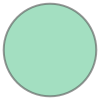

In [83]:
gdf1 = sub_line_with_buffers['Metro 50: Gein => Isolatorweg']
gdf1.iloc[0]['geometry']

In [83]:
def find_transfer_stations_multi_net():
    .intersects()
transfer_sub_tram = {}
for route_name, station_buffer_df in sub_line_with_buffers.items():
    inside_tram_stations = []
    
    for index, row in station_buffer_df.iterrows():
        polygon = row['geometry']
        
    
    buffered_geo_df = gpd.GeoDataFrame(geometry=node_buffers, crs='EPSG:4326')
    transfer_sub_tram[route_name] = buffered_geo_df

IndentationError: expected an indented block after function definition on line 1 (3266522514.py, line 3)

### Get transfer stations randomly 

In [74]:
buffer_radius1 = 100
buffer_radius2 = 200
buffer_radius3 = 300

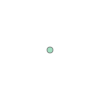

In [75]:
three_networks_nodes.iloc[0][0]

In [76]:
circle = three_networks_nodes.iloc[0][0].buffer(buffer_radius1)

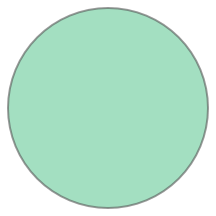

In [77]:
circle

In [78]:
three_networks_nodes['t_circle1'] = three_networks_nodes['geometry'].apply(lambda x: x.buffer(buffer_radius1))
three_networks_nodes['t_circle2'] = three_networks_nodes['geometry'].apply(lambda x: x.buffer(buffer_radius2))
three_networks_nodes['t_circle3'] = three_networks_nodes['geometry'].apply(lambda x: x.buffer(buffer_radius3))

In [79]:
three_networks_nodes

geometry  degree     id                 name     geo_x  \
0    POINT (4.98916 52.29641)       2    328                 Gein  4.989161   
1    POINT (4.97400 52.29564)       2    855           Reigersbos  4.974000   
2    POINT (4.96013 52.29813)       2    854          Holendrecht  4.960126   
3    POINT (4.95213 52.30687)       2    810            Bullewijk  4.952129   
4    POINT (4.94762 52.31181)       2    809        Bijlmer ArenA  4.947618   
..                        ...     ...    ...                  ...       ...   
752  POINT (4.99474 52.35561)       2  67471       Diemerparklaan  4.994741   
753  POINT (4.82444 52.34041)       3  15699  John M. Keynesplein  4.824444   
754  POINT (4.82789 52.34108)       2  11244                  IBM  4.827888   
755  POINT (4.82867 52.34260)       3  26843           Parkeerdek  4.828668   
756  POINT (4.83306 52.34574)       2  31909    Henk Sneevlietweg  4.833059   

         geo_y         coordinate_value  \
0    52.296407  (4.9891612, 52.2964067)   
1    52.295637  (4.9740002, 52.2956365)   
2    52.298132  (4.9601264, 52.2981319)   
3    52.306869   (4.9521292, 52.306869)   
4    52.311806   (4.9476178, 52.311806)   
..         ...                      ...   
752  52.355608   (4.9947414, 52.355608)   
753  52.340413    (4.824444, 52.340413)   
754  52.341080   (4.827888, 52.3410803)   
755  52.342595  (4.8286682, 52.3425954)   
756  52.345742  (4.8330587, 52.3457424)   

                                       route_name_list   route      ref  \
0                        Metro 50: Gein => Isolatorweg  subway   50, 54   
1                        Metro 50: Gein => Isolatorweg  subway   50, 54   
2                        Metro 50: Gein => Isolatorweg  subway   50, 54   
3                        Metro 50: Gein => Isolatorweg  subway   50, 54   
4                        Metro 50: Gein => Isolatorweg  subway   50, 54   
..                                                 ...     ...      ...   
752  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...     bus       66   
753  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus  267, 68   
754  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus  267, 68   
755  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus       68   
756  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus       68   

    transfer                                          t_circle1  \
0     50, 54  POLYGON ((104.989 52.296, 104.508 42.495, 103....   
1     50, 54  POLYGON ((104.974 52.296, 104.492 42.494, 103....   
2     50, 54  POLYGON ((104.960 52.298, 104.479 42.496, 103....   
3     50, 54  POLYGON ((104.952 52.307, 104.471 42.505, 103....   
4     50, 54  POLYGON ((104.948 52.312, 104.466 42.510, 103....   
..       ...                                                ...   
752     None  POLYGON ((104.995 52.356, 104.513 42.554, 103....   
753  267, 68  POLYGON ((104.824 52.340, 104.343 42.539, 102....   
754  267, 68  POLYGON ((104.828 52.341, 104.346 42.539, 102....   
755     None  POLYGON ((104.829 52.343, 104.347 42.541, 102....   
756     None  POLYGON ((104.833 52.346, 104.352 42.544, 102....   

                                             t_circle2  \
0    POLYGON ((204.989 52.296, 204.026 32.693, 201....   
1    POLYGON ((204.974 52.296, 204.011 32.692, 201....   
2    POLYGON ((204.960 52.298, 203.997 32.695, 201....   
3    POLYGON ((204.952 52.307, 203.989 32.703, 201....   
4    POLYGON ((204.948 52.312, 203.985 32.708, 201....   
..                                                 ...   
752  POLYGON ((204.995 52.356, 204.032 32.752, 201....   
753  POLYGON ((204.824 52.340, 203.861 32.737, 200....   
754  POLYGON ((204.828 52.341, 203.865 32.738, 200....   
755  POLYGON ((204.829 52.343, 203.866 32.739, 200....   
756  POLYGON ((204.833 52.346, 203.870 32.742, 200....   

                                             t_circle3  
0    POLYGON ((304.989 52.296, 303.545 22.891, 299....  
1    POLYGON ((304.974 52.296, 303.529